In [1]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'C:\\spark-3.0.3-bin-hadoop2.7'

* `SparkContext` is the entry gate of Apache Spark functionality. It allows your Spark Application to access Spark Cluster with the help of Resource Manager (YARN/Mesos). To create SparkContext, first SparkConf should be made.

In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
conf = pyspark.SparkConf().setAppName('appName').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

In [3]:
nums = sc.parallelize([1,2,3,4])
nums.map(lambda x: x*x).collect()

[1, 4, 9, 16]

In [4]:
sc.stop()

# Creating RDD- Resilient Distributed Dataset

In [5]:
import pyspark

In [6]:
from pyspark.sql import SparkSession

In [7]:
spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()

In [8]:
spark

In [17]:
#Create RDD from parallelize    
data = [1,2,3,4,5,6,7,8,9,10,11,12]
rdd=spark.sparkContext.parallelize(data)

In [12]:
dfPersist = rdd.persist(pyspark.StorageLevel.MEMORY_ONLY)

In [14]:
dfPersist.count()

3

In [19]:
rdd.count()

12

In [21]:
print("initial partition count:"+str(rdd.getNumPartitions()))

initial partition count:1


In [22]:

reparRdd = rdd.repartition(4)
print("re-partition count:"+str(reparRdd.getNumPartitions()))
#Outputs: "re-partition count:4


re-partition count:4


In [35]:

#Create RDD from parallelize    
dataList = [("Java", 20000), ("Python", 100000), ("Scala", 3000)]
rdd=spark.sparkContext.parallelize(dataList)


In [36]:
rdd.count()

3

# DataFrame creation
create an DataFrame is from a Python list of data. DataFrame can also be created from an RDD and by reading a files from several sources.
## using createDataFrame()

In [37]:

data = [('James','','Smith','1991-04-01','M',3000),
  ('Michael','Rose','','2000-05-19','M',4000),
  ('Robert','','Williams','1978-09-05','M',4000),
  ('Maria','Anne','Jones','1967-12-01','F',4000),
  ('Jen','Mary','Brown','1980-02-17','F',-1)
]

columns = ["firstname","middlename","lastname","dob","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)


In [38]:
df.show()

+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|  3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+



# PySpark SQL 
PySpark SQL is one of the most used PySpark modules which is used for `processing` structured columnar data format. Once you have a DataFrame created, you can `interact` with the data by using `SQL syntax`.

In other words, Spark SQL brings native RAW SQL queries on Spark meaning you can run `traditional ANSI SQL’s` on Spark Dataframe, in the later section of this PySpark SQL tutorial, you will learn in details using `SQL select`, `where`, `group by`, `join`, `union` e.t.c

In order to use SQL, first, `create a temporary table on DataFrame` using createOrReplaceTempView() function. Once created, this table can be accessed throughout the `SparkSession` using sql() and it will be dropped along with your `SparkContext termination`.
Use `sql()` method of the SparkSession object to `run the query` and this method `returns a new DataFrame`.

In [39]:

df.createOrReplaceTempView("PERSON_DATA")
df2 = spark.sql("SELECT * from PERSON_DATA")
df2.printSchema()
df2.show()

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|  3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+



In [40]:

groupDF = spark.sql("SELECT gender, count(*) from PERSON_DATA group by gender")
groupDF.show()


+------+--------+
|gender|count(1)|
+------+--------+
|     F|       2|
|     M|       3|
+------+--------+



# PySpark Streaming
Use readStream.format("socket") from Spark session object to read data from the socket and provide options `host` and `port` where you want to stream data from.

In [42]:

df = spark.readStream.format("socket").option("host","localhost").option("port","9090").load()

Spark reads the data from socket and represents it in a “value” column of DataFrame. df.printSchema() outputs

In [43]:
df.printSchema()

root
 |-- value: string (nullable = true)



# PySpark Repartition() vs Coalesce()

In [48]:

rdd = spark.sparkContext.parallelize((0,20))
print("From local[5]"+str(rdd.getNumPartitions()))

rdd1 = spark.sparkContext.parallelize((0,25), 6)
print("parallelize : "+str(rdd1.getNumPartitions()))

From local[5]1
parallelize : 6


# example of PySpark RDD repartition and coalesce in Scala language.

In [49]:

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com') \
        .master("local[5]").getOrCreate()

df = spark.range(0,20)
print(df.rdd.getNumPartitions())

spark.conf.set("spark.sql.shuffle.partitions", "500")

rdd = spark.sparkContext.parallelize((0,20))
print("From local[5]"+str(rdd.getNumPartitions()))

rdd1 = spark.sparkContext.parallelize((0,25), 6)
print("parallelize : "+str(rdd1.getNumPartitions()))

"""rddFromFile = spark.sparkContext.textFile("src/main/resources/test.txt",10)
print("TextFile : "+str(rddFromFile.getNumPartitions())) """

rdd1.saveAsTextFile("c://tmp/partition2")

rdd2 = rdd1.repartition(4)    # can be both increase or decrease the partitions
print("Repartition size : "+str(rdd2.getNumPartitions()))
rdd2.saveAsTextFile("c://tmp/re-partition2")

rdd3 = rdd1.coalesce(4)   # only reduce the partisions
print("Repartition size : "+str(rdd3.getNumPartitions()))
rdd3.saveAsTextFile("c:/tmp/coalesce2")


1
From local[5]1
parallelize : 6
Repartition size : 4
Repartition size : 4


# DataFrame repartition()
repartition() method is used to `increase or decrease` the partitions. The below example increases the partitions from 5 to 6 by moving data from all partitions.

In [50]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com') \
        .master("local[5]").getOrCreate()

df=spark.range(0,20)
print(df.rdd.getNumPartitions())

1


In [51]:
df2 = df.repartition(6)
print(df2.rdd.getNumPartitions())

6


# DataFrame coalesce()
coalesce() is used `only to decrease` the number of partitions. This is an optimized or improved version of repartition() where the movement of the data across the partitions is fewer using coalesce.

In [52]:
df3 = df.coalesce(2)
print(df3.rdd.getNumPartitions())

1


# Default Shuffle Partition
* Calling `groupBy()`, `union()`, `join()` and similar functions on DataFrame results in `shuffling data` between `multiple executors` and even machines and finally repartitions data into 200 partitions by default. PySpark default defines `shuffling partition to 200` using spark.sql.shuffle.partitions configuration.

In [53]:

df4 = df.groupBy("id").count()
print(df4.rdd.getNumPartitions())


1


# Broadcast variable example
* example of how to use broadcast variables on RDD. This example defines commonly used data (states) in a Map variable and `distributes` the variable using `SparkContext.broadcast()` and then use these variables on `RDD map() transformation`.

In [54]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

states = {"NY":"New York", "CA":"California", "FL":"Florida"}
broadcastStates = spark.sparkContext.broadcast(states)

data = [("James","Smith","USA","CA"),
    ("Michael","Rose","USA","NY"),
    ("Robert","Williams","USA","CA"),
    ("Maria","Jones","USA","FL")
  ]

rdd = spark.sparkContext.parallelize(data)

def state_convert(code):
    return broadcastStates.value[code]

result = rdd.map(lambda x: (x[0],x[1],x[2],state_convert(x[3]))).collect()
print(result)


[('James', 'Smith', 'USA', 'California'), ('Michael', 'Rose', 'USA', 'New York'), ('Robert', 'Williams', 'USA', 'California'), ('Maria', 'Jones', 'USA', 'Florida')]


In [55]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

states = {"NY":"New York", "CA":"California", "FL":"Florida"}
broadcastStates = spark.sparkContext.broadcast(states)

data = [("James","Smith","USA","CA"),
    ("Michael","Rose","USA","NY"),
    ("Robert","Williams","USA","CA"),
    ("Maria","Jones","USA","FL")
  ]

columns = ["firstname","lastname","country","state"]
df = spark.createDataFrame(data = data, schema = columns)
df.printSchema()
df.show(truncate=False)

def state_convert(code):
    return broadcastStates.value[code]

result = df.rdd.map(lambda x: (x[0],x[1],x[2],state_convert(x[3]))).toDF(columns)
result.show(truncate=False)


root
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- country: string (nullable = true)
 |-- state: string (nullable = true)

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|James    |Smith   |USA    |CA   |
|Michael  |Rose    |USA    |NY   |
|Robert   |Williams|USA    |CA   |
|Maria    |Jones   |USA    |FL   |
+---------+--------+-------+-----+

+---------+--------+-------+----------+
|firstname|lastname|country|state     |
+---------+--------+-------+----------+
|James    |Smith   |USA    |California|
|Michael  |Rose    |USA    |New York  |
|Robert   |Williams|USA    |California|
|Maria    |Jones   |USA    |Florida   |
+---------+--------+-------+----------+



# Creating Accumulator Variable
* how to create an `accumulator variable` “accum” of type int and using it to `sum` all values in an RDD.

In [57]:

accum=sc.accumulator(0)
rdd=spark.sparkContext.parallelize([1,2,3,4,5])
rdd.foreach(lambda x:accum.add(x))
print(accum.value) #Accessed by driver 

# The PySpark Accumulator is a shared variable that is used with RDD and DataFrame 
# to perform sum and counter operations similar to Map-reduce counters.

15


* Here, we have created an accumulator variable accum using `spark.sparkContext.accumulator(0)` with initial value 0. Later, we are iterating each element in an `rdd` using `foreach()` action and adding each element of rdd to accum variable. Finally, we are getting accumulator value using accum.value property.

Note that, In this example, `rdd.foreach()` is executed on `workers` and `accum.value` is called from `PySpark driver program`.

Let’s see another example of an accumulator, this time will do with a function.

In [58]:

accuSum=spark.sparkContext.accumulator(0)
def countFun(x):
    global accuSum
    accuSum+=x
rdd.foreach(countFun)
print(accuSum.value)


15


use accumulators to do a counters.

In [59]:

accumCount=spark.sparkContext.accumulator(0)
rdd2=spark.sparkContext.parallelize([1,2,3,4,5])
rdd2.foreach(lambda x:accumCount.add(1))
print(accumCount.value)


5


In [60]:

import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("accumulator").getOrCreate()

accum=spark.sparkContext.accumulator(0)
rdd=spark.sparkContext.parallelize([1,2,3,4,5])
rdd.foreach(lambda x:accum.add(x))
print(accum.value)

accuSum=spark.sparkContext.accumulator(0)
def countFun(x):
    global accuSum
    accuSum+=x
rdd.foreach(countFun)
print(accuSum.value)

accumCount=spark.sparkContext.accumulator(0)
rdd2=spark.sparkContext.parallelize([1,2,3,4,5])
rdd2.foreach(lambda x:accumCount.add(1))
print(accumCount.value)


15
15
5


# PySpark – Create DataFrame with Examples

In [66]:
# columns = ["language","users_count"]
data = [("Java", "20000"), ("Python", "100000"), ("Scala", "3000")]


# Create DataFrame from RDD

In [67]:

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
rdd = spark.sparkContext.parallelize(data)


# Using toDF() function
PySpark RDD’s toDF() method is used to `create` a DataFrame from `existing RDD`. Since RDD doesn’t have columns, the DataFrame is created with default column names “_1” and “_2” as we have two columns.

In [68]:

dfFromRDD1 = rdd.toDF()
dfFromRDD1.printSchema()


root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)



to provide column names to the DataFrame use `toDF()` method with column names as arguments as shown below.

In [69]:

columns = ["language","users_count"]
dfFromRDD1 = rdd.toDF(columns)
dfFromRDD1.printSchema()


root
 |-- language: string (nullable = true)
 |-- users_count: string (nullable = true)



By default, the `datatype` of these columns infers to the type of data. We can `change` this behavior by supplying schema, where we can specify a column name, data type, and nullable for each field/column

# Using createDataFrame() from SparkSession

In [70]:

dfFromData2 = spark.createDataFrame(data).toDF(*columns)


# Create DataFrame with schema
If you wanted to specify the column names along with their data types, you should `create` the `StructType schema` first and then assign this while creating a DataFrame.

In [72]:

from pyspark.sql.types import StructType,StructField, StringType, IntegerType
data2 = [("James","","Smith","36636","M",3000),
    ("Michael","Rose","","40288","M",4000),
    ("Robert","","Williams","42114","M",4000),
    ("Maria","Anne","Jones","39192","F",4000),
    ("Jen","Mary","Brown","","F",-1)
  ]

schema = StructType([ \
    StructField("firstname",StringType(),True), \
    StructField("middlename",StringType(),True), \
    StructField("lastname",StringType(),True), \
    StructField("id", StringType(), True), \
    StructField("gender", StringType(), True), \
    StructField("salary", IntegerType(), True) \
  ])
 
df = spark.createDataFrame(data=data2,schema=schema)
df.printSchema()
df.show(truncate=False)


root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

+---------+----------+--------+-----+------+------+
|firstname|middlename|lastname|id   |gender|salary|
+---------+----------+--------+-----+------+------+
|James    |          |Smith   |36636|M     |3000  |
|Michael  |Rose      |        |40288|M     |4000  |
|Robert   |          |Williams|42114|M     |4000  |
|Maria    |Anne      |Jones   |39192|F     |4000  |
|Jen      |Mary      |Brown   |     |F     |-1    |
+---------+----------+--------+-----+------+------+



# Convert PySpark RDD to DataFrame
First, let’s `create` an RDD by passing `Python list` object to sparkContext.parallelize() function. We would `need` this rdd object for all our examples below.

In PySpark, when you have data in a list meaning you have a `collection` of data in a PySpark driver memory when you create an RDD, this collection is going to be `parallelized`.

In [73]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
dept = [("Finance",10),("Marketing",20),("Sales",30),("IT",40)]
rdd = spark.sparkContext.parallelize(dept)


# Using rdd.toDF() function
By default, `toDF()` function creates column names as “_1” and “_2”. 

In [74]:

df = rdd.toDF()
df.printSchema()
df.show(truncate=False)


root
 |-- _1: string (nullable = true)
 |-- _2: long (nullable = true)

+---------+---+
|_1       |_2 |
+---------+---+
|Finance  |10 |
|Marketing|20 |
|Sales    |30 |
|IT       |40 |
+---------+---+



In [75]:

deptColumns = ["dept_name","dept_id"]
df2 = rdd.toDF(deptColumns)
df2.printSchema()
df2.show(truncate=False)


root
 |-- dept_name: string (nullable = true)
 |-- dept_id: long (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



# Using PySpark createDataFrame() function
SparkSession `class` provides createDataFrame() method to create DataFrame and it takes `rdd object` as an argument.

In [77]:

deptDF = spark.createDataFrame(rdd, schema = deptColumns)
deptDF.printSchema()
deptDF.show(truncate=False)


root
 |-- dept_name: string (nullable = true)
 |-- dept_id: long (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



# Using createDataFrame() with StructType schema
When you infer the schema, by default the datatype of the `columns` is derived from the data and set’s nullable to `true` for all columns. We can change this behavior by supplying `schema` using StructType – where we can specify a `column name`, `data type` and `nullable` for each field/column.

If you wanted to know more about `StructType`, please go through how to use `StructType` and `StructField` to define the custom schema.

In [76]:

from pyspark.sql.types import StructType,StructField, StringType
deptSchema = StructType([       
    StructField('dept_name', StringType(), True),
    StructField('dept_id', StringType(), True)
])

deptDF1 = spark.createDataFrame(rdd, schema = deptSchema)
deptDF1.printSchema()
deptDF1.show(truncate=False)


root
 |-- dept_name: string (nullable = true)
 |-- dept_id: string (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



# Prepare PySpark DataFrame

In [78]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [("James","","Smith","36636","M",60000),
        ("Michael","Rose","","40288","M",70000),
        ("Robert","","Williams","42114","",400000),
        ("Maria","Anne","Jones","39192","F",500000),
        ("Jen","Mary","Brown","","F",0)]

columns = ["first_name","middle_name","last_name","dob","gender","salary"]
pysparkDF = spark.createDataFrame(data = data, schema = columns)
pysparkDF.printSchema()
pysparkDF.show(truncate=False)


root
 |-- first_name: string (nullable = true)
 |-- middle_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+----------+-----------+---------+-----+------+------+
|first_name|middle_name|last_name|dob  |gender|salary|
+----------+-----------+---------+-----+------+------+
|James     |           |Smith    |36636|M     |60000 |
|Michael   |Rose       |         |40288|M     |70000 |
|Robert    |           |Williams |42114|      |400000|
|Maria     |Anne       |Jones    |39192|F     |500000|
|Jen       |Mary       |Brown    |     |F     |0     |
+----------+-----------+---------+-----+------+------+



# Convert PySpark Dataframe to Pandas DataFrame

In [79]:

pandasDF = pysparkDF.toPandas()
print(pandasDF)


  first_name middle_name last_name    dob gender  salary
0      James                 Smith  36636      M   60000
1    Michael        Rose            40288      M   70000
2     Robert              Williams  42114         400000
3      Maria        Anne     Jones  39192      F  500000
4        Jen        Mary     Brown             F       0


# Convert Spark Nested Struct DataFrame to Pandas
Most of the time data in PySpark DataFrame will be in a structured format meaning `one column` contains `other columns` so let’s see how it `convert to Pandas`. Here is an example with nested struct where we have `firstname`, `middlename` and `lastname` are part of the name column.

In [80]:

# Nested structure elements
from pyspark.sql.types import StructType, StructField, StringType,IntegerType
dataStruct = [(("James","","Smith"),"36636","M","3000"), \
      (("Michael","Rose",""),"40288","M","4000"), \
      (("Robert","","Williams"),"42114","M","4000"), \
      (("Maria","Anne","Jones"),"39192","F","4000"), \
      (("Jen","Mary","Brown"),"","F","-1") \
]

schemaStruct = StructType([
        StructField('name', StructType([
             StructField('firstname', StringType(), True),
             StructField('middlename', StringType(), True),
             StructField('lastname', StringType(), True)
             ])),
          StructField('dob', StringType(), True),
         StructField('gender', StringType(), True),
         StructField('salary', StringType(), True)
         ])
df = spark.createDataFrame(data=dataStruct, schema = schemaStruct)
df.printSchema()

pandasDF2 = df.toPandas()
print(pandasDF2)


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: string (nullable = true)

                   name    dob gender salary
0      (James, , Smith)  36636      M   3000
1     (Michael, Rose, )  40288      M   4000
2  (Robert, , Williams)  42114      M   4000
3  (Maria, Anne, Jones)  39192      F   4000
4    (Jen, Mary, Brown)             F     -1


# PySpark show() – Display DataFrame Contents in Table
PySpark DataFrame show() is used to `display` the `contents` of the DataFrame in a Table Row & Column Format. By default, it shows only 20 Rows, and the column values are truncated at 20 characters.

In [81]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
columns = ["Seqno","Quote"]
data = [("1", "Be the change that you wish to see in the world"),
    ("2", "Everyone thinks of changing the world, but no one thinks of changing himself."),
    ("3", "The purpose of our lives is to be happy."),
    ("4", "Be cool.")]
df = spark.createDataFrame(data,columns)
df.show()
#+-----+--------------------+
#|Seqno|               Quote|
#+-----+--------------------+
#|    1|Be the change tha...|
#|    2|Everyone thinks o...|
#|    3|The purpose of ou...|
#|    4|            Be cool.|
#+-----+--------------------+


+-----+--------------------+
|Seqno|               Quote|
+-----+--------------------+
|    1|Be the change tha...|
|    2|Everyone thinks o...|
|    3|The purpose of ou...|
|    4|            Be cool.|
+-----+--------------------+



In [82]:

#Display full column contents
df.show(truncate=False)

#+-----+-----------------------------------------------------------------------------+
#|Seqno|Quote                                                                        |
#+-----+-----------------------------------------------------------------------------+
#|1    |Be the change that you wish to see in the world                              |
#|2    |Everyone thinks of changing the world, but no one thinks of changing himself.|
#|3    |The purpose of our lives is to be happy.                                     |
#|4    |Be cool.                                                                     |
#+-----+-----------------------------------------------------------------------------+


+-----+-----------------------------------------------------------------------------+
|Seqno|Quote                                                                        |
+-----+-----------------------------------------------------------------------------+
|1    |Be the change that you wish to see in the world                              |
|2    |Everyone thinks of changing the world, but no one thinks of changing himself.|
|3    |The purpose of our lives is to be happy.                                     |
|4    |Be cool.                                                                     |
+-----+-----------------------------------------------------------------------------+



By default show() method displays only `20 rows` from PySpark DataFrame. The below example limit the `rows to 2` and full column contents. Our DataFrame has just `4 rows` hence I can’t `demonstrate` with more than `4 rows`. If you have a DataFrame with thousands of rows try changing the value from `2 to 100` to display `more than 20 rows`.



In [83]:

# Display 2 rows and full column contents
df.show(2,truncate=False) 

#+-----+-----------------------------------------------------------------------------+
#|Seqno|Quote                                                                        |
#+-----+-----------------------------------------------------------------------------+
#|1    |Be the change that you wish to see in the world                              |
#|2    |Everyone thinks of changing the world, but no one thinks of changing himself.|
#+-----+-----------------------------------------------------------------------------+


+-----+-----------------------------------------------------------------------------+
|Seqno|Quote                                                                        |
+-----+-----------------------------------------------------------------------------+
|1    |Be the change that you wish to see in the world                              |
|2    |Everyone thinks of changing the world, but no one thinks of changing himself.|
+-----+-----------------------------------------------------------------------------+
only showing top 2 rows



We can also truncate the column value at desired length.

In [84]:

# Display 2 rows & column values 25 characters
df.show(2,truncate=25) 

#+-----+-------------------------+
#|Seqno|                    Quote|
#+-----+-------------------------+
#|    1|Be the change that you...|
#|    2|Everyone thinks of cha...|
#+-----+-------------------------+
#only showing top 2 rows


+-----+-------------------------+
|Seqno|                    Quote|
+-----+-------------------------+
|    1|Be the change that you...|
|    2|Everyone thinks of cha...|
+-----+-------------------------+
only showing top 2 rows



Finally, let’s see how to display the DataFrame vertically record by record.

In [85]:

# Display DataFrame rows & columns vertically
df.show(n=3,truncate=25,vertical=True)

#-RECORD 0--------------------------
# Seqno | 1                         
# Quote | Be the change that you... 
#-RECORD 1--------------------------
# Seqno | 2                         
# Quote | Everyone thinks of cha... 
#-RECORD 2--------------------------
# Seqno | 3                         
# Quote | The purpose of our liv... 


-RECORD 0--------------------------
 Seqno | 1                         
 Quote | Be the change that you... 
-RECORD 1--------------------------
 Seqno | 2                         
 Quote | Everyone thinks of cha... 
-RECORD 2--------------------------
 Seqno | 3                         
 Quote | The purpose of our liv... 
only showing top 3 rows



# PySpark StructType & StructField Explained with Examples
PySpark `StructType` & `StructField` classes are used to `programmatically` specify the `schema` to the `DataFrame` and creating `complex columns` like `nested struct`, array and map columns. `StructType` is a `collection` of `StructField’s` that defines `column name`, `column data type`, `boolean` to specify if the field can be `nullable` or `not` and `metadata`.

In this article, I will explain `different` ways to define the `structure of DataFrame` using `StructType` with PySpark examples. Though PySpark infers a schema from data, some times we may need to define our `own column names` and data types and this article explains how to define simple, nested, and complex schemas

# StructType – Defines the structure of the Dataframe
## PySpark provides from pyspark.sql.types `import StructType` class to define the structure of the DataFrame.

StructType is a collection or list of StructField objects.

`printSchema()` method on the DataFrame shows StructType columns as “struct”.

# StructField – Defines the metadata of the DataFrame column
## PySpark provides pyspark.sql.types import StructField class to define the columns which includes column name(String), `column type (DataType)`, `nullable column (Boolean)` and metadata (MetaData)

# how to create a `StructType` & `StructField` on DataFrame and it’s usage with sample data to support it.

In [86]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType

spark = SparkSession.builder.master("local[1]") \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

data = [("James","","Smith","36636","M",3000),
    ("Michael","Rose","","40288","M",4000),
    ("Robert","","Williams","42114","M",4000),
    ("Maria","Anne","Jones","39192","F",4000),
    ("Jen","Mary","Brown","","F",-1)
  ]

schema = StructType([ \
    StructField("firstname",StringType(),True), \
    StructField("middlename",StringType(),True), \
    StructField("lastname",StringType(),True), \
    StructField("id", StringType(), True), \
    StructField("gender", StringType(), True), \
    StructField("salary", IntegerType(), True) \
  ])
 
df = spark.createDataFrame(data=data,schema=schema)
df.printSchema()
df.show(truncate=False)


root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

+---------+----------+--------+-----+------+------+
|firstname|middlename|lastname|id   |gender|salary|
+---------+----------+--------+-----+------+------+
|James    |          |Smith   |36636|M     |3000  |
|Michael  |Rose      |        |40288|M     |4000  |
|Robert   |          |Williams|42114|M     |4000  |
|Maria    |Anne      |Jones   |39192|F     |4000  |
|Jen      |Mary      |Brown   |     |F     |-1    |
+---------+----------+--------+-----+------+------+



# Defining Nested StructType object struct
While working on `DataFrame` we often need to work with the `nested struct` column and this can be defined using `StructType`.

On the below example column “name” data type is StructType which is nested.

In [87]:

structureData = [
    (("James","","Smith"),"36636","M",3100),
    (("Michael","Rose",""),"40288","M",4300),
    (("Robert","","Williams"),"42114","M",1400),
    (("Maria","Anne","Jones"),"39192","F",5500),
    (("Jen","Mary","Brown"),"","F",-1)
  ]
structureSchema = StructType([
        StructField('name', StructType([
             StructField('firstname', StringType(), True),
             StructField('middlename', StringType(), True),
             StructField('lastname', StringType(), True)
             ])),
         StructField('id', StringType(), True),
         StructField('gender', StringType(), True),
         StructField('salary', IntegerType(), True)
         ])

df2 = spark.createDataFrame(data=structureData,schema=structureSchema)
df2.printSchema()
df2.show(truncate=False)

root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

+--------------------+-----+------+------+
|name                |id   |gender|salary|
+--------------------+-----+------+------+
|[James, , Smith]    |36636|M     |3100  |
|[Michael, Rose, ]   |40288|M     |4300  |
|[Robert, , Williams]|42114|M     |1400  |
|[Maria, Anne, Jones]|39192|F     |5500  |
|[Jen, Mary, Brown]  |     |F     |-1    |
+--------------------+-----+------+------+



# Adding & Changing struct of the DataFrame
Using PySpark `SQL` function struct(), we can change the struct of the existing DataFrame and add a new `StructType` to it. The below example demonstrates how to copy the columns from one structure to another and adding a new column. PySpark Column Class also provides some functions to work with the StructType column.

In [88]:

from pyspark.sql.functions import col,struct,when
updatedDF = df2.withColumn("OtherInfo", 
    struct(col("id").alias("identifier"),
    col("gender").alias("gender"),
    col("salary").alias("salary"),
    when(col("salary").cast(IntegerType()) < 2000,"Low")
      .when(col("salary").cast(IntegerType()) < 4000,"Medium")
      .otherwise("High").alias("Salary_Grade")
  )).drop("id","gender","salary")

updatedDF.printSchema()
updatedDF.show(truncate=False)


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- OtherInfo: struct (nullable = false)
 |    |-- identifier: string (nullable = true)
 |    |-- gender: string (nullable = true)
 |    |-- salary: integer (nullable = true)
 |    |-- Salary_Grade: string (nullable = false)

+--------------------+------------------------+
|name                |OtherInfo               |
+--------------------+------------------------+
|[James, , Smith]    |[36636, M, 3100, Medium]|
|[Michael, Rose, ]   |[40288, M, 4300, High]  |
|[Robert, , Williams]|[42114, M, 1400, Low]   |
|[Maria, Anne, Jones]|[39192, F, 5500, High]  |
|[Jen, Mary, Brown]  |[, F, -1, Low]          |
+--------------------+------------------------+



# Creating StructType object struct from JSON file

In [91]:

print(df2.schema.json())


{"fields":[{"metadata":{},"name":"name","nullable":true,"type":{"fields":[{"metadata":{},"name":"firstname","nullable":true,"type":"string"},{"metadata":{},"name":"middlename","nullable":true,"type":"string"},{"metadata":{},"name":"lastname","nullable":true,"type":"string"}],"type":"struct"}},{"metadata":{},"name":"id","nullable":true,"type":"string"},{"metadata":{},"name":"gender","nullable":true,"type":"string"},{"metadata":{},"name":"salary","nullable":true,"type":"integer"}],"type":"struct"}


In [94]:
df.schema.simpleString()

'struct<firstname:string,middlename:string,lastname:string,id:string,gender:string,salary:int>'

# Complete Example of PySpark StructType & StructField

In [98]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType,ArrayType,MapType
from pyspark.sql.functions import col,struct,when

spark = SparkSession.builder.master("local[1]") \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

data = [("James","","Smith","36636","M",3000),
    ("Michael","Rose","","40288","M",4000),
    ("Robert","","Williams","42114","M",4000),
    ("Maria","Anne","Jones","39192","F",4000),
    ("Jen","Mary","Brown","","F",-1)
  ]

schema = StructType([ 
    StructField("firstname",StringType(),True), 
    StructField("middlename",StringType(),True), 
    StructField("lastname",StringType(),True), 
    StructField("id", StringType(), True), 
    StructField("gender", StringType(), True), 
    StructField("salary", IntegerType(), True) 
  ])
 
df = spark.createDataFrame(data=data,schema=schema)
df.printSchema()
df.show(truncate=False)

structureData = [
    (("James","","Smith"),"36636","M",3100),
    (("Michael","Rose",""),"40288","M",4300),
    (("Robert","","Williams"),"42114","M",1400),
    (("Maria","Anne","Jones"),"39192","F",5500),
    (("Jen","Mary","Brown"),"","F",-1)
  ]
structureSchema = StructType([
        StructField('name', StructType([
             StructField('firstname', StringType(), True),
             StructField('middlename', StringType(), True),
             StructField('lastname', StringType(), True)
             ])),
         StructField('id', StringType(), True),
         StructField('gender', StringType(), True),
         StructField('salary', IntegerType(), True)
         ])

df2 = spark.createDataFrame(data=structureData,schema=structureSchema)
df2.printSchema()
df2.show(truncate=False)


updatedDF = df2.withColumn("OtherInfo", 
    struct(col("id").alias("identifier"),
    col("gender").alias("gender"),
    col("salary").alias("salary"),
    when(col("salary").cast(IntegerType()) < 2000,"Low")
      .when(col("salary").cast(IntegerType()) < 4000,"Medium")
      .otherwise("High").alias("Salary_Grade")
  )).drop("id","gender","salary")

updatedDF.printSchema()
updatedDF.show(truncate=False)


""" Array & Map"""


arrayStructureSchema = StructType([
    StructField('name', StructType([
       StructField('firstname', StringType(), True),
       StructField('middlename', StringType(), True),
       StructField('lastname', StringType(), True)
       ])),
       StructField('hobbies', ArrayType(StringType()), True),
       StructField('properties', MapType(StringType(),StringType()), True)
    ])


root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

+---------+----------+--------+-----+------+------+
|firstname|middlename|lastname|id   |gender|salary|
+---------+----------+--------+-----+------+------+
|James    |          |Smith   |36636|M     |3000  |
|Michael  |Rose      |        |40288|M     |4000  |
|Robert   |          |Williams|42114|M     |4000  |
|Maria    |Anne      |Jones   |39192|F     |4000  |
|Jen      |Mary      |Brown   |     |F     |-1    |
+---------+----------+--------+-----+------+------+

root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)



# ==================================================================================================================

# PySpark Row using on DataFrame and RDD

In PySpark `Row class` is available by `importing` pyspark.sql.Row which is represented as a record/row in DataFrame, one can create a Row object by using named arguments, or create a custom Row like class
* Key Points of Row Class:

Earlier to Spark 3.0, when used Row class with named arguments, the fields are sorted by name.
Since 3.0, Rows created from named arguments are not sorted alphabetically instead they will be ordered in the position entered.
To enable sorting by names, set the environment variable `PYSPARK_ROW_FIELD_SORTING_ENABLED` to true.
Row class provides a way to create a struct-type column as well.
# Create a Row Object

In [99]:

from pyspark.sql import Row
row=Row("James",40)
print(row[0] +","+str(row[1]))


James,40


In [100]:

row=Row(name="Alice", age=11)
print(row.name) 


Alice


# Create Custom Class from Row
We can also create a Row like class, for example `“Person”` and use it similar to Row object. This would be helpful when you wanted to `create real` time object and refer it’s properties. On below example, we have created a `Person class` and used similar to Row.

In [101]:

Person = Row("name", "age")
p1=Person("James", 40)
p2=Person("Alice", 35)
print(p1.name +","+p2.name)


James,Alice


# Using Row class on PySpark RDD
We can use `Row class` on PySpark RDD. When you use Row to create an `RDD`, after collecting the data you will get the result back in Row.



In [103]:

from pyspark.sql import SparkSession, Row
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [Row(name="James,,Smith",lang=["Java","Scala","C++"],state="CA"), 
    Row(name="Michael,Rose,",lang=["Spark","Java","C++"],state="NJ"),
    Row(name="Robert,,Williams",lang=["CSharp","VB"],state="NV")]
rdd=spark.sparkContext.parallelize(data)
print(rdd.collect())


[Row(name='James,,Smith', lang=['Java', 'Scala', 'C++'], state='CA'), Row(name='Michael,Rose,', lang=['Spark', 'Java', 'C++'], state='NJ'), Row(name='Robert,,Williams', lang=['CSharp', 'VB'], state='NV')]


In [105]:

collData=rdd.collect()
for row in collData:
    print(row.name + "," +str(row.lang))


James,,Smith,['Java', 'Scala', 'C++']
Michael,Rose,,['Spark', 'Java', 'C++']
Robert,,Williams,['CSharp', 'VB']


# Using Row class on PySpark DataFrame
Similarly, `Row` class also can be used with `PySpark DataFrame`, By default data in DataFrame represent as Row. To demonstrate, I will use the same data that was created for RDD.

Note that Row on DataFrame is not allowed to omit a named argument to represent that the value is `None` or `missing`. This should be explicitly set to None in this case.

In [108]:

df=spark.createDataFrame(data)
df.printSchema()
df.show()


root
 |-- name: string (nullable = true)
 |-- lang: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- state: string (nullable = true)

+----------------+------------------+-----+
|            name|              lang|state|
+----------------+------------------+-----+
|    James,,Smith|[Java, Scala, C++]|   CA|
|   Michael,Rose,|[Spark, Java, C++]|   NJ|
|Robert,,Williams|      [CSharp, VB]|   NV|
+----------------+------------------+-----+



In [109]:

columns = ["name","languagesAtSchool","currentState"]
df=spark.createDataFrame(data).toDF(*columns)
df.printSchema()


root
 |-- name: string (nullable = true)
 |-- languagesAtSchool: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- currentState: string (nullable = true)



# Create Nested Struct Using Row Class
The below example provides a way to create a struct type using the `Row class`. Alternatively, you can also create struct type using By Providing Schema using PySpark StructType & StructFields

In [110]:

#Create DataFrame with struct using Row class
from pyspark.sql import Row
data=[Row(name="James",prop=Row(hair="black",eye="blue")),
      Row(name="Ann",prop=Row(hair="grey",eye="black"))]
df=spark.createDataFrame(data)
df.printSchema()


root
 |-- name: string (nullable = true)
 |-- prop: struct (nullable = true)
 |    |-- hair: string (nullable = true)
 |    |-- eye: string (nullable = true)



# Complete Example of PySpark Row usage on RDD & DataFrame

In [111]:

from pyspark.sql import SparkSession, Row

row=Row("James",40)
print(row[0] +","+str(row[1]))
row2=Row(name="Alice", age=11)
print(row2.name)

Person = Row("name", "age")
p1=Person("James", 40)
p2=Person("Alice", 35)
print(p1.name +","+p2.name)

#PySpark Example
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [Row(name="James,,Smith",lang=["Java","Scala","C++"],state="CA"), 
    Row(name="Michael,Rose,",lang=["Spark","Java","C++"],state="NJ"),
    Row(name="Robert,,Williams",lang=["CSharp","VB"],state="NV")]

#RDD Example 1
rdd=spark.sparkContext.parallelize(data)
collData=rdd.collect()
print(collData)
for row in collData:
    print(row.name + "," +str(row.lang))

# RDD Example 2
Person=Row("name","lang","state")
data = [Person("James,,Smith",["Java","Scala","C++"],"CA"), 
    Person("Michael,Rose,",["Spark","Java","C++"],"NJ"),
    Person("Robert,,Williams",["CSharp","VB"],"NV")]
rdd=spark.sparkContext.parallelize(data)
collData=rdd.collect()
print(collData)
for person in collData:
    print(person.name + "," +str(person.lang))

#DataFrame Example 1
columns = ["name","languagesAtSchool","currentState"]
df=spark.createDataFrame(data)
df.printSchema()
df.show()

collData=df.collect()
print(collData)
for row in collData:
    print(row.name + "," +str(row.lang))
    
#DataFrame Example 2
columns = ["name","languagesAtSchool","currentState"]
df=spark.createDataFrame(data).toDF(*columns)
df.printSchema()


James,40
Alice
James,Alice
[Row(name='James,,Smith', lang=['Java', 'Scala', 'C++'], state='CA'), Row(name='Michael,Rose,', lang=['Spark', 'Java', 'C++'], state='NJ'), Row(name='Robert,,Williams', lang=['CSharp', 'VB'], state='NV')]
James,,Smith,['Java', 'Scala', 'C++']
Michael,Rose,,['Spark', 'Java', 'C++']
Robert,,Williams,['CSharp', 'VB']
[Row(name='James,,Smith', lang=['Java', 'Scala', 'C++'], state='CA'), Row(name='Michael,Rose,', lang=['Spark', 'Java', 'C++'], state='NJ'), Row(name='Robert,,Williams', lang=['CSharp', 'VB'], state='NV')]
James,,Smith,['Java', 'Scala', 'C++']
Michael,Rose,,['Spark', 'Java', 'C++']
Robert,,Williams,['CSharp', 'VB']
root
 |-- name: string (nullable = true)
 |-- lang: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- state: string (nullable = true)

+----------------+------------------+-----+
|            name|              lang|state|
+----------------+------------------+-----+
|    James,,Smith|[Java, Scala, C++]|   CA|
|  

# PySpark withColumn() Usage with Examples
PySpark withColumn() is a `transformation` function of DataFrame which is used to change the value, convert the datatype of an `existing column`, create a new column, and many more. In this post, I will walk you through commonly used `PySpark DataFrame` column operations using `withColumn()` examples.

In [112]:

data = [('James','','Smith','1991-04-01','M',3000),
  ('Michael','Rose','','2000-05-19','M',4000),
  ('Robert','','Williams','1978-09-05','M',4000),
  ('Maria','Anne','Jones','1967-12-01','F',4000),
  ('Jen','Mary','Brown','1980-02-17','F',-1)
]

columns = ["firstname","middlename","lastname","dob","gender","salary"]
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
df = spark.createDataFrame(data=data, schema = columns)


# Change DataType using PySpark withColumn()
By using PySpark `withColumn()` on a DataFrame, we can cast or change the data type of a column. In order to change data type, you would also need to use cast() function along with withColumn(). The below statement changes the datatype from `String to Integer` for the `salary column`.

In [113]:

df.withColumn("salary",col("salary").cast("Integer")).show()


+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|  3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+



# Update The Value of an Existing Column

In [114]:

df.withColumn("salary",col("salary")*100).show()


+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|300000|
|  Michael|      Rose|        |2000-05-19|     M|400000|
|   Robert|          |Williams|1978-09-05|     M|400000|
|    Maria|      Anne|   Jones|1967-12-01|     F|400000|
|      Jen|      Mary|   Brown|1980-02-17|     F|  -100|
+---------+----------+--------+----------+------+------+



# Create a Column from an Existing

In [115]:

df.withColumn("CopiedColumn",col("salary")* -1).show()


+---------+----------+--------+----------+------+------+------------+
|firstname|middlename|lastname|       dob|gender|salary|CopiedColumn|
+---------+----------+--------+----------+------+------+------------+
|    James|          |   Smith|1991-04-01|     M|  3000|       -3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|       -4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|       -4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|       -4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|           1|
+---------+----------+--------+----------+------+------+------------+



# Rename Column Name

In [117]:

df.withColumnRenamed("gender","sex") \
  .show(truncate=False) 


+---------+----------+--------+----------+---+------+
|firstname|middlename|lastname|dob       |sex|salary|
+---------+----------+--------+----------+---+------+
|James    |          |Smith   |1991-04-01|M  |3000  |
|Michael  |Rose      |        |2000-05-19|M  |4000  |
|Robert   |          |Williams|1978-09-05|M  |4000  |
|Maria    |Anne      |Jones   |1967-12-01|F  |4000  |
|Jen      |Mary      |Brown   |1980-02-17|F  |-1    |
+---------+----------+--------+----------+---+------+



# Drop Column From PySpark DataFrame

In [118]:

df.drop("salary") \
  .show() 


+---------+----------+--------+----------+------+
|firstname|middlename|lastname|       dob|gender|
+---------+----------+--------+----------+------+
|    James|          |   Smith|1991-04-01|     M|
|  Michael|      Rose|        |2000-05-19|     M|
|   Robert|          |Williams|1978-09-05|     M|
|    Maria|      Anne|   Jones|1967-12-01|     F|
|      Jen|      Mary|   Brown|1980-02-17|     F|
+---------+----------+--------+----------+------+



# PySpark withColumn() Complete Example

In [119]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit
from pyspark.sql.types import StructType, StructField, StringType,IntegerType

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [('James','','Smith','1991-04-01','M',3000),
  ('Michael','Rose','','2000-05-19','M',4000),
  ('Robert','','Williams','1978-09-05','M',4000),
  ('Maria','Anne','Jones','1967-12-01','F',4000),
  ('Jen','Mary','Brown','1980-02-17','F',-1)
]

columns = ["firstname","middlename","lastname","dob","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)
df.printSchema()
df.show(truncate=False)

df2 = df.withColumn("salary",col("salary").cast("Integer"))
df2.printSchema()
df2.show(truncate=False)

df3 = df.withColumn("salary",col("salary")*100)
df3.printSchema()
df3.show(truncate=False) 

df4 = df.withColumn("CopiedColumn",col("salary")* -1)
df4.printSchema()

df5 = df.withColumn("Country", lit("USA"))
df5.printSchema()

df6 = df.withColumn("Country", lit("USA")) \
   .withColumn("anotherColumn",lit("anotherValue"))
df6.printSchema()

df.withColumnRenamed("gender","sex") \
  .show(truncate=False) 
  
df4.drop("CopiedColumn") \
.show(truncate=False) 


root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|dob       |gender|salary|
+---------+----------+--------+----------+------+------+
|James    |          |Smith   |1991-04-01|M     |3000  |
|Michael  |Rose      |        |2000-05-19|M     |4000  |
|Robert   |          |Williams|1978-09-05|M     |4000  |
|Maria    |Anne      |Jones   |1967-12-01|F     |4000  |
|Jen      |Mary      |Brown   |1980-02-17|F     |-1    |
+---------+----------+--------+----------+------+------+

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

+------

# ==================================================================
# PySpark withColumnRenamed to Rename Column on DataFrame

First, let’s create our data set to work with.

In [121]:

dataDF = [(('James','','Smith'),'1991-04-01','M',3000),
  (('Michael','Rose',''),'2000-05-19','M',4000),
  (('Robert','','Williams'),'1978-09-05','M',4000),
  (('Maria','Anne','Jones'),'1967-12-01','F',4000),
  (('Jen','Mary','Brown'),'1980-02-17','F',-1)
]

from pyspark.sql.types import StructType,StructField, StringType, IntegerType
schema = StructType([
        StructField('name', StructType([
             StructField('firstname', StringType(), True),
             StructField('middlename', StringType(), True),
             StructField('lastname', StringType(), True)
             ])),
         StructField('dob', StringType(), True),
         StructField('gender', StringType(), True),
         StructField('gender', IntegerType(), True)
         ])


In [122]:
#   Let’s create the DataFrame by using parallelize and provide the above schema.
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
df = spark.createDataFrame(data = dataDF, schema = schema)
df.printSchema()


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- gender: integer (nullable = true)



## PySpark withColumnRenamed – To rename DataFrame column name
existingName – The existing column name you want to change

newName – New name of the column

Returns a new DataFrame with a column renamed.

In [123]:

df.withColumnRenamed("dob","DateOfBirth").printSchema()


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- gender: integer (nullable = true)



# PySpark withColumnRenamed – To rename multiple columns

In [124]:

df2 = df.withColumnRenamed("dob","DateOfBirth") \
    .withColumnRenamed("salary","salary_amount")
df2.printSchema()


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- gender: integer (nullable = true)



# Using PySpark DataFrame withColumn – To rename nested columns
When you have nested columns on PySpark DatFrame and if you want to `rename` it, use withColumn on a data frame object to create a new column from an existing and we will need to drop the existing column. Below example creates a “fname” column from `“name.firstname”` and drops the “name” column

In [130]:

from pyspark.sql.functions import *
df4 = df.withColumn("fname",col("name.firstname")) \
      .withColumn("mname",col("name.middlename")) \
      .withColumn("lname",col("name.lastname")) \
      .drop("name")
df4.printSchema()


root
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- gender: integer (nullable = true)
 |-- fname: string (nullable = true)
 |-- mname: string (nullable = true)
 |-- lname: string (nullable = true)



# Complete Code

In [132]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType
from pyspark.sql.functions import *

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

dataDF = [(('James','','Smith'),'1991-04-01','M',3000),
  (('Michael','Rose',''),'2000-05-19','M',4000),
  (('Robert','','Williams'),'1978-09-05','M',4000),
  (('Maria','Anne','Jones'),'1967-12-01','F',4000),
  (('Jen','Mary','Brown'),'1980-02-17','F',-1)
]

schema = StructType([
        StructField('name', StructType([
             StructField('firstname', StringType(), True),
             StructField('middlename', StringType(), True),
             StructField('lastname', StringType(), True)
             ])),
         StructField('dob', StringType(), True),
         StructField('gender', StringType(), True),
         StructField('salary', IntegerType(), True)
         ])

df = spark.createDataFrame(data = dataDF, schema = schema)
df.printSchema()

# Example 1
df.withColumnRenamed("dob","DateOfBirth").printSchema()
# Example 2   
df2 = df.withColumnRenamed("dob","DateOfBirth") \
    .withColumnRenamed("salary","salary_amount")
df2.printSchema()

# Example 3 
schema2 = StructType([
    StructField("fname",StringType()),
    StructField("middlename",StringType()),
    StructField("lname",StringType())])
    
df.select(col("name").cast(schema2),
  col("dob"),
  col("gender"),
  col("salary")) \
    .printSchema()    

# Example 4 
df.select(col("name.firstname").alias("fname"),
  col("name.middlename").alias("mname"),
  col("name.lastname").alias("lname"),
  col("dob"),col("gender"),col("salary")) \
  .printSchema()
  
# Example 5
df4 = df.withColumn("fname",col("name.firstname")) \
      .withColumn("mname",col("name.middlename")) \
      .withColumn("lname",col("name.lastname")) \
      .drop("name")
df4.printSchema()

#Example 7
newColumns = ["newCol1","newCol2","newCol3","newCol4"]
df.toDF(*newColumns).printSchema()

# Example 6
'''
not working
old_columns = Seq("dob","gender","salary","fname","mname","lname")
new_columns = Seq("DateOfBirth","Sex","salary","firstName","middleName","lastName")
columnsList = old_columns.zip(new_columns).map(f=>{col(f._1).as(f._2)})
df5 = df4.select(columnsList:_*)
df5.printSchema()
'''

  


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)

root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary_amount: integer (nullable = true)

root
 |-- name: struct (nullable = true)
 |    |-- fname: string (nullable = true)
 |    |-- middlena

'\nnot working\nold_columns = Seq("dob","gender","salary","fname","mname","lname")\nnew_columns = Seq("DateOfBirth","Sex","salary","firstName","middleName","lastName")\ncolumnsList = old_columns.zip(new_columns).map(f=>{col(f._1).as(f._2)})\ndf5 = df4.select(columnsList:_*)\ndf5.printSchema()\n'

# PySpark Where Filter Function | Multiple Conditions
PySpark filter() function is used to filter the rows from `RDD/DataFrame` based on the given condition or `SQL` expression, you can also use where() clause instead of the `filter()` if you are coming from an SQL background, both these functions operate exactly the same.

In this PySpark article, you will learn how to apply a filter on DataFrame columns of `string, arrays, struct types` by using single and multiple conditions and also applying filter using `isin()` with PySpark (Python Spark) examples.

In [133]:
# first let’s create a DataFrame. Here, I am using a DataFrame with StructType and ArrayType columns as I will also be covering examples with struct and array types as-well.
from pyspark.sql.types import StructType,StructField 
from pyspark.sql.types import StringType, IntegerType, ArrayType
data = [
    (("James","","Smith"),["Java","Scala","C++"],"OH","M"),
    (("Anna","Rose",""),["Spark","Java","C++"],"NY","F"),
    (("Julia","","Williams"),["CSharp","VB"],"OH","F"),
    (("Maria","Anne","Jones"),["CSharp","VB"],"NY","M"),
    (("Jen","Mary","Brown"),["CSharp","VB"],"NY","M"),
    (("Mike","Mary","Williams"),["Python","VB"],"OH","M")
 ]
        
schema = StructType([
     StructField('name', StructType([
        StructField('firstname', StringType(), True),
        StructField('middlename', StringType(), True),
         StructField('lastname', StringType(), True)
     ])),
     StructField('languages', ArrayType(StringType()), True),
     StructField('state', StringType(), True),
     StructField('gender', StringType(), True)
 ])

df = spark.createDataFrame(data = data, schema = schema)
df.printSchema()
df.show(truncate=False)


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- languages: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- state: string (nullable = true)
 |-- gender: string (nullable = true)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Anna, Rose, ]        |[Spark, Java, C++]|NY   |F     |
|[Julia, , Williams]   |[CSharp, VB]      |OH   |F     |
|[Maria, Anne, Jones]  |[CSharp, VB]      |NY   |M     |
|[Jen, Mary, Brown]    |[CSharp, VB]      |NY   |M     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



# DataFrame filter() with Column Condition
Use Column with the condition to `filter` the rows from DataFrame, using this you can express `complex condition` by referring column names using dfObject.colname

In [134]:

# Using equals condition
df.filter(df.state == "OH").show(truncate=False)

# +----------------------+------------------+-----+------+
# |name                  |languages         |state|gender|
# +----------------------+------------------+-----+------+
# |[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
# |[Julia, , Williams]   |[CSharp, VB]      |OH   |F     |
# |[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
# +----------------------+------------------+-----+------+

# not equals condition
df.filter(df.state != "OH") \
    .show(truncate=False) 
df.filter(~(df.state == "OH")) \
    .show(truncate=False)


+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Julia, , Williams]   |[CSharp, VB]      |OH   |F     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|name                |languages         |state|gender|
+--------------------+------------------+-----+------+
|[Anna, Rose, ]      |[Spark, Java, C++]|NY   |F     |
|[Maria, Anne, Jones]|[CSharp, VB]      |NY   |M     |
|[Jen, Mary, Brown]  |[CSharp, VB]      |NY   |M     |
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|name                |languages         |state|gender|
+--------------------+------------------+-----+------+
|[Anna, Rose, ]      |[Spark, Java, C++]|NY   |F 

In [135]:

#Using SQL col() function
from pyspark.sql.functions import col
df.filter(col("state") == "OH") \
    .show(truncate=False) 


+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Julia, , Williams]   |[CSharp, VB]      |OH   |F     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



# DataFrame filter() with SQL Expression

In [136]:

#Using SQL Expression
df.filter("gender == 'M'").show()
#For not equal
df.filter("gender != 'M'").show()
df.filter("gender <> 'M'").show()


+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
|[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+

+-------------------+------------------+-----+------+
|               name|         languages|state|gender|
+-------------------+------------------+-----+------+
|     [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Julia, , Williams]|      [CSharp, VB]|   OH|     F|
+-------------------+------------------+-----+------+

+-------------------+------------------+-----+------+
|               name|         languages|state|gender|
+-------------------+------------------+-----+------+
|     [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Julia, , William

# PySpark Filter with Multiple Conditions

In [138]:

# //Filter multiple condition
df.filter( (df.state  == "OH") & (df.gender  == "M") ) \
    .show(truncate=False)  


+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



# Filter Based on List Values
If you have a `list of elements` and you wanted to filter that is not in the list or in the `list`, use `isin()` function of Column class and it doesn’t have `isnotin()` function but you do the same using not operator (~)



In [139]:

#Filter IS IN List values
li=["OH","CA","DE"]
df.filter(df.state.isin(li)).show()
# +--------------------+------------------+-----+------+
# |                name|         languages|state|gender|
# +--------------------+------------------+-----+------+
# |    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
# | [Julia, , Williams]|      [CSharp, VB]|   OH|     F|
# |[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
# +--------------------+------------------+-----+------+

# Filter NOT IS IN List values
#These show all records with NY (NY is not part of the list)
df.filter(~df.state.isin(li)).show()
df.filter(df.state.isin(li)==False).show()


+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
| [Julia, , Williams]|      [CSharp, VB]|   OH|     F|
|[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Maria,

# Filter Based on Starts With, Ends With, Contains
You can also filter DataFrame rows by using `startswith()`, `endswith()` and `contains()` methods of Column class. For more examples on Column class, refer to PySpark Column Functions.

In [141]:

# Using startswith
df.filter(df.state.startswith("N")).show()
# +--------------------+------------------+-----+------+
# |                name|         languages|state|gender|
# +--------------------+------------------+-----+------+
# |      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
# |[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
# |  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
# +--------------------+------------------+-----+------+

#using endswith
df.filter(df.state.endswith("H")).show()

#contains
df.filter(df.state.contains("H")).show()


+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
| [Julia, , Williams]|      [CSharp, VB]|   OH|     F|
|[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
| [Julia

# PySpark Filter like and rlike
If you have `SQL background` you must be familiar with like and `rlike (regex like)`, PySpark also provides similar methods in Column class to filter similar values using `wildcard characters`. You can use `rlike()` to filter by checking values case `insensitive`.

In [142]:

data2 = [(2,"Michael Rose"),(3,"Robert Williams"),
     (4,"Rames Rose"),(5,"Rames rose")
  ]
df2 = spark.createDataFrame(data = data2, schema = ["id","name"])

# like - SQL LIKE pattern
df2.filter(df2.name.like("%rose%")).show()
# +---+----------+
# | id|      name|
# +---+----------+
# |  5|Rames rose|
# +---+----------+

# rlike - SQL RLIKE pattern (LIKE with Regex)
#This check case insensitive
df2.filter(df2.name.rlike("(?i)^*rose$")).show()
# +---+------------+
# | id|        name|
# +---+------------+
# |  2|Michael Rose|
# |  4|  Rames Rose|
# |  5|  Rames rose|


+---+----------+
| id|      name|
+---+----------+
|  5|Rames rose|
+---+----------+

+---+------------+
| id|        name|
+---+------------+
|  2|Michael Rose|
|  4|  Rames Rose|
|  5|  Rames rose|
+---+------------+



# Filter on an Array column
When you want to filter rows from DataFrame based on value present in an `array collection column`, you can use the first syntax. The below example uses `array_contains()` from Pyspark SQL functions which checks if a value contains in an array if present it returns true `otherwise false`.

In [143]:

from pyspark.sql.functions import array_contains
df.filter(array_contains(df.languages,"Java")) \
    .show(truncate=False)     


+----------------+------------------+-----+------+
|name            |languages         |state|gender|
+----------------+------------------+-----+------+
|[James, , Smith]|[Java, Scala, C++]|OH   |M     |
|[Anna, Rose, ]  |[Spark, Java, C++]|NY   |F     |
+----------------+------------------+-----+------+



# Filtering on Nested Struct columns
If your DataFrame consists of `nested struct` columns, you can use any of the above syntaxes to filter the rows based on the nested column.

In [144]:

#   //Struct condition
df.filter(df.name.lastname == "Williams") \
    .show(truncate=False) 


+----------------------+------------+-----+------+
|name                  |languages   |state|gender|
+----------------------+------------+-----+------+
|[Julia, , Williams]   |[CSharp, VB]|OH   |F     |
|[Mike, Mary, Williams]|[Python, VB]|OH   |M     |
+----------------------+------------+-----+------+



# Complete Source code of PySpark where filter

In [145]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType, ArrayType
from pyspark.sql.functions import col,array_contains

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

arrayStructureData = [
        (("James","","Smith"),["Java","Scala","C++"],"OH","M"),
        (("Anna","Rose",""),["Spark","Java","C++"],"NY","F"),
        (("Julia","","Williams"),["CSharp","VB"],"OH","F"),
        (("Maria","Anne","Jones"),["CSharp","VB"],"NY","M"),
        (("Jen","Mary","Brown"),["CSharp","VB"],"NY","M"),
        (("Mike","Mary","Williams"),["Python","VB"],"OH","M")
        ]
        
arrayStructureSchema = StructType([
        StructField('name', StructType([
             StructField('firstname', StringType(), True),
             StructField('middlename', StringType(), True),
             StructField('lastname', StringType(), True)
             ])),
         StructField('languages', ArrayType(StringType()), True),
         StructField('state', StringType(), True),
         StructField('gender', StringType(), True)
         ])


df = spark.createDataFrame(data = arrayStructureData, schema = arrayStructureSchema)
df.printSchema()
df.show(truncate=False)

df.filter(df.state == "OH") \
    .show(truncate=False)

df.filter(col("state") == "OH") \
    .show(truncate=False)    
    
df.filter("gender  == 'M'") \
    .show(truncate=False)    

df.filter( (df.state  == "OH") & (df.gender  == "M") ) \
    .show(truncate=False)        

df.filter(array_contains(df.languages,"Java")) \
    .show(truncate=False)        

df.filter(df.name.lastname == "Williams") \
    .show(truncate=False) 


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- languages: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- state: string (nullable = true)
 |-- gender: string (nullable = true)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Anna, Rose, ]        |[Spark, Java, C++]|NY   |F     |
|[Julia, , Williams]   |[CSharp, VB]      |OH   |F     |
|[Maria, Anne, Jones]  |[CSharp, VB]      |NY   |M     |
|[Jen, Mary, Brown]    |[CSharp, VB]      |NY   |M     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+

+----------------------+------------------+-----+------+
|name                  |langu

# ====================================================
# PySpark – Distinct to Drop Duplicate Rows

PySpark `distinct()` function is used to `drop/remove` the `duplicate rows (all columns)` from DataFrame and dropDuplicates() is used to drop rows based on selected (one or multiple) columns. In this article, you will learn how to use `distinct()` and `dropDuplicates()` functions with PySpark example.

In [146]:
# rst let’s create a DataFrame with some duplicate rows and values on a few columns. We use this DataFrame to demonstrate how to get distinct multiple columns.


import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [("James", "Sales", 3000), \
    ("Michael", "Sales", 4600), \
    ("Robert", "Sales", 4100), \
    ("Maria", "Finance", 3000), \
    ("James", "Sales", 3000), \
    ("Scott", "Finance", 3300), \
    ("Jen", "Finance", 3900), \
    ("Jeff", "Marketing", 3000), \
    ("Kumar", "Marketing", 2000), \
    ("Saif", "Sales", 4100) \
  ]
columns= ["employee_name", "department", "salary"]
df = spark.createDataFrame(data = data, schema = columns)
df.printSchema()
df.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+



On the above table, record with `employer` name Robert has `duplicate rows`, As you notice we have 2 rows that have duplicate values on all columns and we have `4 rows` that have `duplicate` values on department and `salary columns`.

# Get Distinct Rows (By Comparing All Columns)

In [147]:

distinctDF = df.distinct()
print("Distinct count: "+str(distinctDF.count()))
distinctDF.show(truncate=False)


Distinct count: 9
+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Jen          |Finance   |3900  |
|Robert       |Sales     |4100  |
|Michael      |Sales     |4600  |
|Saif         |Sales     |4100  |
|Scott        |Finance   |3300  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Maria        |Finance   |3000  |
+-------------+----------+------+



Alternatively, you can also run `dropDuplicates()` function which returns a new DataFrame after removing `duplicate rows`.

In [148]:

df2 = df.dropDuplicates()
print("Distinct count: "+str(df2.count()))
df2.show(truncate=False)


Distinct count: 9
+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Jen          |Finance   |3900  |
|Robert       |Sales     |4100  |
|Michael      |Sales     |4600  |
|Saif         |Sales     |4100  |
|Scott        |Finance   |3300  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Maria        |Finance   |3000  |
+-------------+----------+------+



# PySpark Distinct of Selected Multiple Columns

In [149]:

dropDisDF = df.dropDuplicates(["department","salary"])
print("Distinct count of department & salary : "+str(dropDisDF.count()))
dropDisDF.show(truncate=False)


Distinct count of department & salary : 8
+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|Scott        |Finance   |3300  |
|Maria        |Finance   |3000  |
|Jen          |Finance   |3900  |
|Kumar        |Marketing |2000  |
|James        |Sales     |3000  |
|Jeff         |Marketing |3000  |
|Robert       |Sales     |4100  |
|Michael      |Sales     |4600  |
+-------------+----------+------+



# Complete Source Code to Get Distinct Rows

In [151]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [("James", "Sales", 3000), \
    ("Michael", "Sales", 4600), \
    ("Robert", "Sales", 4100), \
    ("Maria", "Finance", 3000), \
    ("James", "Sales", 3000), \
    ("Scott", "Finance", 3300), \
    ("Jen", "Finance", 3900), \
    ("Jeff", "Marketing", 3000), \
    ("Kumar", "Marketing", 2000), \
    ("Saif", "Sales", 4100) \
  ]
columns= ["employee_name", "department", "salary"]
df = spark.createDataFrame(data = data, schema = columns)
df.printSchema()
df.show(truncate=False)

#Distinct
distinctDF = df.distinct()
print("Distinct count: "+str(distinctDF.count()))
distinctDF.show(truncate=False)

#Drop duplicates
df2 = df.dropDuplicates()
print("Distinct count: "+str(df2.count()))
df2.show(truncate=False)

#Drop duplicates on selected columns
dropDisDF = df.dropDuplicates(["department","salary"])
print("Distinct count of department salary : "+str(dropDisDF.count()))
dropDisDF.show(truncate=False)



root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+

Distinct count: 9
+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Jen          |Finance   |3900  |
|Robert       |Sales     |4100  |
|Michael      |Sales     |4600  |
|Saif         |Sales     |4100  |
|Scott        |Finance   |3300  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|M

# ===========================================
# PySpark orderBy() and sort() explained
You can use either `sort()` or `orderBy()` function of `PySpark DataFrame` to sort DataFrame by `ascending` or `descending` order based on single or multiple columns, you can also do sorting using PySpark SQL sorting functions,

In [152]:
# create a DataFrame.
simpleData = [("James","Sales","NY",90000,34,10000), \
    ("Michael","Sales","NY",86000,56,20000), \
    ("Robert","Sales","CA",81000,30,23000), \
    ("Maria","Finance","CA",90000,24,23000), \
    ("Raman","Finance","CA",99000,40,24000), \
    ("Scott","Finance","NY",83000,36,19000), \
    ("Jen","Finance","NY",79000,53,15000), \
    ("Jeff","Marketing","CA",80000,25,18000), \
    ("Kumar","Marketing","NY",91000,50,21000) \
  ]
columns= ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data = simpleData, schema = columns)
df.printSchema()
df.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



# DataFrame sorting using the sort() function

In [153]:

df.sort("department","state").show(truncate=False)
df.sort(col("department"),col("state")).show(truncate=False)


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
+-------------+----------+-----+------+---+-----+

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Scott        |Finance   |NY   |83000 |36 |19000|

# DataFrame sorting using orderBy() function
PySpark DataFrame also provides `orderBy()` function to sort on `one or more columns`. By default, it orders by ascending.

In [154]:

df.orderBy("department","state").show(truncate=False)
df.orderBy(col("department"),col("state")).show(truncate=False)


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
+-------------+----------+-----+------+---+-----+

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Scott        |Finance   |NY   |83000 |36 |19000|

# Sort by Ascending (ASC)

In [155]:

df.sort(df.department.asc(),df.state.asc()).show(truncate=False)
df.sort(col("department").asc(),col("state").asc()).show(truncate=False)
df.orderBy(col("department").asc(),col("state").asc()).show(truncate=False)


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
+-------------+----------+-----+------+---+-----+

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Scott        |Finance   |NY   |83000 |36 |19000|

# Sort by Descending (DESC)

In [156]:

df.sort(df.department.asc(),df.state.desc()).show(truncate=False)
df.sort(col("department").asc(),col("state").desc()).show(truncate=False)
df.orderBy(col("department").asc(),col("state").desc()).show(truncate=False)


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
+-------------+----------+-----+------+---+-----+

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Maria        |Finance   |CA   |90000 |24 |23000|

Besides `asc()` and `desc() functions`, `PySpark` also provides `asc_nulls_first()` and `asc_nulls_last()` and equivalent descending functions.

# Using Raw SQL

In [157]:

df.createOrReplaceTempView("EMP")
spark.sql("select employee_name,department,state,salary,age,bonus from EMP ORDER BY department asc").show(truncate=False)


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|Raman        |Finance   |CA   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
+-------------+----------+-----+------+---+-----+



# Complete Dataframe Sorting Example

In [158]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, asc,desc

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James","Sales","NY",90000,34,10000), \
    ("Michael","Sales","NY",86000,56,20000), \
    ("Robert","Sales","CA",81000,30,23000), \
    ("Maria","Finance","CA",90000,24,23000), \
    ("Raman","Finance","CA",99000,40,24000), \
    ("Scott","Finance","NY",83000,36,19000), \
    ("Jen","Finance","NY",79000,53,15000), \
    ("Jeff","Marketing","CA",80000,25,18000), \
    ("Kumar","Marketing","NY",91000,50,21000) \
  ]
columns= ["employee_name","department","state","salary","age","bonus"]

df = spark.createDataFrame(data = simpleData, schema = columns)

df.printSchema()
df.show(truncate=False)

df.sort("department","state").show(truncate=False)
df.sort(col("department"),col("state")).show(truncate=False)

df.orderBy("department","state").show(truncate=False)
df.orderBy(col("department"),col("state")).show(truncate=False)

df.sort(df.department.asc(),df.state.asc()).show(truncate=False)
df.sort(col("department").asc(),col("state").asc()).show(truncate=False)
df.orderBy(col("department").asc(),col("state").asc()).show(truncate=False)

df.sort(df.department.asc(),df.state.desc()).show(truncate=False)
df.sort(col("department").asc(),col("state").desc()).show(truncate=False)
df.orderBy(col("department").asc(),col("state").desc()).show(truncate=False)

df.createOrReplaceTempView("EMP")
spark.sql("select employee_name,department,state,salary,age,bonus from EMP ORDER BY department asc").show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+

# ========================================================
# PySpark Groupby Explained with Example
Similar to SQL GROUP BY clause, `PySpark groupBy()` function is used to collect the identical data into groups on DataFrame and perform `aggregate` functions on the `grouped data`. In this article, I will explain several groupBy() examples using PySpark (Spark with Python).

When we perform `groupBy()` on PySpark Dataframe, it returns GroupedData object which contains below aggregate functions.

count() - Returns the `count` of rows for each group.

mean() - Returns the `mean` of values for each group.

max() - Returns the `maximum` of values for each group.

min() - Returns the `minimum` of values for each group.

sum() - Returns the `total for values` for each group.

avg() - Returns the `average` for values for each group.

agg() - Using `agg() function`, we can calculate more than one aggregate at a time.

pivot() - This function is used to Pivot the DataFrame which I will not be covered in this article as I already have a dedicated article for `Pivot & Unpivot DataFrame`.

# Preparing Data & creating DataFrame


In [160]:

simpleData = [("James","Sales","NY",90000,34,10000),
    ("Michael","Sales","NY",86000,56,20000),
    ("Robert","Sales","CA",81000,30,23000),
    ("Maria","Finance","CA",90000,24,23000),
    ("Raman","Finance","CA",99000,40,24000),
    ("Scott","Finance","NY",83000,36,19000),
    ("Jen","Finance","NY",79000,53,15000),
    ("Jeff","Marketing","CA",80000,25,18000),
    ("Kumar","Marketing","NY",91000,50,21000)
  ]

schema = ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



# PySpark groupBy and aggregate on DataFrame columns
Let’s do the `groupBy()` on department column of DataFrame and then find the sum of salary for each department using `sum()` aggregate function.

In [162]:

df.groupBy("department").sum("salary").show(truncate=False)
# +----------+-----------+
# |department|sum(salary)|
# +----------+-----------+
# |Sales     |257000     |
# |Finance   |351000     |
# |Marketing |171000     |
# +----------+-----------+


+----------+-----------+
|department|sum(salary)|
+----------+-----------+
|Finance   |351000     |
|Marketing |171000     |
|Sales     |257000     |
+----------+-----------+



In [163]:
# Similarly, we can calculate the number of employee in each department using count()
df.groupBy("department").count()


DataFrame[department: string, count: bigint]

In [164]:
# Calculate the minimum salary of each department using min()
df.groupBy("department").min("salary")


DataFrame[department: string, min(salary): bigint]

In [165]:
# Calculate the maximin salary of each department using max()
df.groupBy("department").max("salary")


DataFrame[department: string, max(salary): bigint]

In [167]:
# Calculate the average salary of each department using avg()
df.groupBy("department").avg( "salary")


DataFrame[department: string, avg(salary): double]

In [166]:
# Calculate the mean salary of each department using mean()
df.groupBy("department").mean( "salary") 


DataFrame[department: string, avg(salary): double]

# PySpark groupBy and aggregate on multiple columns
Similarly, we can also run groupBy and aggregate on two or more DataFrame columns, below example does group by on department,state and does `sum()` on salary and bonus columns.

In [170]:

# //GroupBy on multiple columns
df.groupBy("department","state") \
    .sum("salary","bonus") \
    .show()


+----------+-----+-----------+----------+
|department|state|sum(salary)|sum(bonus)|
+----------+-----+-----------+----------+
|   Finance|   NY|     162000|     34000|
| Marketing|   NY|      91000|     21000|
|     Sales|   CA|      81000|     23000|
| Marketing|   CA|      80000|     18000|
|   Finance|   CA|     189000|     47000|
|     Sales|   NY|     176000|     30000|
+----------+-----+-----------+----------+



# Running more aggregates at a time
Using `agg()` aggregate function we can calculate many aggregations at a time on a single statement using PySpark SQL aggregate functions `sum()`, `avg()`, `min()`, `max()` `mean()` e.t.c. In order to use these, we should import "from pyspark.sql.functions `import sum,avg,max,min,mean,count"`

In [171]:

df.groupBy("department") \
    .agg(sum("salary").alias("sum_salary"), \
         avg("salary").alias("avg_salary"), \
         sum("bonus").alias("sum_bonus"), \
         max("bonus").alias("max_bonus") \
     ) \
    .show(truncate=False)


+----------+----------+-----------------+---------+---------+
|department|sum_salary|avg_salary       |sum_bonus|max_bonus|
+----------+----------+-----------------+---------+---------+
|Finance   |351000    |87750.0          |81000    |24000    |
|Marketing |171000    |85500.0          |39000    |21000    |
|Sales     |257000    |85666.66666666667|53000    |23000    |
+----------+----------+-----------------+---------+---------+



# Using filter on aggregate data
Similar to SQL `“HAVING” clause`, On PySpark DataFrame we can use either where() or filter() function to filter the rows of aggregated data.

In [172]:

df.groupBy("department") \
    .agg(sum("salary").alias("sum_salary"), \
      avg("salary").alias("avg_salary"), \
      sum("bonus").alias("sum_bonus"), \
      max("bonus").alias("max_bonus")) \
    .where(col("sum_bonus") >= 50000) \
    .show(truncate=False)


+----------+----------+-----------------+---------+---------+
|department|sum_salary|avg_salary       |sum_bonus|max_bonus|
+----------+----------+-----------------+---------+---------+
|Finance   |351000    |87750.0          |81000    |24000    |
|Sales     |257000    |85666.66666666667|53000    |23000    |
+----------+----------+-----------------+---------+---------+



# Complete PySpark groupBy Example Source code

In [173]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,sum,avg,max

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James","Sales","NY",90000,34,10000),
    ("Michael","Sales","NY",86000,56,20000),
    ("Robert","Sales","CA",81000,30,23000),
    ("Maria","Finance","CA",90000,24,23000),
    ("Raman","Finance","CA",99000,40,24000),
    ("Scott","Finance","NY",83000,36,19000),
    ("Jen","Finance","NY",79000,53,15000),
    ("Jeff","Marketing","CA",80000,25,18000),
    ("Kumar","Marketing","NY",91000,50,21000)
  ]

schema = ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)

df.groupBy("department").sum("salary").show(truncate=False)

df.groupBy("department").count().show(truncate=False)


df.groupBy("department","state") \
    .sum("salary","bonus") \
   .show(truncate=False)

df.groupBy("department") \
    .agg(sum("salary").alias("sum_salary"), \
         avg("salary").alias("avg_salary"), \
         sum("bonus").alias("sum_bonus"), \
         max("bonus").alias("max_bonus") \
     ) \
    .show(truncate=False)
    
df.groupBy("department") \
    .agg(sum("salary").alias("sum_salary"), \
      avg("salary").alias("avg_salary"), \
      sum("bonus").alias("sum_bonus"), \
      max("bonus").alias("max_bonus")) \
    .where(col("sum_bonus") >= 50000) \
    .show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+

+----------+-----------+
|department|sum(salary)|
+----------+-----------+
|Finance   |351000     |
|Marketing |171

# =====================================================
# PySpark Join Types | Join Two DataFrames
PySpark Join is used to combine two DataFrames and by chaining these you can join `multiple DataFrames`; it supports all basic join type operations available in traditional SQL like `INNER`, `LEFT OUTER`, `RIGHT OUTER`, `LEFT ANTI`, `LEFT SEMI`, `CROSS`, `SELF JOIN`. PySpark Joins are wider transformations that involve data shuffling across the network.

PySpark SQL Joins comes with more optimization by default (thanks to DataFrames) however still there would be some performance issues to consider while using.

# PySpark Join Syntax
`join()` operation takes parameters as below and returns DataFrame.

param other: Right side of the join
param on: a string for the `join` column name
param how: default inner. Must be one of `inner`, `cross`, `outer`, `full`, `full_outer`, `left`, `left_outer`, `right`, `right_outer`, `left_semi`, and `left_anti`.
You can also write Join expression by adding where() and filter() methods on DataFrame and can have Join on multiple columns.

In [174]:

emp = [(1,"Smith",-1,"2018","10","M",3000), \
    (2,"Rose",1,"2010","20","M",4000), \
    (3,"Williams",1,"2010","10","M",1000), \
    (4,"Jones",2,"2005","10","F",2000), \
    (5,"Brown",2,"2010","40","",-1), \
      (6,"Brown",2,"2010","50","",-1) \
  ]
empColumns = ["emp_id","name","superior_emp_id","year_joined", \
       "emp_dept_id","gender","salary"]

empDF = spark.createDataFrame(data=emp, schema = empColumns)
empDF.printSchema()
empDF.show(truncate=False)

dept = [("Finance",10), \
    ("Marketing",20), \
    ("Sales",30), \
    ("IT",40) \
  ]
deptColumns = ["dept_name","dept_id"]
deptDF = spark.createDataFrame(data=dept, schema = deptColumns)
deptDF.printSchema()
deptDF.show(truncate=False)


root
 |-- emp_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- superior_emp_id: long (nullable = true)
 |-- year_joined: string (nullable = true)
 |-- emp_dept_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|2     |Rose    |1              |2010       |20         |M     |4000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
|6     |Brown   |2              |2010       |50         |      |-1    |
+------+--------+---------------+-----------+-----------+------+-----

# PySpark Inner Join DataFrame
`Inner join` is the default join in PySpark and it’s `mostly` used. This joins `two` datasets on key `columns`, where keys `don’t match` the rows get dropped from both datasets (emp & dept).

In [176]:
 empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"inner") \
     .show(truncate=False)


+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+



# PySpark Full Outer Join
Outer a.k.a full, `fullouter` join returns all rows from both datasets, where join expression `doesn’t match` it returns `null` on respective record columns.

In [177]:

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"outer") \
    .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"full") \
    .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"fullouter") \
    .show(truncate=False)


+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|null  |null    |null           |null       |null       |null  |null  |Sales    |30     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
|6     |Brown   |2              |2010       |50         |      |-1    |null     |null   |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+

+------+-

#  Right Outer Join
Right a.k.a `Rightouter` join is opposite of left join, here it returns all rows from the right dataset regardless of math found on the left dataset, when join expression doesn’t match, it assigns null for that record and drops records from left where match not found.

In [184]:

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"right") \
   .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"rightouter") \
   .show(truncate=False)


+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|null  |null    |null           |null       |null       |null  |null  |Sales    |30     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|n

# PySpark Left Outer Join
Left a.k.a `Leftouter join` returns all rows from the left dataset regardless of match found on the `right dataset` when join expression doesn’t match, it assigns null for that record and drops records from right where match not found.

In [190]:

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"left") \
   .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftouter") \
   .show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
|6     |Brown   |2              |2010       |50         |      |-1    |null     |null   |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|n

# Left Semi Join
leftsemi join is similar to inner join difference being leftsemi join returns all columns from the left dataset and ignores all columns from the right dataset. In other words, this join returns columns from the only left dataset for the records match in the right dataset on join expression, records not matched on join expression are ignored from both left and right datasets.

The same result can be achieved using select on the result of the `inner join` however, using this join would be efficient.

In [191]:

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftsemi") \
   .show(truncate=False)


+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
|2     |Rose    |1              |2010       |20         |M     |4000  |
+------+--------+---------------+-----------+-----------+------+------+



# Left Anti Join
leftanti join does the exact opposite of the `leftsemi`, `leftanti join` returns `only columns` from the left dataset for `non-matched records`.

In [192]:

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftanti") \
   .show(truncate=False)


+------+-----+---------------+-----------+-----------+------+------+
|emp_id|name |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+-----+---------------+-----------+-----------+------+------+
|6     |Brown|2              |2010       |50         |      |-1    |
+------+-----+---------------+-----------+-----------+------+------+



# PySpark Self Join
Joins are `not complete` without a `self join`, Though there is no self-join type available, we can use any of the above-explained join types to join DataFrame to itself. below example use `inner self join`.

In [193]:

empDF.alias("emp1").join(empDF.alias("emp2"), \
    col("emp1.superior_emp_id") == col("emp2.emp_id"),"inner") \
    .select(col("emp1.emp_id"),col("emp1.name"), \
      col("emp2.emp_id").alias("superior_emp_id"), \
      col("emp2.name").alias("superior_emp_name")) \
   .show(truncate=False)


+------+--------+---------------+-----------------+
|emp_id|name    |superior_emp_id|superior_emp_name|
+------+--------+---------------+-----------------+
|2     |Rose    |1              |Smith            |
|3     |Williams|1              |Smith            |
|4     |Jones   |2              |Rose             |
|5     |Brown   |2              |Rose             |
|6     |Brown   |2              |Rose             |
+------+--------+---------------+-----------------+



# ====================================================
# Using SQL Expression
Since PySpark SQL support native SQL syntax, we can also `write join` operations after creating `temporary tables` on DataFrames and use these tables on `spark.sql()`.

In [194]:

empDF.createOrReplaceTempView("EMP")
deptDF.createOrReplaceTempView("DEPT")

joinDF = spark.sql("select * from EMP e, DEPT d where e.emp_dept_id == d.dept_id") \
  .show(truncate=False)

joinDF2 = spark.sql("select * from EMP e INNER JOIN DEPT d ON e.emp_dept_id == d.dept_id") \
  .show(truncate=False)


+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+-

# PySpark SQL Join Complete Example

In [197]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

emp = [(1,"Smith",-1,"2018","10","M",3000), \
    (2,"Rose",1,"2010","20","M",4000), \
    (3,"Williams",1,"2010","10","M",1000), \
    (4,"Jones",2,"2005","10","F",2000), \
    (5,"Brown",2,"2010","40","",-1), \
      (6,"Brown",2,"2010","50","",-1) \
  ]
empColumns = ["emp_id","name","superior_emp_id","year_joined", \
       "emp_dept_id","gender","salary"]

empDF = spark.createDataFrame(data=emp, schema = empColumns)
empDF.printSchema()
empDF.show(truncate=False)


dept = [("Finance",10), \
    ("Marketing",20), \
    ("Sales",30), \
    ("IT",40) \
  ]
deptColumns = ["dept_name","dept_id"]
deptDF = spark.createDataFrame(data=dept, schema = deptColumns)
deptDF.printSchema()
deptDF.show(truncate=False)
  
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"inner") \
     .show(truncate=False)

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"outer") \
    .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"full") \
    .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"fullouter") \
    .show(truncate=False)
    
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"left") \
    .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftouter") \
   .show(truncate=False)

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"right") \
   .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"rightouter") \
   .show(truncate=False)

empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftsemi") \
   .show(truncate=False)
   
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftanti") \
   .show(truncate=False)
   
empDF.alias("emp1").join(empDF.alias("emp2"), \
    col("emp1.superior_emp_id") == col("emp2.emp_id"),"inner") \
    .select(col("emp1.emp_id"),col("emp1.name"), \
      col("emp2.emp_id").alias("superior_emp_id"), \
      col("emp2.name").alias("superior_emp_name")) \
   .show(truncate=False)

empDF.createOrReplaceTempView("EMP")
deptDF.createOrReplaceTempView("DEPT")
   
joinDF = spark.sql("select * from EMP e, DEPT d where e.emp_dept_id == d.dept_id") \
  .show(truncate=False)

joinDF2 = spark.sql("select * from EMP e INNER JOIN DEPT d ON e.emp_dept_id == d.dept_id") \
  .show(truncate=False)



root
 |-- emp_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- superior_emp_id: long (nullable = true)
 |-- year_joined: string (nullable = true)
 |-- emp_dept_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|2     |Rose    |1              |2010       |20         |M     |4000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
|6     |Brown   |2              |2010       |50         |      |-1    |
+------+--------+---------------+-----------+-----------+------+-----

+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
|2     |Rose    |1              |2010       |20         |M     |4000  |
+------+--------+---------------+-----------+-----------+------+------+

+------+-----+---------------+-----------+-----------+------+------+
|emp_id|name |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+-----+---------------+-----------+-----------+------+------+
|6     |Brown|2              |2010       |50         |      |-1    |
+------+-----+---------------+-----------+-----------+------+------+

+----

# ================================================
# PySpark Union and UnionAll Explained

PySpark union() and unionAll() transformations are used to merge two or more DataFrame’s of the same schema or structure. In this PySpark article, I will explain both union transformations with PySpark examples.

Dataframe union() – union() method of the DataFrame is used to merge two DataFrame’s of the same structure/schema. If schemas are not the same it returns an error.

DataFrame unionAll() – unionAll() is deprecated since Spark “2.0.0” version and replaced with union().

Note: In other SQL languages, Union eliminates the duplicates but UnionAll merges two datasets including duplicate records. But, in PySpark both behave the same and recommend using DataFrame duplicate() function to remove duplicate rows.

In [198]:
#First, let’s create two DataFrame with the same schema.
# First DataFrame
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James","Sales","NY",90000,34,10000), \
    ("Michael","Sales","NY",86000,56,20000), \
    ("Robert","Sales","CA",81000,30,23000), \
    ("Maria","Finance","CA",90000,24,23000) \
  ]

columns= ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data = simpleData, schema = columns)
df.printSchema()
df.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
+-------------+----------+-----+------+---+-----+



In [199]:
# Second DataFrame

simpleData2 = [("James","Sales","NY",90000,34,10000), \
    ("Maria","Finance","CA",90000,24,23000), \
    ("Jen","Finance","NY",79000,53,15000), \
    ("Jeff","Marketing","CA",80000,25,18000), \
    ("Kumar","Marketing","NY",91000,50,21000) \
  ]
columns2= ["employee_name","department","state","salary","age","bonus"]

df2 = spark.createDataFrame(data = simpleData2, schema = columns2)

df2.printSchema()
df2.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



# Merge two or more DataFrames using union

In [200]:

unionDF = df.union(df2)
unionDF.show(truncate=False)


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|James        |Sales     |NY   |90000 |34 |10000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



# Merge DataFrames using unionAll
DataFrame unionAll() method is deprecated since PySpark “2.0.0” version and recommends using the union() method.

In [201]:

unionAllDF = df.unionAll(df2)
unionAllDF.show(truncate=False)


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|James        |Sales     |NY   |90000 |34 |10000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



# Merge without Duplicates
Since the union() method returns all rows without distinct records, we will use the distinct() function to return just one record when duplicate exists.

In [202]:

disDF = df.union(df2).distinct()
disDF.show(truncate=False)


+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
|Jen          |Finance   |NY   |79000 |53 |15000|
+-------------+----------+-----+------+---+-----+



# Complete Example of DataFrame Union

In [203]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James","Sales","NY",90000,34,10000), \
    ("Michael","Sales","NY",86000,56,20000), \
    ("Robert","Sales","CA",81000,30,23000), \
    ("Maria","Finance","CA",90000,24,23000) \
  ]

columns= ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data = simpleData, schema = columns)
df.printSchema()
df.show(truncate=False)

simpleData2 = [("James","Sales","NY",90000,34,10000), \
    ("Maria","Finance","CA",90000,24,23000), \
    ("Jen","Finance","NY",79000,53,15000), \
    ("Jeff","Marketing","CA",80000,25,18000), \
    ("Kumar","Marketing","NY",91000,50,21000) \
  ]
columns2= ["employee_name","department","state","salary","age","bonus"]

df2 = spark.createDataFrame(data = simpleData2, schema = columns2)

df2.printSchema()
df2.show(truncate=False)

unionDF = df.union(df2)
unionDF.show(truncate=False)
disDF = df.union(df2).distinct()
disDF.show(truncate=False)

unionAllDF = df.unionAll(df2)
unionAllDF.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
+-------------+----------+-----+------+---+-----+

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----

# Spark Merge Two DataFrames with Different Columns or Schema

In [206]:
#First, let’s create two DataFrame with the same schema.
# First DataFrame
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James","Sales","NY",90000,34,10000), \
    ("Michael","Sales","NY",86000,56,20000), \
    ("Robert","Sales","CA",81000,30,23000), \
    ("Maria","Finance","CA",90000,24,23000) \
  ]

columns= ["employee_name","department","state","salary","age","bonus"]
df1 = spark.createDataFrame(data = simpleData, schema = columns)
df1.printSchema()
df1.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
+-------------+----------+-----+------+---+-----+



In [207]:
# Second DataFrame

simpleData2 = [("James","Sales","NY",90000,34,10000), \
    ("Maria","Finance","CA",90000,24,23000), \
    ("Jen","Finance","NY",79000,53,15000), \
    ("Jeff","Marketing","CA",80000,25,18000), \
    ("Kumar","Marketing","NY",91000,50,21000) \
  ]
columns2= ["employee_name","department","state","salary","age","bonus"]

df2 = spark.createDataFrame(data = simpleData2, schema = columns2)

df2.printSchema()
df2.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



In [211]:
merged_df = df1.unionByName(df2)
merged_df.show()

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|        James|     Sales|   NY| 90000| 34|10000|
|      Michael|     Sales|   NY| 86000| 56|20000|
|       Robert|     Sales|   CA| 81000| 30|23000|
|        Maria|   Finance|   CA| 90000| 24|23000|
|        James|     Sales|   NY| 90000| 34|10000|
|        Maria|   Finance|   CA| 90000| 24|23000|
|          Jen|   Finance|   NY| 79000| 53|15000|
|         Jeff| Marketing|   CA| 80000| 25|18000|
|        Kumar| Marketing|   NY| 91000| 50|21000|
+-------------+----------+-----+------+---+-----+



# Other example:

In [214]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

#Create DataFrame df1 with columns name,dept & age
data = [("James","Sales",34), ("Michael","Sales",56), \
    ("Robert","Sales",30), ("Maria","Finance",24) ]
columns= ["name","dept","age"]
df1 = spark.createDataFrame(data = data, schema = columns)
df1.printSchema()

#Create DataFrame df1 with columns name,dep,state & salary
data2=[("James","Sales","NY",9000),("Maria","Finance","CA",9000), \
    ("Jen","Finance","NY",7900),("Jeff","Marketing","CA",8000)]
columns2= ["name","dept","state","salary"]
df2 = spark.createDataFrame(data = data2, schema = columns2)
df2.printSchema()


root
 |-- name: string (nullable = true)
 |-- dept: string (nullable = true)
 |-- age: long (nullable = true)

root
 |-- name: string (nullable = true)
 |-- dept: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)



In [215]:

#Add missing columns 'state' & 'salary' to df1
from pyspark.sql.functions import lit
for column in [column for column in df2.columns if column not in df1.columns]:
    df1 = df1.withColumn(column, lit(None))

#Add missing column 'age' to df2
for column in [column for column in df1.columns if column not in df2.columns]:
    df2 = df2.withColumn(column, lit(None))


In [216]:

#Finally join two dataframe's df1 & df2 by name
merged_df=df1.unionByName(df2)
merged_df.show()


+-------+---------+----+-----+------+
|   name|     dept| age|state|salary|
+-------+---------+----+-----+------+
|  James|    Sales|  34| null|  null|
|Michael|    Sales|  56| null|  null|
| Robert|    Sales|  30| null|  null|
|  Maria|  Finance|  24| null|  null|
|  James|    Sales|null|   NY|  9000|
|  Maria|  Finance|null|   CA|  9000|
|    Jen|  Finance|null|   NY|  7900|
|   Jeff|Marketing|null|   CA|  8000|
+-------+---------+----+-----+------+



# ====================================================
# PySpark UDF (User Defined Function)

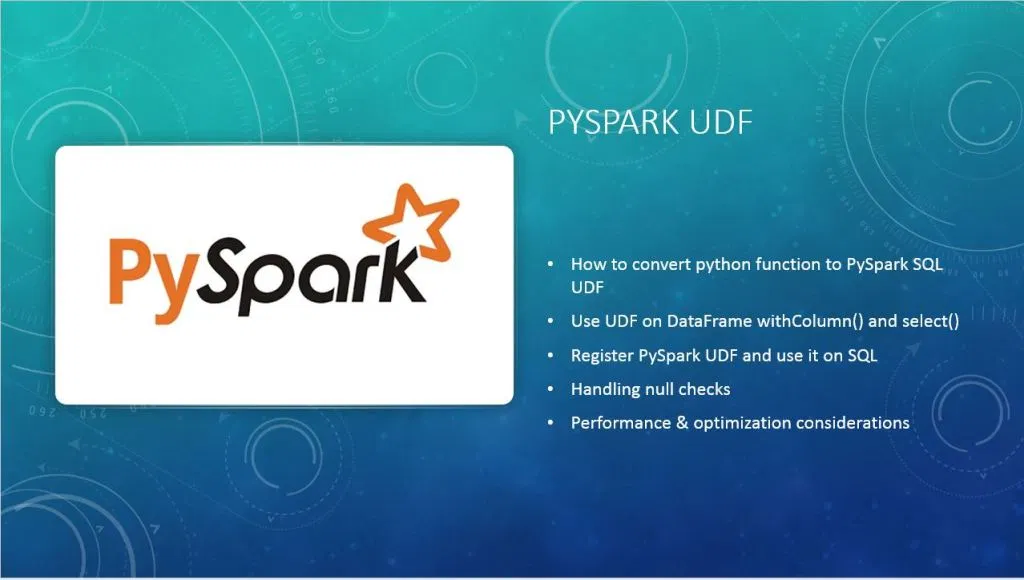

PySpark UDF (a.k.a `User Defined Function`) is the most useful feature of `Spark SQL` & `DataFrame` that is used to extend the PySpark build in capabilities. In this article, I will explain what is UDF? why do we need it and how to create and use it on `DataFrame select()`, `withColumn()` and SQL using PySpark (Spark with Python) examples.

Note: UDF’s are the `most expensive` operations hence use them only you have no choice and when essential. In the later section of the article, I will explain why using UDF’s is an expensive operation in detail.

# 1.1 What is UDF?
UDF’s a.k.a `User Defined Functions`, If you are coming from SQL background, UDF’s are nothing new to you as most of the traditional RDBMS databases support User Defined Functions, these functions need to `register` in the database library and use them on SQL as `regular functions`.

PySpark UDF’s are similar to UDF on traditional databases. In PySpark, you create a function in a `Python syntax` and `wrap` it with PySpark SQL udf() or register it as udf and use it on DataFrame and SQL respectively.

# 1.2 Why do we need a UDF?
UDF’s are used to extend the functions of the framework and re-use these functions on multiple DataFrame’s. For example, you wanted to convert every first letter of a word in a name string to a capital case; PySpark build-in features don’t have this function hence you can create it a UDF and reuse this as needed on many Data Frames. UDF’s are once created they can be re-used on several DataFrame’s and SQL expressions.

Before you create any UDF, do your research to check if the similar function you wanted is already available in Spark SQL Functions. PySpark SQL provides several predefined common functions and many more new functions are added with every release. hence, It is best to check before you reinventing the wheel.

When you creating UDF’s you need to `design` them very carefully otherwise you will come `across optimization` & `performance issues.`

# Create PySpark UDF
2.1 Create a DataFrame

In [217]:

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

columns = ["Seqno","Name"]
data = [("1", "john jones"),
    ("2", "tracey smith"),
    ("3", "amy sanders")]

df = spark.createDataFrame(data=data,schema=columns)

df.show(truncate=False)


+-----+------------+
|Seqno|Name        |
+-----+------------+
|1    |john jones  |
|2    |tracey smith|
|3    |amy sanders |
+-----+------------+



# Create a Python Function
The first step in creating a UDF is creating a Python function. Below snippet creates a function convertCase() which takes a string parameter and converts the first letter of every word to capital letter. UDF’s take parameters of your choice and returns a value.

In [218]:

def convertCase(str):
    resStr=""
    arr = str.split(" ")
    for x in arr:
       resStr= resStr + x[0:1].upper() + x[1:len(x)] + " "
    return resStr 


# Convert a Python function to PySpark UDF
Now convert this function convertCase() to UDF by passing the function to PySpark SQL udf(), this function is available at org.apache.spark.sql.functions.udf package. Make sure you import this package before using it.

PySpark SQL udf() function returns org.apache.spark.sql.expressions.UserDefinedFunction class object.


In [219]:

""" Converting function to UDF """
convertUDF = udf(lambda z: convertCase(z),StringType())


The default type of the udf() is StringType hence, you can also write the above statement without return type.

In [220]:

""" Converting function to UDF 
StringType() is by default hence not required """
convertUDF = udf(lambda z: convertCase(z)) 


# Using UDF with DataFrame
3.1 Using UDF with PySpark DataFrame select()
Now you can use convertUDF() on a DataFrame column as a regular build-in function.

In [221]:

df.select(col("Seqno"), \
    convertUDF(col("Name")).alias("Name") ) \
   .show(truncate=False)

+-----+-------------+
|Seqno|Name         |
+-----+-------------+
|1    |John Jones   |
|2    |Tracey Smith |
|3    |Amy Sanders  |
+-----+-------------+



# Using UDF with PySpark DataFrame withColumn()
You could also use udf on DataFrame withColumn() function, to explain this I will create another upperCase() function which converts the input string to upper case.

In [222]:

def upperCase(str):
    return str.upper()


In [223]:

upperCaseUDF = udf(lambda z:upperCase(z),StringType())   

df.withColumn("Cureated Name", upperCaseUDF(col("Name"))) \
  .show(truncate=False)


+-----+------------+-------------+
|Seqno|Name        |Cureated Name|
+-----+------------+-------------+
|1    |john jones  |JOHN JONES   |
|2    |tracey smith|TRACEY SMITH |
|3    |amy sanders |AMY SANDERS  |
+-----+------------+-------------+



# Registering PySpark UDF & use it on SQL
In order to use convertCase() function on PySpark SQL, you need to register the function with PySpark by using spark.udf.register().

In [224]:

""" Using UDF on SQL """
spark.udf.register("convertUDF", convertCase,StringType())
df.createOrReplaceTempView("NAME_TABLE")
spark.sql("select Seqno, convertUDF(Name) as Name from NAME_TABLE") \
     .show(truncate=False)


+-----+-------------+
|Seqno|Name         |
+-----+-------------+
|1    |John Jones   |
|2    |Tracey Smith |
|3    |Amy Sanders  |
+-----+-------------+



# Creating UDF using annotation
In the previous sections, you have learned creating a UDF is a 2 step process, first, you need to create a Python function, second convert function to UDF using SQL udf() function, however, you can avoid these two steps and create it with just a single step by using annotations.



In [225]:

@udf(returnType=StringType()) 
def upperCase(str):
    return str.upper()

df.withColumn("Cureated Name", upperCase(col("Name"))) \
.show(truncate=False)


+-----+------------+-------------+
|Seqno|Name        |Cureated Name|
+-----+------------+-------------+
|1    |john jones  |JOHN JONES   |
|2    |tracey smith|TRACEY SMITH |
|3    |amy sanders |AMY SANDERS  |
+-----+------------+-------------+



# Special Handling
#### 5.1 Execution order
One thing to aware is in `PySpark/Spark` does not guarantee the order of evaluation of subexpressions meaning expressions are not guarantee to evaluated left-to-right or in any other fixed order. PySpark `reorders` the execution for query optimization and planning hence, AND, OR, WHERE and HAVING expression will have side effects.

So when you are designing and using UDF, you have to be very careful especially with null handling as these results runtime exceptions.

# Handling null check
UDF’s are error-prone when not designed carefully. for example, when you have a column that contains the value null on some records

In [227]:

""" null check """

columns = ["Seqno","Name"]
data = [("1", "john jones"),
    ("2", "tracey smith"),
    ("3", "amy sanders"),
    ('4',None)]

df2 = spark.createDataFrame(data=data,schema=columns)
df2.show(truncate=False)
df2.createOrReplaceTempView("NAME_TABLE2")

spark.sql("select convertUDF(Name) from NAME_TABLE2") \
     .show(truncate=False)


+-----+------------+
|Seqno|Name        |
+-----+------------+
|1    |john jones  |
|2    |tracey smith|
|3    |amy sanders |
|4    |null        |
+-----+------------+



PythonException: 
  An exception was thrown from the Python worker. Please see the stack trace below.
Traceback (most recent call last):
  File "C:\spark-3.0.3-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 605, in main
  File "C:\spark-3.0.3-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 597, in process
  File "C:\spark-3.0.3-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\serializers.py", line 223, in dump_stream
    self.serializer.dump_stream(self._batched(iterator), stream)
  File "C:\spark-3.0.3-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\serializers.py", line 141, in dump_stream
    for obj in iterator:
  File "C:\spark-3.0.3-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\serializers.py", line 212, in _batched
    for item in iterator:
  File "C:\spark-3.0.3-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 450, in mapper
  File "C:\spark-3.0.3-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 450, in <genexpr>
  File "C:\spark-3.0.3-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\worker.py", line 90, in <lambda>
  File "C:\spark-3.0.3-bin-hadoop2.7\python\lib\pyspark.zip\pyspark\util.py", line 107, in wrapper
    return f(*args, **kwargs)
  File "<ipython-input-218-6cc992af9cb0>", line 3, in convertCase
AttributeError: 'NoneType' object has no attribute 'split'


Note that from the above snippet, record with “Seqno 4” has value “None” for “name” column. Since we are not handling null with UDF function, using this on DataFrame returns below error. Note that in Python None is considered null.
# Below points to remember

Its always best practice to check for null inside a UDF function rather than checking for null outside.
In any case, if you can’t do a null check in UDF at lease use IF or CASE WHEN to check for null and call UDF conditionally.

In [228]:

spark.udf.register("_nullsafeUDF", lambda str: convertCase(str) if not str is None else "" , StringType())

spark.sql("select _nullsafeUDF(Name) from NAME_TABLE2") \
     .show(truncate=False)

spark.sql("select Seqno, _nullsafeUDF(Name) as Name from NAME_TABLE2 " + \
          " where Name is not null and _nullsafeUDF(Name) like '%John%'") \
     .show(truncate=False)    


+------------------+
|_nullsafeUDF(Name)|
+------------------+
|John Jones        |
|Tracey Smith      |
|Amy Sanders       |
|                  |
+------------------+

+-----+-----------+
|Seqno|Name       |
+-----+-----------+
|1    |John Jones |
+-----+-----------+



This executes successfully without errors as we are checking for null/none while registering UDF.

# Performance concern using UDF
UDF’s are a black box to PySpark hence it can’t apply optimization and you will lose all the optimization PySpark does on Dataframe/Dataset. When possible you should use Spark SQL built-in functions as these functions provide optimization. Consider creating UDF only when existing built-in SQL function doesn’t have it.

# Complete PySpark UDF Example

In [229]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

columns = ["Seqno","Name"]
data = [("1", "john jones"),
    ("2", "tracey smith"),
    ("3", "amy sanders")]

df = spark.createDataFrame(data=data,schema=columns)

df.show(truncate=False)

def convertCase(str):
    resStr=""
    arr = str.split(" ")
    for x in arr:
       resStr= resStr + x[0:1].upper() + x[1:len(x)] + " "
    return resStr 

""" Converting function to UDF """
convertUDF = udf(lambda z: convertCase(z))

df.select(col("Seqno"), \
    convertUDF(col("Name")).alias("Name") ) \
.show(truncate=False)

def upperCase(str):
    return str.upper()

upperCaseUDF = udf(lambda z:upperCase(z),StringType())    

df.withColumn("Cureated Name", upperCaseUDF(col("Name"))) \
.show(truncate=False)

""" Using UDF on SQL """
spark.udf.register("convertUDF", convertCase,StringType())
df.createOrReplaceTempView("NAME_TABLE")
spark.sql("select Seqno, convertUDF(Name) as Name from NAME_TABLE") \
     .show(truncate=False)
     
spark.sql("select Seqno, convertUDF(Name) as Name from NAME_TABLE " + \
          "where Name is not null and convertUDF(Name) like '%John%'") \
     .show(truncate=False)  
     
""" null check """

columns = ["Seqno","Name"]
data = [("1", "john jones"),
    ("2", "tracey smith"),
    ("3", "amy sanders"),
    ('4',None)]

df2 = spark.createDataFrame(data=data,schema=columns)
df2.show(truncate=False)
df2.createOrReplaceTempView("NAME_TABLE2")
    
spark.udf.register("_nullsafeUDF", lambda str: convertCase(str) if not str is None else "" , StringType())

spark.sql("select _nullsafeUDF(Name) from NAME_TABLE2") \
     .show(truncate=False)

spark.sql("select Seqno, _nullsafeUDF(Name) as Name from NAME_TABLE2 " + \
          " where Name is not null and _nullsafeUDF(Name) like '%John%'") \
     .show(truncate=False)  


+-----+------------+
|Seqno|Name        |
+-----+------------+
|1    |john jones  |
|2    |tracey smith|
|3    |amy sanders |
+-----+------------+

+-----+-------------+
|Seqno|Name         |
+-----+-------------+
|1    |John Jones   |
|2    |Tracey Smith |
|3    |Amy Sanders  |
+-----+-------------+

+-----+------------+-------------+
|Seqno|Name        |Cureated Name|
+-----+------------+-------------+
|1    |john jones  |JOHN JONES   |
|2    |tracey smith|TRACEY SMITH |
|3    |amy sanders |AMY SANDERS  |
+-----+------------+-------------+

+-----+-------------+
|Seqno|Name         |
+-----+-------------+
|1    |John Jones   |
|2    |Tracey Smith |
|3    |Amy Sanders  |
+-----+-------------+

+-----+-----------+
|Seqno|Name       |
+-----+-----------+
|1    |John Jones |
+-----+-----------+

+-----+------------+
|Seqno|Name        |
+-----+------------+
|1    |john jones  |
|2    |tracey smith|
|3    |amy sanders |
|4    |null        |
+-----+------------+

+------------------+
|_nul

# We have learned the following

* PySpark UDF is a User Defined Function that is used to create a reusable function in Spark.
* Once UDF created, that can be re-used on multiple DataFrames and SQL (after registering).
* The default type of the udf() is StringType.
* You need to handle nulls explicitly otherwise you will see side-effects.

# ========================================================
# PySpark Column Class | Operators & Functions
pyspark.sql.Column class provides several functions to work with DataFrame to manipulate the Column values, evaluate the boolean expression to filter rows, retrieve a value or part of a value from a DataFrame column, and to work with list, map & struct columns.

Key Points:

* PySpark Column class represents a single Column in a DataFrame.
* It provides functions that are most used to manipulate DataFrame Columns & Rows.
* Some of these Column functions evaluate a Boolean expression that can be used with filter() transformation to filter the  DataFrame Rows.
* Provides functions to get a value from a list column by index, map value by key & index, and finally struct nested column.
* PySpark also provides additional functions pyspark.sql.functions that take Column object and return a Column type.
* Note: Most of the pyspark.sql.functions return Column type hence it is very important to know the operation you can perform with Column type.

In [232]:
# create a Column class object is by using PySpark lit() SQL function, this takes a literal value and returns a Column object.
from pyspark.sql.functions import lit
colObj = lit("sparkbyexamples.com")


In [231]:
# also access the Column from DataFrame by multiple ways.
data=[("James",23),("Ann",40)]
df=spark.createDataFrame(data).toDF("name.fname","gender")
df.printSchema()
#root
# |-- name.fname: string (nullable = true)
# |-- gender: long (nullable = true)

# Using DataFrame object (df)
df.select(df.gender).show()
df.select(df["gender"]).show()
#Accessing column name with dot (with backticks)
df.select(df["`name.fname`"]).show()

#Using SQL col() function
from pyspark.sql.functions import col
df.select(col("gender")).show()
#Accessing column name with dot (with backticks)
df.select(col("`name.fname`")).show()


root
 |-- name.fname: string (nullable = true)
 |-- gender: long (nullable = true)

+------+
|gender|
+------+
|    23|
|    40|
+------+

+------+
|gender|
+------+
|    23|
|    40|
+------+

+----------+
|name.fname|
+----------+
|     James|
|       Ann|
+----------+

+------+
|gender|
+------+
|    23|
|    40|
+------+

+----------+
|name.fname|
+----------+
|     James|
|       Ann|
+----------+



In [233]:

#Create DataFrame with struct using Row class
from pyspark.sql import Row
data=[Row(name="James",prop=Row(hair="black",eye="blue")),
      Row(name="Ann",prop=Row(hair="grey",eye="black"))]
df=spark.createDataFrame(data)
df.printSchema()
#root
# |-- name: string (nullable = true)
# |-- prop: struct (nullable = true)
# |    |-- hair: string (nullable = true)
# |    |-- eye: string (nullable = true)

#Access struct column
df.select(df.prop.hair).show()
df.select(df["prop.hair"]).show()
df.select(col("prop.hair")).show()

#Access all columns from struct
df.select(col("prop.*")).show()


root
 |-- name: string (nullable = true)
 |-- prop: struct (nullable = true)
 |    |-- hair: string (nullable = true)
 |    |-- eye: string (nullable = true)

+---------+
|prop.hair|
+---------+
|    black|
|     grey|
+---------+

+-----+
| hair|
+-----+
|black|
| grey|
+-----+

+-----+
| hair|
+-----+
|black|
| grey|
+-----+

+-----+-----+
| hair|  eye|
+-----+-----+
|black| blue|
| grey|black|
+-----+-----+



# PySpark Column Operators
PySpark column also provides a way to do arithmetic operations on columns using operators.

In [234]:

data=[(100,2,1),(200,3,4),(300,4,4)]
df=spark.createDataFrame(data).toDF("col1","col2","col3")

#Arthmetic operations
df.select(df.col1 + df.col2).show()
df.select(df.col1 - df.col2).show() 
df.select(df.col1 * df.col2).show()
df.select(df.col1 / df.col2).show()
df.select(df.col1 % df.col2).show()

df.select(df.col2 > df.col3).show()
df.select(df.col2 < df.col3).show()
df.select(df.col2 == df.col3).show()


+-------------+
|(col1 + col2)|
+-------------+
|          102|
|          203|
|          304|
+-------------+

+-------------+
|(col1 - col2)|
+-------------+
|           98|
|          197|
|          296|
+-------------+

+-------------+
|(col1 * col2)|
+-------------+
|          200|
|          600|
|         1200|
+-------------+

+-----------------+
|    (col1 / col2)|
+-----------------+
|             50.0|
|66.66666666666667|
|             75.0|
+-----------------+

+-------------+
|(col1 % col2)|
+-------------+
|            0|
|            2|
|            0|
+-------------+

+-------------+
|(col2 > col3)|
+-------------+
|         true|
|        false|
|        false|
+-------------+

+-------------+
|(col2 < col3)|
+-------------+
|        false|
|         true|
|        false|
+-------------+

+-------------+
|(col2 = col3)|
+-------------+
|        false|
|        false|
|         true|
+-------------+



# PySpark Column Functions
Let’s see some of the most used Column Functions, on below table, I have grouped related functions together to make it easy, click on the link for examples.
# PySpark Column Functions Examples

In [236]:

data=[("James","Bond","100",None),
      ("Ann","Varsa","200",'F'),
      ("Tom Cruise","XXX","400",''),
      ("Tom Brand",None,"400",'M')] 
columns=["fname","lname","id","gender"]
df=spark.createDataFrame(data,columns)
df.show()

+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|     James| Bond|100|  null|
|       Ann|Varsa|200|     F|
|Tom Cruise|  XXX|400|      |
| Tom Brand| null|400|     M|
+----------+-----+---+------+



# alias() – Set’s name to Column
On below example df.fname refers to Column object and alias() is a function of the Column to give alternate name. Here, fname column has been changed to first_name & lname to last_name.

On second example I have use PySpark expr() function to concatenate columns and named column as fullName.



In [237]:

#alias
from pyspark.sql.functions import expr
df.select(df.fname.alias("first_name"), \
          df.lname.alias("last_name")
   ).show()

#Another example
df.select(expr(" fname ||','|| lname").alias("fullName") \
   ).show()


+----------+---------+
|first_name|last_name|
+----------+---------+
|     James|     Bond|
|       Ann|    Varsa|
|Tom Cruise|      XXX|
| Tom Brand|     null|
+----------+---------+

+--------------+
|      fullName|
+--------------+
|    James,Bond|
|     Ann,Varsa|
|Tom Cruise,XXX|
|          null|
+--------------+



# asc() & desc() – Sort the DataFrame columns by Ascending or Descending order.

In [238]:

#asc, desc to sort ascending and descending order repsectively.
df.sort(df.fname.asc()).show()
df.sort(df.fname.desc()).show()


+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|       Ann|Varsa|200|     F|
|     James| Bond|100|  null|
| Tom Brand| null|400|     M|
|Tom Cruise|  XXX|400|      |
+----------+-----+---+------+

+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|Tom Cruise|  XXX|400|      |
| Tom Brand| null|400|     M|
|     James| Bond|100|  null|
|       Ann|Varsa|200|     F|
+----------+-----+---+------+



# cast() & astype() – Used to convert the data Type

In [239]:

#cast
df.select(df.fname,df.id.cast("int")).printSchema()


root
 |-- fname: string (nullable = true)
 |-- id: integer (nullable = true)



# between() – Returns a Boolean expression when a column values in between lower and upper bound.

In [240]:

#between
df.filter(df.id.between(100,300)).show()


+-----+-----+---+------+
|fname|lname| id|gender|
+-----+-----+---+------+
|James| Bond|100|  null|
|  Ann|Varsa|200|     F|
+-----+-----+---+------+



# contains() – Checks if a DataFrame column value contains a a value specified in this function.

In [241]:

#contains
df.filter(df.fname.contains("Cruise")).show()


+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|Tom Cruise|  XXX|400|      |
+----------+-----+---+------+



# startswith() & endswith() – Checks if the value of the DataFrame Column starts and ends with a String respectively.

In [242]:

#startswith, endswith()
df.filter(df.fname.startswith("T")).show()
df.filter(df.fname.endswith("Cruise")).show()


+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|Tom Cruise|  XXX|400|      |
| Tom Brand| null|400|     M|
+----------+-----+---+------+

+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|Tom Cruise|  XXX|400|      |
+----------+-----+---+------+



# sNull & isNotNull() – Checks if the DataFrame column has NULL or non NULL values.


In [243]:

#isNull & isNotNull
df.filter(df.lname.isNull()).show()
df.filter(df.lname.isNotNull()).show()


+---------+-----+---+------+
|    fname|lname| id|gender|
+---------+-----+---+------+
|Tom Brand| null|400|     M|
+---------+-----+---+------+

+----------+-----+---+------+
|     fname|lname| id|gender|
+----------+-----+---+------+
|     James| Bond|100|  null|
|       Ann|Varsa|200|     F|
|Tom Cruise|  XXX|400|      |
+----------+-----+---+------+



# like() & rlike() – Similar to SQL LIKE expression

In [244]:

#like , rlike
df.select(df.fname,df.lname,df.id) \
  .filter(df.fname.like("%om")) 


DataFrame[fname: string, lname: string, id: string]

# substr() – Returns a Column after getting sub string from the Column

In [245]:

df.select(df.fname.substr(1,2).alias("substr")).show()


+------+
|substr|
+------+
|    Ja|
|    An|
|    To|
|    To|
+------+



# when() & otherwise() – It is similar to SQL Case When, executes sequence of expressions until it matches the condition and returns a value when match.

In [246]:

#when & otherwise
from pyspark.sql.functions import when
df.select(df.fname,df.lname,when(df.gender=="M","Male") \
              .when(df.gender=="F","Female") \
              .when(df.gender==None ,"") \
              .otherwise(df.gender).alias("new_gender") \
    ).show()


+----------+-----+----------+
|     fname|lname|new_gender|
+----------+-----+----------+
|     James| Bond|      null|
|       Ann|Varsa|    Female|
|Tom Cruise|  XXX|          |
| Tom Brand| null|      Male|
+----------+-----+----------+



# isin() – Check if value presents in a List.

In [247]:

#isin
li=["100","200"]
df.select(df.fname,df.lname,df.id) \
  .filter(df.id.isin(li)) \
  .show()


+-----+-----+---+
|fname|lname| id|
+-----+-----+---+
|James| Bond|100|
|  Ann|Varsa|200|
+-----+-----+---+



# getField() – To get the value by key from MapType column and by stuct child name from StructType column
Rest of the below functions operates on List, Map & Struct data structures hence to demonstrate these I will use another DataFrame with list, map and struct columns. For more explanation how to use Arrays refer to PySpark ArrayType Column on DataFrame Examples & for map refer to PySpark MapType Examples

In [249]:

#Create DataFrame with struct, array & map
from pyspark.sql.types import StructType,StructField,StringType,ArrayType,MapType
data=[(("James","Bond"),["Java","C#"],{'hair':'black','eye':'brown'}),
      (("Ann","Varsa"),[".NET","Python"],{'hair':'brown','eye':'black'}),
      (("Tom Cruise",""),["Python","Scala"],{'hair':'red','eye':'grey'}),
      (("Tom Brand",None),["Perl","Ruby"],{'hair':'black','eye':'blue'})]

schema = StructType([
        StructField('name', StructType([
            StructField('fname', StringType(), True),
            StructField('lname', StringType(), True)])),
        StructField('languages', ArrayType(StringType()),True),
        StructField('properties', MapType(StringType(),StringType()),True)
     ])
df=spark.createDataFrame(data,schema)
df.printSchema()

# #Display's to console
# root
#  |-- name: struct (nullable = true)
#  |    |-- fname: string (nullable = true)
#  |    |-- lname: string (nullable = true)
#  |-- languages: array (nullable = true)
#  |    |-- element: string (containsNull = true)
#  |-- properties: map (nullable = true)
#  |    |-- key: string
#  |    |-- value: string (valueContainsNull = true)


root
 |-- name: struct (nullable = true)
 |    |-- fname: string (nullable = true)
 |    |-- lname: string (nullable = true)
 |-- languages: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- properties: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)



In [250]:

#getField from MapType
df.select(df.properties.getField("hair")).show()

#getField from Struct
df.select(df.name.getField("fname")).show()


+----------------+
|properties[hair]|
+----------------+
|           black|
|           brown|
|             red|
|           black|
+----------------+

+----------+
|name.fname|
+----------+
|     James|
|       Ann|
|Tom Cruise|
| Tom Brand|
+----------+



# getItem() – To get the value by index from MapType or ArrayTupe & ny key for MapType column.

In [251]:

#getItem() used with ArrayType
df.select(df.languages.getItem(1)).show()

#getItem() used with MapType
df.select(df.properties.getItem("hair")).show()


+------------+
|languages[1]|
+------------+
|          C#|
|      Python|
|       Scala|
|        Ruby|
+------------+

+----------------+
|properties[hair]|
+----------------+
|           black|
|           brown|
|             red|
|           black|
+----------------+



# ====================================================
# PySpark Select Columns From DataFrame

In PySpark, select() function is used to select single, multiple, column by index, all columns from the list and the nested columns from a DataFrame, PySpark select() is a transformation function hence it returns a new DataFrame with the selected columns.

In [252]:
# lets create DataFrame

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
data = [("James","Smith","USA","CA"),
    ("Michael","Rose","USA","NY"),
    ("Robert","Williams","USA","CA"),
    ("Maria","Jones","USA","FL")
  ]
columns = ["firstname","lastname","country","state"]
df = spark.createDataFrame(data = data, schema = columns)
df.show(truncate=False)


+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|James    |Smith   |USA    |CA   |
|Michael  |Rose    |USA    |NY   |
|Robert   |Williams|USA    |CA   |
|Maria    |Jones   |USA    |FL   |
+---------+--------+-------+-----+



# Select Single & Multiple Columns From PySpark
You can select the single or multiple columns of the DataFrame by passing the column names you wanted to select to the select() function. Since DataFrame is immutable, this creates a new DataFrame with selected columns. show() function is used to show the Dataframe contents.

Below are ways to select single, multiple or all columns.

In [253]:

df.select("firstname","lastname").show()
df.select(df.firstname,df.lastname).show()
df.select(df["firstname"],df["lastname"]).show()

#By using col() function
from pyspark.sql.functions import col
df.select(col("firstname"),col("lastname")).show()

#Select columns by regular expression
df.select(df.colRegex("`^.*name*`")).show()


+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+



# Select All Columns From List

In [254]:

# Select All columns from List
df.select(*columns).show()

# Select All columns
df.select([col for col in df.columns]).show()
df.select("*").show()


+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|    James|   Smith|    USA|   CA|
|  Michael|    Rose|    USA|   NY|
|   Robert|Williams|    USA|   CA|
|    Maria|   Jones|    USA|   FL|
+---------+--------+-------+-----+

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|    James|   Smith|    USA|   CA|
|  Michael|    Rose|    USA|   NY|
|   Robert|Williams|    USA|   CA|
|    Maria|   Jones|    USA|   FL|
+---------+--------+-------+-----+

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|    James|   Smith|    USA|   CA|
|  Michael|    Rose|    USA|   NY|
|   Robert|Williams|    USA|   CA|
|    Maria|   Jones|    USA|   FL|
+---------+--------+-------+-----+



# Select Columns by Index

In [255]:

#Selects first 3 columns and top 3 rows
df.select(df.columns[:3]).show(3)

#Selects columns 2 to 4  and top 3 rows
df.select(df.columns[2:4]).show(3)


+---------+--------+-------+
|firstname|lastname|country|
+---------+--------+-------+
|    James|   Smith|    USA|
|  Michael|    Rose|    USA|
|   Robert|Williams|    USA|
+---------+--------+-------+
only showing top 3 rows

+-------+-----+
|country|state|
+-------+-----+
|    USA|   CA|
|    USA|   NY|
|    USA|   CA|
+-------+-----+
only showing top 3 rows



# Select Nested Struct Columns from PySpark
If you have a nested struct (StructType) column on PySpark DataFrame, you need to use an explicit column qualifier in order to select. If you are new to PySpark and you have not learned StructType yet, I would recommend skipping the rest of the section or first Understand PySpark StructType before you proceed.

First, let’s create a new DataFrame with a struct type.

In [256]:

data = [
        (("James",None,"Smith"),"OH","M"),
        (("Anna","Rose",""),"NY","F"),
        (("Julia","","Williams"),"OH","F"),
        (("Maria","Anne","Jones"),"NY","M"),
        (("Jen","Mary","Brown"),"NY","M"),
        (("Mike","Mary","Williams"),"OH","M")
        ]

from pyspark.sql.types import StructType,StructField, StringType        
schema = StructType([
    StructField('name', StructType([
         StructField('firstname', StringType(), True),
         StructField('middlename', StringType(), True),
         StructField('lastname', StringType(), True)
         ])),
     StructField('state', StringType(), True),
     StructField('gender', StringType(), True)
     ])
df2 = spark.createDataFrame(data = data, schema = schema)
df2.printSchema()
df2.show(truncate=False) # shows all columns


root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- state: string (nullable = true)
 |-- gender: string (nullable = true)

+----------------------+-----+------+
|name                  |state|gender|
+----------------------+-----+------+
|[James,, Smith]       |OH   |M     |
|[Anna, Rose, ]        |NY   |F     |
|[Julia, , Williams]   |OH   |F     |
|[Maria, Anne, Jones]  |NY   |M     |
|[Jen, Mary, Brown]    |NY   |M     |
|[Mike, Mary, Williams]|OH   |M     |
+----------------------+-----+------+



In [257]:
# let’s select struct column
df2.select("name").show(truncate=False)


+----------------------+
|name                  |
+----------------------+
|[James,, Smith]       |
|[Anna, Rose, ]        |
|[Julia, , Williams]   |
|[Maria, Anne, Jones]  |
|[Jen, Mary, Brown]    |
|[Mike, Mary, Williams]|
+----------------------+



In [258]:
# In order to select the specific column from a nested struct, you need to explicitly qualify the nested struct column name.


df2.select("name.firstname","name.lastname").show(truncate=False)

+---------+--------+
|firstname|lastname|
+---------+--------+
|James    |Smith   |
|Anna     |        |
|Julia    |Williams|
|Maria    |Jones   |
|Jen      |Brown   |
|Mike     |Williams|
+---------+--------+



In [259]:
# In order to get all columns from struct column.


df2.select("name.*").show(truncate=False)

+---------+----------+--------+
|firstname|middlename|lastname|
+---------+----------+--------+
|James    |null      |Smith   |
|Anna     |Rose      |        |
|Julia    |          |Williams|
|Maria    |Anne      |Jones   |
|Jen      |Mary      |Brown   |
|Mike     |Mary      |Williams|
+---------+----------+--------+



# Complete Example

In [260]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [("James","Smith","USA","CA"),
    ("Michael","Rose","USA","NY"),
    ("Robert","Williams","USA","CA"),
    ("Maria","Jones","USA","FL")
  ]

columns = ["firstname","lastname","country","state"]
df = spark.createDataFrame(data = data, schema = columns)
df.show(truncate=False)

df.select("firstname").show()

df.select("firstname","lastname").show()

#Using Dataframe object name
df.select(df.firstname,df.lastname).show()

# Using col function
from pyspark.sql.functions import col
df.select(col("firstname"),col("lastname")).show()

data = [(("James",None,"Smith"),"OH","M"),
        (("Anna","Rose",""),"NY","F"),
        (("Julia","","Williams"),"OH","F"),
        (("Maria","Anne","Jones"),"NY","M"),
        (("Jen","Mary","Brown"),"NY","M"),
        (("Mike","Mary","Williams"),"OH","M")
        ]

from pyspark.sql.types import StructType,StructField, StringType        
schema = StructType([
    StructField('name', StructType([
         StructField('firstname', StringType(), True),
         StructField('middlename', StringType(), True),
         StructField('lastname', StringType(), True)
         ])),
     StructField('state', StringType(), True),
     StructField('gender', StringType(), True)
     ])

df2 = spark.createDataFrame(data = data, schema = schema)
df2.printSchema()
df2.show(truncate=False) # shows all columns

df2.select("name").show(truncate=False)
df2.select("name.firstname","name.lastname").show(truncate=False)
df2.select("name.*").show(truncate=False)


+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|James    |Smith   |USA    |CA   |
|Michael  |Rose    |USA    |NY   |
|Robert   |Williams|USA    |CA   |
|Maria    |Jones   |USA    |FL   |
+---------+--------+-------+-----+

+---------+
|firstname|
+---------+
|    James|
|  Michael|
|   Robert|
|    Maria|
+---------+

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+

+---------+--------+
|firstname|lastname|
+---------+--------+
|    James|   Smith|
|  Michael|    Rose|
|   Robert|Williams|
|    Maria|   Jones|
+---------+--------+

root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string

# Select() is a transformation function of the DataFrame and is used to select single, multiple columns, select all columns from the list, select by index, and finally select nested struct columns, you have also learned how to select nested elements from the DataFrame.

# ===============================================================
# PySpark Collect() – Retrieve data from DataFrame

PySpark RDD/DataFrame collect() is an action operation that is used to retrieve all the elements of the dataset (from all nodes) to the driver node. We should use the collect() on smaller dataset usually after filter(), group() e.t.c. Retrieving larger datasets results in OutOfMemory error.

In this PySpark article, I will explain the usage of collect() with DataFrame example, when to avoid it, and the difference between collect() and select().

In [261]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

dept = [("Finance",10), \
    ("Marketing",20), \
    ("Sales",30), \
    ("IT",40) \
  ]
deptColumns = ["dept_name","dept_id"]
deptDF = spark.createDataFrame(data=dept, schema = deptColumns)
deptDF.show(truncate=False)


+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



In [262]:
# use the collect() to retrieve the data.


dataCollect = deptDF.collect()
print(dataCollect)


[Row(dept_name='Finance', dept_id=10), Row(dept_name='Marketing', dept_id=20), Row(dept_name='Sales', dept_id=30), Row(dept_name='IT', dept_id=40)]


deptDF.collect() retrieves all elements in a DataFrame as an Array of Row type to the driver node. printing a resultant array yields the below output.

In [263]:

[Row(dept_name='Finance', dept_id=10), 
Row(dept_name='Marketing', dept_id=20), 
Row(dept_name='Sales', dept_id=30), 
Row(dept_name='IT', dept_id=40)]


[Row(dept_name='Finance', dept_id=10),
 Row(dept_name='Marketing', dept_id=20),
 Row(dept_name='Sales', dept_id=30),
 Row(dept_name='IT', dept_id=40)]

Note that collect() is an action hence it does not return a DataFrame instead, it returns data in an Array to the driver. Once the data is in an array, you can use python for loop to process it further.

In [264]:

for row in dataCollect:
    print(row['dept_name'] + "," +str(row['dept_id']))


Finance,10
Marketing,20
Sales,30
IT,40


In [265]:

#Returns value of First Row, First Column which is "Finance"
deptDF.collect()[0][0]


'Finance'

# Let’s understand what’s happening on above statement.

* deptDF.collect() returns Array of Row type.
* deptDF.collect()[0] returns the first element in an array (1st row).
* deptDF.collect[0][0] returns the value of the first row & first column.
* In case you want to just return certain elements of a DataFrame, you should call PySpark select() transformation first.



In [268]:

dataCollect = deptDF.select("dept_name").collect()
print(dataCollect)

[Row(dept_name='Finance'), Row(dept_name='Marketing'), Row(dept_name='Sales'), Row(dept_name='IT')]


# When to avoid Collect()
Usually, collect() is used to retrieve the action output when you have very small result set and calling collect() on an RDD/DataFrame with a bigger result set causes out of memory as it returns the entire dataset (from all workers) to the driver hence we should avoid calling collect() on a larger dataset.

# collect () vs select ()
select() is a transformation that returns a new DataFrame and holds the columns that are selected whereas collect() is an action that returns the entire data set in an Array to the driver.

# Complete Example of PySpark collect()

In [267]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

dept = [("Finance",10), \
    ("Marketing",20), \
    ("Sales",30), \
    ("IT",40) \
  ]
deptColumns = ["dept_name","dept_id"]
deptDF = spark.createDataFrame(data=dept, schema = deptColumns)
deptDF.printSchema()
deptDF.show(truncate=False)

dataCollect = deptDF.collect()

print(dataCollect)

dataCollect2 = deptDF.select("dept_name").collect()
print(dataCollect2)

for row in dataCollect:
    print(row['dept_name'] + "," +str(row['dept_id']))


root
 |-- dept_name: string (nullable = true)
 |-- dept_id: long (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+

[Row(dept_name='Finance', dept_id=10), Row(dept_name='Marketing', dept_id=20), Row(dept_name='Sales', dept_id=30), Row(dept_name='IT', dept_id=40)]
[Row(dept_name='Finance'), Row(dept_name='Marketing'), Row(dept_name='Sales'), Row(dept_name='IT')]
Finance,10
Marketing,20
Sales,30
IT,40


# collect() function of the RDD/DataFrame is an action operation that returns all elements of the DataFrame to spark driver program and also learned it’s not a good practice to use it on the bigger dataset.

# ===========================================================

# PySpark map() Transformation
PySpark map (map()) is an RDD transformation that is used to apply the transformation function (lambda) on every element of RDD/DataFrame and returns a new RDD. In this article, you will learn the syntax and usage of the RDD map() transformation with an example and how to use it with DataFrame.

* RDD map() transformation is used to apply any complex operations like adding a column, updating a column, transforming the data e.t.c, the output of map transformations would always have the same number of records as input.

* Note1: DataFrame doesn’t have map() transformation to use with DataFrame hence you need to DataFrame to RDD first.
* Note2: If you have a heavy initialization use PySpark mapPartitions() transformation instead of map(), as with mapPartitions() heavy initialization executes only once for each partition instead of every record.

In [285]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]") \
    .appName("SparkByExamples.com").getOrCreate()

data = ["Project","Gutenberg’s","Alice’s","Adventures",
"in","Wonderland","Project","Gutenberg’s","Adventures",
"in","Wonderland","Project","Gutenberg’s"]

rdd=spark.sparkContext.parallelize(data)


# PySpark map() Example with RDD

In [287]:

rdd2=rdd.map(lambda x: (x,1))
for element in rdd2.collect():
    print(element)


('Project', 1)
('Gutenberg’s', 1)
('Alice’s', 1)
('Adventures', 1)
('in', 1)
('Wonderland', 1)
('Project', 1)
('Gutenberg’s', 1)
('Adventures', 1)
('in', 1)
('Wonderland', 1)
('Project', 1)
('Gutenberg’s', 1)


# PySpark map() Example with DataFrame
PySpark DataFrame doesn’t have map() transformation to apply the lambda function, when you wanted to apply the custom transformation, you need to convert the DataFrame to RDD and apply the map() transformation. Let’s use another dataset to explain this.

In [288]:

data = [('James','Smith','M',30),
  ('Anna','Rose','F',41),
  ('Robert','Williams','M',62), 
]

columns = ["firstname","lastname","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)
df.show()
# +---------+--------+------+------+
# |firstname|lastname|gender|salary|
# +---------+--------+------+------+
# |    James|   Smith|     M|    30|
# |     Anna|    Rose|     F|    41|
# |   Robert|Williams|     M|    62|
# +---------+--------+------+------+


+---------+--------+------+------+
|firstname|lastname|gender|salary|
+---------+--------+------+------+
|    James|   Smith|     M|    30|
|     Anna|    Rose|     F|    41|
|   Robert|Williams|     M|    62|
+---------+--------+------+------+



In [290]:

# Refering columns by index.
rdd2=df.rdd.map(lambda x: 
    (x[0]+","+x[1],x[2],x[3]*2)
    )  
df2=rdd2.toDF(["name","gender","new_salary"]   )
df2.show()
# +---------------+------+----------+
# |           name|gender|new_salary|
# +---------------+------+----------+
# |    James,Smith|     M|        60|
# |      Anna,Rose|     F|        82|
# |Robert,Williams|     M|       124|
# +---------------+------+----------+


+---------------+------+----------+
|           name|gender|new_salary|
+---------------+------+----------+
|    James,Smith|     M|        60|
|      Anna,Rose|     F|        82|
|Robert,Williams|     M|       124|
+---------------+------+----------+



In [292]:

# Referring Column Names
rdd2=df.rdd.map(lambda x: 
    (x.firstname+","+x.lastname,x.gender,x.salary*2)
    ) 


In [293]:

# By Calling function
def func1(x):
    firstName=x.firstname
    lastName=x.lastname
    name=firstName+","+lastName
    gender=x.gender.lower()
    salary=x.salary*2
    return (name,gender,salary)

rdd2=df.rdd.map(lambda x: func1(x))


# Complete PySpark map() example

In [294]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = ["Project",
"Gutenberg’s",
"Alice’s",
"Adventures",
"in",
"Wonderland",
"Project",
"Gutenberg’s",
"Adventures",
"in",
"Wonderland",
"Project",
"Gutenberg’s"]

rdd=spark.sparkContext.parallelize(data)

rdd2=rdd.map(lambda x: (x,1))
for element in rdd2.collect():
    print(element)
    
data = [('James','Smith','M',30),
  ('Anna','Rose','F',41),
  ('Robert','Williams','M',62), 
]

columns = ["firstname","lastname","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)
df.show()

rdd2=df.rdd.map(lambda x: 
    (x[0]+","+x[1],x[2],x[3]*2)
    )  
df2=rdd2.toDF(["name","gender","new_salary"]   )
df2.show()

#Referring Column Names
rdd2=df.rdd.map(lambda x: 
    (x["firstname"]+","+x["lastname"],x["gender"],x["salary"]*2)
    ) 

#Referring Column Names
rdd2=df.rdd.map(lambda x: 
    (x.firstname+","+x.lastname,x.gender,x.salary*2)
    ) 

def func1(x):
    firstName=x.firstname
    lastName=x.lastname
    name=firstName+","+lastName
    gender=x.gender.lower()
    salary=x.salary*2
    return (name,gender,salary)

rdd2=df.rdd.map(lambda x: func1(x))


('Project', 1)
('Gutenberg’s', 1)
('Alice’s', 1)
('Adventures', 1)
('in', 1)
('Wonderland', 1)
('Project', 1)
('Gutenberg’s', 1)
('Adventures', 1)
('in', 1)
('Wonderland', 1)
('Project', 1)
('Gutenberg’s', 1)
+---------+--------+------+------+
|firstname|lastname|gender|salary|
+---------+--------+------+------+
|    James|   Smith|     M|    30|
|     Anna|    Rose|     F|    41|
|   Robert|Williams|     M|    62|
+---------+--------+------+------+

+---------------+------+----------+
|           name|gender|new_salary|
+---------------+------+----------+
|    James,Smith|     M|        60|
|      Anna,Rose|     F|        82|
|Robert,Williams|     M|       124|
+---------------+------+----------+



# =====================================================
# PySpark flatMap() Transformation

PySpark flatMap() is a transformation operation that flattens the RDD/DataFrame (array/map DataFrame columns) after applying the function on every element and returns a new PySpark RDD/DataFrame. In this article, you will learn the syntax and usage of the PySpark flatMap() with an example.

In [295]:

data = ["Project Gutenberg’s",
        "Alice’s Adventures in Wonderland",
        "Project Gutenberg’s",
        "Adventures in Wonderland",
        "Project Gutenberg’s"]
rdd=spark.sparkContext.parallelize(data)
for element in rdd.collect():
    print(element)


Project Gutenberg’s
Alice’s Adventures in Wonderland
Project Gutenberg’s
Adventures in Wonderland
Project Gutenberg’s


# flatMap() Example

In [296]:

rdd2=rdd.flatMap(lambda x: x.split(" "))
for element in rdd2.collect():
    print(element)


Project
Gutenberg’s
Alice’s
Adventures
in
Wonderland
Project
Gutenberg’s
Adventures
in
Wonderland
Project
Gutenberg’s


# Complete PySpark flatMap() example

In [297]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = ["Project Gutenberg’s",
        "Alice’s Adventures in Wonderland",
        "Project Gutenberg’s",
        "Adventures in Wonderland",
        "Project Gutenberg’s"]
rdd=spark.sparkContext.parallelize(data)
for element in rdd.collect():
    print(element)

#Flatmap    
rdd2=rdd.flatMap(lambda x: x.split(" "))
for element in rdd2.collect():
    print(element)


Project Gutenberg’s
Alice’s Adventures in Wonderland
Project Gutenberg’s
Adventures in Wonderland
Project Gutenberg’s
Project
Gutenberg’s
Alice’s
Adventures
in
Wonderland
Project
Gutenberg’s
Adventures
in
Wonderland
Project
Gutenberg’s


# =====================================================
# PySpark – Loop/Iterate Through Rows in DataFrame

PySpark provides map(), mapPartitions() to loop/iterate through rows in RDD/DataFrame to perform the complex transformations, and these two returns the same number of records as in the original DataFrame but the number of columns could be different (after add/update).

PySpark also provides foreach() & foreachPartitions() actions to loop/iterate through each Row in a DataFrame but these two returns nothing, In this article, I will explain how to use these methods to get DataFrame column values and process.

In [300]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [('James','Smith','M',30),('Anna','Rose','F',41),
  ('Robert','Williams','M',62), 
]
columns = ["firstname","lastname","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)
df.show()
# +---------+--------+------+------+
# |firstname|lastname|gender|salary|
# +---------+--------+------+------+
# |    James|   Smith|     M|    30|
# |     Anna|    Rose|     F|    41|
# |   Robert|Williams|     M|    62|
# +---------+--------+------+------+


+---------+--------+------+------+
|firstname|lastname|gender|salary|
+---------+--------+------+------+
|    James|   Smith|     M|    30|
|     Anna|    Rose|     F|    41|
|   Robert|Williams|     M|    62|
+---------+--------+------+------+



In [301]:

from pyspark.sql.functions import concat_ws,col,lit
df.select(concat_ws(",",df.firstname,df.lastname).alias("name"), \
          df.gender,lit(df.salary*2).alias("new_salary")).show()
# +---------------+------+----------+
# |           name|gender|new_salary|
# +---------------+------+----------+
# |    James,Smith|     M|        60|
# |      Anna,Rose|     F|        82|
# |Robert,Williams|     M|       124|
# +---------------+------+----------+


+---------------+------+----------+
|           name|gender|new_salary|
+---------------+------+----------+
|    James,Smith|     M|        60|
|      Anna,Rose|     F|        82|
|Robert,Williams|     M|       124|
+---------------+------+----------+



# Using map() to Loop Through Rows in DataFrame
PySpark map() Transformation is used to loop/iterate through the PySpark DataFrame/RDD by applying the transformation function (lambda) on every element (Rows and Columns) of RDD/DataFrame. PySpark doesn’t have a map() in DataFrame instead it’s in RDD hence we need to convert DataFrame to RDD first and then use the map(). It returns an RDD and you should Convert RDD to PySpark DataFrame if needed.

In [302]:

# Refering columns by index.
rdd=df.rdd.map(lambda x: 
    (x[0]+","+x[1],x[2],x[3]*2)
    )  
df2=rdd.toDF(["name","gender","new_salary"])
df2.show()


+---------------+------+----------+
|           name|gender|new_salary|
+---------------+------+----------+
|    James,Smith|     M|        60|
|      Anna,Rose|     F|        82|
|Robert,Williams|     M|       124|
+---------------+------+----------+



# Using foreach() to Loop Through Rows in DataFrame
Similar to map(), foreach() also applied to every row of DataFrame, the difference being foreach() is an action and it returns nothing. Below are some examples to iterate through DataFrame using for each.

In [306]:

# Foreach example
def f(x): print(x)
df.foreach(f)

# Another example
df.foreach(lambda x: 
    print("Data ==>"+x["firstname"]+","+x["lastname"]+","+x["gender"]+","+str(x["salary"]*2))
    ) 


# Using pandas() to Iterate

In [307]:

# Using pandas
import pandas as pd
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
pandasDF = df.toPandas()
for index, row in pandasDF.iterrows():
    print(row['firstname'], row['gender'])


C:\spark-3.0.3-bin-hadoop2.7\python\pyspark\sql\pandas\conversion.py:88: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.15.1 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


James M
Anna F
Robert M


# Collect Data As List and Loop Through
You can also Collect the PySpark DataFrame to Driver and iterate through Python, you can also use toLocalIterator().

In [308]:

# Collect the data to Python List
dataCollect = df.collect()
for row in dataCollect:
    print(row['firstname'] + "," +row['lastname'])

#Using toLocalIterator()
dataCollect=df.rdd.toLocalIterator()
for row in dataCollect:
    print(row['firstname'] + "," +row['lastname'])


James,Smith
Anna,Rose
Robert,Williams
James,Smith
Anna,Rose
Robert,Williams


# ==============================================
# PySpark Random Sample with Example
PySpark provides a pyspark.sql.DataFrame.sample(), pyspark.sql.DataFrame.sampleBy(), RDD.sample(), and RDD.takeSample() methods to get the random sampling subset from the large dataset, In this article I will explain with Python examples .

If you are working as a Data Scientist or Data analyst you often required to analyze a large dataset/file with billions or trillions of records, processing these large datasets takes some time hence during the analysis phase it is recommended to use a random subset sample from the large files.
# Using fraction to get a random sample in PySpark

In [313]:

from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()

df=spark.range(100)
print(df.sample(0.06).collect())
# //Output: [Row(id=0), Row(id=2), Row(id=17), Row(id=25), Row(id=26), Row(id=44), Row(id=80)]


[Row(id=0), Row(id=15), Row(id=29), Row(id=30), Row(id=34), Row(id=48), Row(id=49), Row(id=62), Row(id=80), Row(id=94)]


# Using seed to reproduce the same Samples in PySpark

In [311]:

print(df.sample(0.1,123).collect())
# //Output: 36,37,41,43,56,66,69,75,83
print(df.sample(0.1,123).collect())
# //Output: 36,37,41,43,56,66,69,75,83
print(df.sample(0.1,456).collect())
# //Output: 19,21,42,48,49,50,75,80


[Row(id=36), Row(id=37), Row(id=41), Row(id=43), Row(id=56), Row(id=66), Row(id=69), Row(id=75), Row(id=83)]
[Row(id=36), Row(id=37), Row(id=41), Row(id=43), Row(id=56), Row(id=66), Row(id=69), Row(id=75), Row(id=83)]
[Row(id=19), Row(id=21), Row(id=42), Row(id=48), Row(id=49), Row(id=50), Row(id=75), Row(id=80)]


# Sample withReplacement (May contain duplicates)
some times you may need to get a random sample with repeated values. By using the value true, results in repeated values.

In [315]:

print(df.sample(True,0.3,123).collect()) #//with Duplicates
# //Output: 0,5,9,11,14,14,16,17,21,29,33,41,42,52,52,54,58,65,65,71,76,79,85,96
print(df.sample(0.3,123).collect()) #// No duplicates
# //Output: 0,4,17,19,24,25,26,36,37,41,43,44,53,56,66,68,69,70,71,75,76,78,83,84,88,94,96,97,98


[Row(id=0), Row(id=5), Row(id=9), Row(id=11), Row(id=14), Row(id=14), Row(id=16), Row(id=17), Row(id=21), Row(id=29), Row(id=33), Row(id=41), Row(id=42), Row(id=52), Row(id=52), Row(id=54), Row(id=58), Row(id=65), Row(id=65), Row(id=71), Row(id=76), Row(id=79), Row(id=85), Row(id=96)]
[Row(id=0), Row(id=4), Row(id=17), Row(id=19), Row(id=24), Row(id=25), Row(id=26), Row(id=36), Row(id=37), Row(id=41), Row(id=43), Row(id=44), Row(id=53), Row(id=56), Row(id=66), Row(id=68), Row(id=69), Row(id=70), Row(id=71), Row(id=75), Row(id=76), Row(id=78), Row(id=83), Row(id=84), Row(id=88), Row(id=94), Row(id=96), Row(id=97), Row(id=98)]


# Stratified sampling in PySpark
You can get Stratified sampling in PySpark without replacement by using sampleBy() method. It returns a sampling fraction for each stratum. If a stratum is not specified, it takes zero as the default.

In [316]:

df2=df.select((df.id % 3).alias("key"))
print(df2.sampleBy("key", {0: 0.1, 1: 0.2},0).collect())
# //Output: [Row(key=0), Row(key=1), Row(key=1), Row(key=1), Row(key=0), Row(key=1), Row(key=1), Row(key=0), Row(key=1), Row(key=1), Row(key=1)]


[Row(key=0), Row(key=1), Row(key=1), Row(key=1), Row(key=0), Row(key=1), Row(key=1), Row(key=0), Row(key=1), Row(key=1), Row(key=1)]


# RDD sample() Syntax & Example

In [317]:

rdd = spark.sparkContext.range(0,100)
print(rdd.sample(False,0.1,0).collect())
# //Output: [24, 29, 41, 64, 86]
print(rdd.sample(True,0.3,123).collect())
# //Output: [0, 11, 13, 14, 16, 18, 21, 23, 27, 31, 32, 32, 48, 49, 49, 53, 54, 72, 74, 77, 77, 83, 88, 91, 93, 98, 99]


[24, 29, 41, 64, 86]
[0, 11, 13, 14, 16, 18, 21, 23, 27, 31, 32, 32, 48, 49, 49, 53, 54, 72, 74, 77, 77, 83, 88, 91, 93, 98, 99]


In [318]:

print(rdd.takeSample(False,10,0))
# //Output: [58, 1, 96, 74, 29, 24, 32, 37, 94, 91]
print(rdd.takeSample(True,30,123))
# //Output: [43, 65, 39, 18, 84, 86, 25, 13, 40, 21, 79, 63, 7, 32, 26, 71, 23, 61, 83, 60, 22, 35, 84, 22, 0, 88, 16, 40, 65, 84]


[58, 1, 96, 74, 29, 24, 32, 37, 94, 91]
[43, 65, 39, 18, 84, 86, 25, 13, 40, 21, 79, 63, 7, 32, 26, 71, 23, 61, 83, 60, 22, 35, 84, 22, 0, 88, 16, 40, 65, 84]


# =====================================================
# PySpark Pivot and Unpivot DataFrame

PySpark pivot() function is used to rotate/transpose the data from one column into multiple Dataframe columns and back using unpivot(). Pivot() It is an aggregation where one of the grouping columns values is transposed into individual columns with distinct data.

In [321]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr
#Create spark session
data = [("Banana",1000,"USA"), ("Carrots",1500,"USA"), ("Beans",1600,"USA"), \
      ("Orange",2000,"USA"),("Orange",2000,"USA"),("Banana",400,"China"), \
      ("Carrots",1200,"China"),("Beans",1500,"China"),("Orange",4000,"China"), \
      ("Banana",2000,"Canada"),("Carrots",2000,"Canada"),("Beans",2000,"Mexico")]

columns= ["Product","Amount","Country"]
df = spark.createDataFrame(data = data, schema = columns)
df.printSchema()
df.show(truncate=False)


root
 |-- Product: string (nullable = true)
 |-- Amount: long (nullable = true)
 |-- Country: string (nullable = true)

+-------+------+-------+
|Product|Amount|Country|
+-------+------+-------+
|Banana |1000  |USA    |
|Carrots|1500  |USA    |
|Beans  |1600  |USA    |
|Orange |2000  |USA    |
|Orange |2000  |USA    |
|Banana |400   |China  |
|Carrots|1200  |China  |
|Beans  |1500  |China  |
|Orange |4000  |China  |
|Banana |2000  |Canada |
|Carrots|2000  |Canada |
|Beans  |2000  |Mexico |
+-------+------+-------+



# Pivot PySpark DataFrame

In [322]:

pivotDF = df.groupBy("Product").pivot("Country").sum("Amount")
pivotDF.printSchema()
pivotDF.show(truncate=False)


root
 |-- Product: string (nullable = true)
 |-- Canada: long (nullable = true)
 |-- China: long (nullable = true)
 |-- Mexico: long (nullable = true)
 |-- USA: long (nullable = true)

+-------+------+-----+------+----+
|Product|Canada|China|Mexico|USA |
+-------+------+-----+------+----+
|Orange |null  |4000 |null  |4000|
|Carrots|2000  |1200 |null  |1500|
|Banana |2000  |400  |null  |1000|
|Beans  |null  |1500 |2000  |1600|
+-------+------+-----+------+----+



# Pivot Performance improvement in PySpark 2.0

In [323]:

countries = ["USA","China","Canada","Mexico"]
pivotDF = df.groupBy("Product").pivot("Country", countries).sum("Amount")
pivotDF.show(truncate=False)


+-------+----+-----+------+------+
|Product|USA |China|Canada|Mexico|
+-------+----+-----+------+------+
|Orange |4000|4000 |null  |null  |
|Carrots|1500|1200 |2000  |null  |
|Banana |1000|400  |2000  |null  |
|Beans  |1600|1500 |null  |2000  |
+-------+----+-----+------+------+



In [325]:

pivotDF = df.groupBy("Product","Country") \
      .sum("Amount") \
      .groupBy("Product") \
      .pivot("Country") \
      .sum("sum(Amount)")
pivotDF.show(truncate=False)


+-------+------+-----+------+----+
|Product|Canada|China|Mexico|USA |
+-------+------+-----+------+----+
|Orange |null  |4000 |null  |4000|
|Carrots|2000  |1200 |null  |1500|
|Banana |2000  |400  |null  |1000|
|Beans  |null  |1500 |2000  |1600|
+-------+------+-----+------+----+



# Unpivot PySpark DataFrame
Unpivot is a reverse operation, we can achieve by rotating column values into rows values. PySpark SQL doesn’t have unpivot function hence will use the stack() function. Below code converts column countries to row.

In [326]:

from pyspark.sql.functions import expr
unpivotExpr = "stack(3, 'Canada', Canada, 'China', China, 'Mexico', Mexico) as (Country,Total)"
unPivotDF = pivotDF.select("Product", expr(unpivotExpr)) \
    .where("Total is not null")
unPivotDF.show(truncate=False)
unPivotDF.show()

+-------+-------+-----+
|Product|Country|Total|
+-------+-------+-----+
|Orange |China  |4000 |
|Carrots|Canada |2000 |
|Carrots|China  |1200 |
|Banana |Canada |2000 |
|Banana |China  |400  |
|Beans  |China  |1500 |
|Beans  |Mexico |2000 |
+-------+-------+-----+

+-------+-------+-----+
|Product|Country|Total|
+-------+-------+-----+
| Orange|  China| 4000|
|Carrots| Canada| 2000|
|Carrots|  China| 1200|
| Banana| Canada| 2000|
| Banana|  China|  400|
|  Beans|  China| 1500|
|  Beans| Mexico| 2000|
+-------+-------+-----+



# Complete 

In [327]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [("Banana",1000,"USA"), ("Carrots",1500,"USA"), ("Beans",1600,"USA"), \
      ("Orange",2000,"USA"),("Orange",2000,"USA"),("Banana",400,"China"), \
      ("Carrots",1200,"China"),("Beans",1500,"China"),("Orange",4000,"China"), \
      ("Banana",2000,"Canada"),("Carrots",2000,"Canada"),("Beans",2000,"Mexico")]

columns= ["Product","Amount","Country"]
df = spark.createDataFrame(data = data, schema = columns)
df.printSchema()
df.show(truncate=False)

pivotDF = df.groupBy("Product").pivot("Country").sum("Amount")
pivotDF.printSchema()
pivotDF.show(truncate=False)

pivotDF = df.groupBy("Product","Country") \
      .sum("Amount") \
      .groupBy("Product") \
      .pivot("Country") \
      .sum("sum(Amount)")
pivotDF.printSchema()
pivotDF.show(truncate=False)

""" unpivot """
unpivotExpr = "stack(3, 'Canada', Canada, 'China', China, 'Mexico', Mexico) as (Country,Total)"
unPivotDF = pivotDF.select("Product", expr(unpivotExpr)) \
    .where("Total is not null")
unPivotDF.show(truncate=False)


root
 |-- Product: string (nullable = true)
 |-- Amount: long (nullable = true)
 |-- Country: string (nullable = true)

+-------+------+-------+
|Product|Amount|Country|
+-------+------+-------+
|Banana |1000  |USA    |
|Carrots|1500  |USA    |
|Beans  |1600  |USA    |
|Orange |2000  |USA    |
|Orange |2000  |USA    |
|Banana |400   |China  |
|Carrots|1200  |China  |
|Beans  |1500  |China  |
|Orange |4000  |China  |
|Banana |2000  |Canada |
|Carrots|2000  |Canada |
|Beans  |2000  |Mexico |
+-------+------+-------+

root
 |-- Product: string (nullable = true)
 |-- Canada: long (nullable = true)
 |-- China: long (nullable = true)
 |-- Mexico: long (nullable = true)
 |-- USA: long (nullable = true)

+-------+------+-----+------+----+
|Product|Canada|China|Mexico|USA |
+-------+------+-----+------+----+
|Orange |null  |4000 |null  |4000|
|Carrots|2000  |1200 |null  |1500|
|Banana |2000  |400  |null  |1000|
|Beans  |null  |1500 |2000  |1600|
+-------+------+-----+------+----+

root
 |-- Pro

Can we do PySpark DataFrame transpose or pivot without aggregation?
Off course you can, but unfortunately, you can’t achieve using the Pivot function. However, pivoting or transposing the DataFrame structure without aggregation from rows to columns and columns to rows can be easily done using PySpark and Scala hack.

# PySpark partitionBy() – Write to Disk Example
PySpark partitionBy() is a function of pyspark.sql.DataFrameWriter class which is used to partition the large dataset (DataFrame) into smaller files based on one or multiple columns while writing to disk, let’s see how to use this with Python examples.

Partitioning the data on the file system is a way to improve the performance of the query when dealing with a large dataset in the Data lake. A Data Lake is a centralized repository of structured, semi-structured, unstructured, and binary data that allows you to store a large amount of data as-is in its original raw format.
# 1. What is PySpark Partition?
PySpark partition is a way to split a large dataset into smaller datasets based on one or more partition keys. When you create a DataFrame from a file/table, based on certain parameters PySpark creates the DataFrame with a certain number of partitions in memory. This is one of the main advantages of PySpark DataFrame over Pandas DataFrame. Transformations on partitioned data run faster as they execute transformations parallelly for each partition.

PySpark supports partition in two ways; partition in memory (DataFrame) and partition on the disk (File system).

* Partition in memory: You can partition or repartition the DataFrame by calling repartition() or coalesce() transformations.

* Partition on disk: While writing the PySpark DataFrame back to disk, you can choose how to partition the data based on columns using partitionBy() of pyspark.sql.DataFrameWriter. This is similar to Hives partitions scheme.
# 2. Partition Advantages
As you are aware PySpark is designed to process large datasets with 100x faster than the tradition processing, this wouldn’t have been possible with out partition. Below are some of the advantages using PySpark partitions on memory or on disk.

* Fast accessed to the data
* Provides the ability to perform an operation on a smaller dataset
Partition at rest (disk) is a feature of many databases and data processing frameworks and it is key to make jobs work at scale

In [332]:

df=spark.read.option("header",True) \
        .csv("C:\\Users\\abhis\\Ankit chand\\Python\\simple-zipcodes.csv")
df.printSchema()

# #Display below schema
# root
#  |-- RecordNumber: string (nullable = true)
#  |-- Country: string (nullable = true)
#  |-- City: string (nullable = true)
#  |-- Zipcode: string (nullable = true)
#  |-- state: string (nullable = true)


root
 |-- RecordNumber: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- State: string (nullable = true)



#  PySpark partitionBy()

In [335]:

#partitionBy()
df.write.option("header",True) \
        .partitionBy("state") \
        .mode("overwrite") \
        .csv("C:\\Users\\abhis\\Ankit chand\\Python\\zipcodes.csv")


# PySpark partitionBy() Multiple Columns

In [336]:

#partitionBy() multiple columns
df.write.option("header",True) \
        .partitionBy("state","city") \
        .mode("overwrite") \
        .csv("C:\\Users\\abhis\\Ankit chand\\Python\\zipcodes.csv")


# PySpark SQL – Read Partition Data
#  Read a Specific Partition
Reads are much faster on partitioned data. This code snippet retrieves the data from a specific partition "state=AL and city=SPRINGVILLE". Here, It just reads the data from that specific folder instead of scanning a whole file (when not partitioned).

In [344]:

parqDF = spark.read.option("header",True) \
                  .csv("C:\\Users\\abhis\\Ankit chand\\Python\\zipcodes.csv")
parqDF.createOrReplaceTempView("ZIPCODE")
spark.sql("select * from ZIPCODE  where state='AL' and city = 'SPRINGVILLE'") \
    .show()

# #Display
# +------------+-------+-------+-----+-----------+
# |RecordNumber|Country|Zipcode|state|       city|
# +------------+-------+-------+-----+-----------+
# |       54355|     US|  35146|   AL|SPRINGVILLE|
# +------------+-------+-------+-----+-----------+


+------------+-------+-----------+-------+-----+
|RecordNumber|Country|       City|Zipcode|state|
+------------+-------+-----------+-------+-----+
|       54355|     US|SPRINGVILLE|  35146|   AL|
+------------+-------+-----------+-------+-----+



# How to Choose a Partition Column When Writing to File system?
When creating partitions you have to be very cautious with the number of partitions you would create, as having too many partitions creates too many sub-directories on HDFS which brings unnecessarily and overhead to NameNode (if you are using Hadoop) since it must keep all metadata for the file system in memory.

Let’s assume you have a US census table that contains zip code, city, state, and other columns. Creating a partition on the state, splits the table into around 50 partitions, when searching for a zipcode within a state (state=’CA’ and zipCode =’92704′) results in faster as it needs to scan only in a state=CA partition directory.

Partition on zipcode may not be a good option as you might end up with too many partitions.

Another good example of partition is on the Date column. Ideally, you should partition on Year/Month but not on a date.

# ==========================================================
# PySpark ArrayType Column With Examples

PySpark pyspark.sql.types.ArrayType (ArrayType extends DataType class) is used to define an array data type column on DataFrame that holds the same type of elements, In this article, I will explain how to create a DataFrame ArrayType column using org.apache.spark.sql.types.ArrayType class and applying some SQL functions on the array columns with examples.

While working with structured files (Avro, Parquet e.t.c) or semi-structured (JSON) files, we often get data with complex structures like MapType, ArrayType, StructType e.t.c. I will try my best to cover some mostly used functions on ArrayType columns.

# What is PySpark ArrayType
PySpark ArrayType is a collection data type that extends the DataType class which is a superclass of all types in PySpark. All elements of ArrayType should have the same type of elements.
# Create PySpark ArrayType

In [346]:

from pyspark.sql.types import StringType, ArrayType
arrayCol = ArrayType(StringType(),False)


Above example creates string array and doesn’t not accept null values.

# Create PySpark ArrayType Column Using StructType

In [347]:

data = [
 ("James,,Smith",["Java","Scala","C++"],["Spark","Java"],"OH","CA"),
 ("Michael,Rose,",["Spark","Java","C++"],["Spark","Java"],"NY","NJ"),
 ("Robert,,Williams",["CSharp","VB"],["Spark","Python"],"UT","NV")
]

from pyspark.sql.types import StringType, ArrayType,StructType,StructField
schema = StructType([ 
    StructField("name",StringType(),True), 
    StructField("languagesAtSchool",ArrayType(StringType()),True), 
    StructField("languagesAtWork",ArrayType(StringType()),True), 
    StructField("currentState", StringType(), True), 
    StructField("previousState", StringType(), True)
  ])

df = spark.createDataFrame(data=data,schema=schema)
df.printSchema()
df.show()


root
 |-- name: string (nullable = true)
 |-- languagesAtSchool: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- languagesAtWork: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- currentState: string (nullable = true)
 |-- previousState: string (nullable = true)

+----------------+------------------+---------------+------------+-------------+
|            name| languagesAtSchool|languagesAtWork|currentState|previousState|
+----------------+------------------+---------------+------------+-------------+
|    James,,Smith|[Java, Scala, C++]|  [Spark, Java]|          OH|           CA|
|   Michael,Rose,|[Spark, Java, C++]|  [Spark, Java]|          NY|           NJ|
|Robert,,Williams|      [CSharp, VB]|[Spark, Python]|          UT|           NV|
+----------------+------------------+---------------+------------+-------------+



# PySpark ArrayType (Array) Functions
# explode()
Use explode() function to create a new row for each element in the given array column. There are various PySpark SQL explode functions available to work with Array columns.

In [348]:

from pyspark.sql.functions import explode
df.select(df.name,explode(df.languagesAtSchool)).show()

# +----------------+------+
# |            name|   col|
# +----------------+------+
# |    James,,Smith|  Java|
# |    James,,Smith| Scala|
# |    James,,Smith|   C++|
# |   Michael,Rose,| Spark|
# |   Michael,Rose,|  Java|
# |   Michael,Rose,|   C++|
# |Robert,,Williams|CSharp|
# |Robert,,Williams|    VB|
# +----------------+------+


+----------------+------+
|            name|   col|
+----------------+------+
|    James,,Smith|  Java|
|    James,,Smith| Scala|
|    James,,Smith|   C++|
|   Michael,Rose,| Spark|
|   Michael,Rose,|  Java|
|   Michael,Rose,|   C++|
|Robert,,Williams|CSharp|
|Robert,,Williams|    VB|
+----------------+------+



# Split()
split() sql function returns an array type after splitting the string column by delimiter. Below example split the name column by comma delimiter.

In [349]:

from pyspark.sql.functions import split
df.select(split(df.name,",").alias("nameAsArray")).show()

# +--------------------+
# |         nameAsArray|
# +--------------------+
# |    [James, , Smith]|
# |   [Michael, Rose, ]|
# |[Robert, , Williams]|
# +--------------------+


+--------------------+
|         nameAsArray|
+--------------------+
|    [James, , Smith]|
|   [Michael, Rose, ]|
|[Robert, , Williams]|
+--------------------+



# array()
Use array() function to create a new array column by merging the data from multiple columns. All input columns must have the same data type. The below example combines the data from currentState and previousState and creates a new column states.

In [350]:

from pyspark.sql.functions import array
df.select(df.name,array(df.currentState,df.previousState).alias("States")).show()
# +----------------+--------+
# |            name|  States|
# +----------------+--------+
# |    James,,Smith|[OH, CA]|
# |   Michael,Rose,|[NY, NJ]|
# |Robert,,Williams|[UT, NV]|
# +----------------+--------+


+----------------+--------+
|            name|  States|
+----------------+--------+
|    James,,Smith|[OH, CA]|
|   Michael,Rose,|[NY, NJ]|
|Robert,,Williams|[UT, NV]|
+----------------+--------+



# array_contains()
array_contains() sql function is used to check if array column contains a value. Returns null if the array is null, true if the array contains the value, and false otherwise.

In [351]:

from pyspark.sql.functions import array_contains
df.select(df.name,array_contains(df.languagesAtSchool,"Java")
    .alias("array_contains")).show()

# +----------------+--------------+
# |            name|array_contains|
# +----------------+--------------+
# |    James,,Smith|          true|
# |   Michael,Rose,|          true|
# |Robert,,Williams|         false|
# +----------------+--------------+


+----------------+--------------+
|            name|array_contains|
+----------------+--------------+
|    James,,Smith|          true|
|   Michael,Rose,|          true|
|Robert,,Williams|         false|
+----------------+--------------+



# ===========================================================
# PySpark MapType (Dict) Usage with Examples
Post author:NNK
Post category:PySpark
PySpark MapType (also called map type) is a data type to represent Python Dictionary (dict) to store key-value pair, a MapType object comprises three fields, keyType (a DataType), valueType (a DataType) and valueContainsNull (a BooleanType).

# What is PySpark MapType
PySpark MapType is used to represent map key-value pair similar to python Dictionary (Dict), it extends DataType class which is a superclass of all types in PySpark and takes two mandatory arguments keyType and valueType of type DataType and one optional boolean argument valueContainsNull. keyType and valueType can be any type that extends the DataType class. for e.g StringType, IntegerType, ArrayType, MapType, StructType (struct) e.t.c.

# 1. Create PySpark MapType
In order to use MapType data type first, you need to import it from pyspark.sql.types.MapType and use MapType() constructor to create a map object.

In [352]:

from pyspark.sql.types import StringType, MapType
mapCol = MapType(StringType(),StringType(),False)


# MapType Key Points:

* The First param keyType is used to specify the type of the key in the map.
* The Second param valueType is used to specify the type of the value in the map.
* Third parm valueContainsNull is an optional boolean type that is used to specify if the value of the second param can accept Null/None values.
* The key of the map won’t accept None/Null values.
* PySpark provides several SQL functions to work with MapType.
# Create MapType From StructType

In [353]:

from pyspark.sql.types import StructField, StructType, StringType, MapType
schema = StructType([
    StructField('name', StringType(), True),
    StructField('properties', MapType(StringType(),StringType()),True)
])


In [354]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
dataDictionary = [
        ('James',{'hair':'black','eye':'brown'}),
        ('Michael',{'hair':'brown','eye':None}),
        ('Robert',{'hair':'red','eye':'black'}),
        ('Washington',{'hair':'grey','eye':'grey'}),
        ('Jefferson',{'hair':'brown','eye':''})
        ]
df = spark.createDataFrame(data=dataDictionary, schema = schema)
df.printSchema()
df.show(truncate=False)


root
 |-- name: string (nullable = true)
 |-- properties: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)

+----------+-----------------------------+
|name      |properties                   |
+----------+-----------------------------+
|James     |[eye -> brown, hair -> black]|
|Michael   |[eye ->, hair -> brown]      |
|Robert    |[eye -> black, hair -> red]  |
|Washington|[eye -> grey, hair -> grey]  |
|Jefferson |[eye -> , hair -> brown]     |
+----------+-----------------------------+



#  Access PySpark MapType Elements

In [355]:

df3=df.rdd.map(lambda x: \
    (x.name,x.properties["hair"],x.properties["eye"])) \
    .toDF(["name","hair","eye"])
df3.printSchema()
df3.show()

# root
#  |-- name: string (nullable = true)
#  |-- hair: string (nullable = true)
#  |-- eye: string (nullable = true)

# +----------+-----+-----+
# |      name| hair|  eye|
# +----------+-----+-----+
# |     James|black|brown|
# |   Michael|brown| null|
# |    Robert|  red|black|
# |Washington| grey| grey|
# | Jefferson|brown|     |
# +----------+-----+-----+


root
 |-- name: string (nullable = true)
 |-- hair: string (nullable = true)
 |-- eye: string (nullable = true)

+----------+-----+-----+
|      name| hair|  eye|
+----------+-----+-----+
|     James|black|brown|
|   Michael|brown| null|
|    Robert|  red|black|
|Washington| grey| grey|
| Jefferson|brown|     |
+----------+-----+-----+



In [357]:

df.withColumn("hair",df.properties.getItem("hair")) \
  .withColumn("eye",df.properties.getItem("eye")) \
  .drop("properties") \
  .show()

+----------+-----+-----+
|      name| hair|  eye|
+----------+-----+-----+
|     James|black|brown|
|   Michael|brown| null|
|    Robert|  red|black|
|Washington| grey| grey|
| Jefferson|brown|     |
+----------+-----+-----+



# Functions
Below are some of the MapType Functions with examples.

# explode

In [359]:

from pyspark.sql.functions import explode
df.select(df.name,explode(df.properties)).show()

# +----------+----+-----+
# |      name| key|value|
# +----------+----+-----+
# |     James| eye|brown|
# |     James|hair|black|
# |   Michael| eye| null|
# |   Michael|hair|brown|
# |    Robert| eye|black|
# |    Robert|hair|  red|
# |Washington| eye| grey|
# |Washington|hair| grey|
# | Jefferson| eye|     |
# | Jefferson|hair|brown|
# +----------+----+-----+


+----------+----+-----+
|      name| key|value|
+----------+----+-----+
|     James| eye|brown|
|     James|hair|black|
|   Michael| eye| null|
|   Michael|hair|brown|
|    Robert| eye|black|
|    Robert|hair|  red|
|Washington| eye| grey|
|Washington|hair| grey|
| Jefferson| eye|     |
| Jefferson|hair|brown|
+----------+----+-----+



# map_keys() – Get All Map Keys

In [360]:

from pyspark.sql.functions import map_keys
df.select(df.name,map_keys(df.properties)).show()

# +----------+--------------------+
# |      name|map_keys(properties)|
# +----------+--------------------+
# |     James|         [eye, hair]|
# |   Michael|         [eye, hair]|
# |    Robert|         [eye, hair]|
# |Washington|         [eye, hair]|
# | Jefferson|         [eye, hair]|
# +----------+--------------------+


+----------+--------------------+
|      name|map_keys(properties)|
+----------+--------------------+
|     James|         [eye, hair]|
|   Michael|         [eye, hair]|
|    Robert|         [eye, hair]|
|Washington|         [eye, hair]|
| Jefferson|         [eye, hair]|
+----------+--------------------+



# map_values() – Get All map Values

In [362]:

from pyspark.sql.functions import map_values
df.select(df.name,map_values(df.properties)).show()

# +----------+----------------------+
# |      name|map_values(properties)|
# +----------+----------------------+
# |     James|        [brown, black]|
# |   Michael|             [, brown]|
# |    Robert|          [black, red]|
# |Washington|          [grey, grey]|
# | Jefferson|             [, brown]|
# +----------+----------------------+


+----------+----------------------+
|      name|map_values(properties)|
+----------+----------------------+
|     James|        [brown, black]|
|   Michael|             [, brown]|
|    Robert|          [black, red]|
|Washington|          [grey, grey]|
| Jefferson|             [, brown]|
+----------+----------------------+



# PySpark Aggregate Functions with Examples
PySpark provides built-in standard Aggregate functions defines in DataFrame API, these come in handy when we need to make aggregate operations on DataFrame columns. Aggregate functions operate on a group of rows and calculate a single return value for every group.

All these aggregate functions accept input as, Column type or column name in a string and several other arguments based on the function and return Column type.

When possible try to leverage standard library as they are little bit more compile-time safety, handles null and perform better when compared to UDF’s. If your application is critical on performance try to avoid using custom UDF at all costs as these are not guarantee on performance.

In [363]:

simpleData = [("James", "Sales", 3000),
    ("Michael", "Sales", 4600),
    ("Robert", "Sales", 4100),
    ("Maria", "Finance", 3000),
    ("James", "Sales", 3000),
    ("Scott", "Finance", 3300),
    ("Jen", "Finance", 3900),
    ("Jeff", "Marketing", 3000),
    ("Kumar", "Marketing", 2000),
    ("Saif", "Sales", 4100)
  ]
schema = ["employee_name", "department", "salary"]
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+



# approx_count_distinct Aggregate Function
In PySpark approx_count_distinct() function returns the count of distinct items in a group.

In [364]:

# //approx_count_distinct()
print("approx_count_distinct: " + \
      str(df.select(approx_count_distinct("salary")).collect()[0][0]))

# //Prints approx_count_distinct: 6


approx_count_distinct: 6


# avg (average) Aggregate Function
avg() function returns the average of values in the input column.

In [365]:

# //avg
print("avg: " + str(df.select(avg("salary")).collect()[0][0]))

# //Prints avg: 3400.0


avg: 3400.0


# collect_list Aggregate Function
collect_list() function returns all values from an input column with duplicates

In [366]:

# //collect_list
df.select(collect_list("salary")).show(truncate=False)

# +------------------------------------------------------------+
# |collect_list(salary)                                        |
# +------------------------------------------------------------+
# |[3000, 4600, 4100, 3000, 3000, 3300, 3900, 3000, 2000, 4100]|
# +------------------------------------------------------------+


+------------------------------------------------------------+
|collect_list(salary)                                        |
+------------------------------------------------------------+
|[3000, 4600, 4100, 3000, 3000, 3300, 3900, 3000, 2000, 4100]|
+------------------------------------------------------------+



# collect_set Aggregate Function
collect_set() function returns all values from an input column with duplicate values eliminated.

In [367]:

# //collect_set
df.select(collect_set("salary")).show(truncate=False)

# +------------------------------------+
# |collect_set(salary)                 |
# +------------------------------------+
# |[4600, 3000, 3900, 4100, 3300, 2000]|
# +------------------------------------+


+------------------------------------+
|collect_set(salary)                 |
+------------------------------------+
|[4600, 3000, 3900, 4100, 3300, 2000]|
+------------------------------------+



# countDistinct Aggregate Function
countDistinct() function returns the number of distinct elements in a columns

In [368]:

# //countDistinct
df2 = df.select(countDistinct("department", "salary"))
df2.show(truncate=False)
print("Distinct Count of Department & Salary: "+str(df2.collect()[0][0]))


+----------------------------------+
|count(DISTINCT department, salary)|
+----------------------------------+
|8                                 |
+----------------------------------+

Distinct Count of Department & Salary: 8


# count function
count() function returns number of elements in a column.

In [370]:

print("count: "+str(df.select(count("salary")).collect()[0]))

# Prints county: 10


count: Row(count(salary)=10)


# first function
first() function returns the first element in a column when ignoreNulls is set to true, it returns the first non-null element.

In [371]:

# //first
df.select(first("salary")).show(truncate=False)

# +--------------------+
# |first(salary, false)|
# +--------------------+
# |3000                |
# +--------------------+


+-------------+
|first(salary)|
+-------------+
|3000         |
+-------------+



# last function
last() function returns the last element in a column. when ignoreNulls is set to true, it returns the last non-null element.

In [372]:

# //last
df.select(last("salary")).show(truncate=False)

# +-------------------+
# |last(salary, false)|
# +-------------------+
# |4100               |
# +-------------------+


+------------+
|last(salary)|
+------------+
|4100        |
+------------+



# Kurtosis function
kurtosis() function returns the kurtosis of the values in a group.

In [373]:

df.select(kurtosis("salary")).show(truncate=False)

# +-------------------+
# |kurtosis(salary)   |
# +-------------------+
# |-0.6467803030303032|
# +-------------------+


+-------------------+
|kurtosis(salary)   |
+-------------------+
|-0.6467803030303032|
+-------------------+



# max function
max() function returns the maximum value in a column

In [374]:

df.select(max("salary")).show(truncate=False)

# +-----------+
# |max(salary)|
# +-----------+
# |4600       |
# +-----------+


+-----------+
|max(salary)|
+-----------+
|4600       |
+-----------+



# min function
min() function

In [375]:

df.select(min("salary")).show(truncate=False)

# +-----------+
# |min(salary)|
# +-----------+
# |2000       |
# +-----------+


+-----------+
|min(salary)|
+-----------+
|2000       |
+-----------+



# mean function
mean() function returns the average of the values in a column. Alias for Avg

In [376]:

df.select(mean("salary")).show(truncate=False)

# +-----------+
# |avg(salary)|
# +-----------+
# |3400.0     |
# +-----------+


+-----------+
|avg(salary)|
+-----------+
|3400.0     |
+-----------+



# skewness function
skewness() function returns the skewness of the values in a group.

In [377]:

df.select(skewness("salary")).show(truncate=False)

# +--------------------+
# |skewness(salary)    |
# +--------------------+
# |-0.12041791181069571|
# +--------------------+


+--------------------+
|skewness(salary)    |
+--------------------+
|-0.12041791181069571|
+--------------------+



# stddev(), stddev_samp() and stddev_pop()
stddev() alias for stddev_samp.

stddev_samp() function returns the sample standard deviation of values in a column.

stddev_pop() function returns the population standard deviation of the values in a column.

In [378]:

df.select(stddev("salary"), stddev_samp("salary"), \
    stddev_pop("salary")).show(truncate=False)

# +-------------------+-------------------+------------------+
# |stddev_samp(salary)|stddev_samp(salary)|stddev_pop(salary)|
# +-------------------+-------------------+------------------+
# |765.9416862050705  |765.9416862050705  |726.636084983398  |
# +-------------------+-------------------+------------------+


+-------------------+-------------------+------------------+
|stddev_samp(salary)|stddev_samp(salary)|stddev_pop(salary)|
+-------------------+-------------------+------------------+
|765.9416862050705  |765.9416862050705  |726.636084983398  |
+-------------------+-------------------+------------------+



# sum function
sum() function Returns the sum of all values in a column.

In [379]:

df.select(sum("salary")).show(truncate=False)

# +-----------+
# |sum(salary)|
# +-----------+
# |34000      |
# +-----------+


+-----------+
|sum(salary)|
+-----------+
|34000      |
+-----------+



# sumDistinct function
sumDistinct() function returns the sum of all distinct values in a column.

In [380]:

df.select(sumDistinct("salary")).show(truncate=False)

# +--------------------+
# |sum(DISTINCT salary)|
# +--------------------+
# |20900               |
# +--------------------+


+--------------------+
|sum(DISTINCT salary)|
+--------------------+
|20900               |
+--------------------+



# variance(), var_samp(), var_pop()
variance() alias for var_samp

var_samp() function returns the unbiased variance of the values in a column.

var_pop() function returns the population variance of the values in a column.

In [381]:

df.select(variance("salary"),var_samp("salary"),var_pop("salary")) \
  .show(truncate=False)

# +-----------------+-----------------+---------------+
# |var_samp(salary) |var_samp(salary) |var_pop(salary)|
# +-----------------+-----------------+---------------+
# |586666.6666666666|586666.6666666666|528000.0       |
# +-----------------+-----------------+---------------+


+-----------------+-----------------+---------------+
|var_samp(salary) |var_samp(salary) |var_pop(salary)|
+-----------------+-----------------+---------------+
|586666.6666666666|586666.6666666666|528000.0       |
+-----------------+-----------------+---------------+



# Complete Source code of PySpark Aggregate examples

In [382]:

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import approx_count_distinct,collect_list
from pyspark.sql.functions import collect_set,sum,avg,max,countDistinct,count
from pyspark.sql.functions import first, last, kurtosis, min, mean, skewness 
from pyspark.sql.functions import stddev, stddev_samp, stddev_pop, sumDistinct
from pyspark.sql.functions import variance,var_samp,  var_pop

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James", "Sales", 3000),
    ("Michael", "Sales", 4600),
    ("Robert", "Sales", 4100),
    ("Maria", "Finance", 3000),
    ("James", "Sales", 3000),
    ("Scott", "Finance", 3300),
    ("Jen", "Finance", 3900),
    ("Jeff", "Marketing", 3000),
    ("Kumar", "Marketing", 2000),
    ("Saif", "Sales", 4100)
  ]
schema = ["employee_name", "department", "salary"]
  
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)

print("approx_count_distinct: " + \
      str(df.select(approx_count_distinct("salary")).collect()[0][0]))

print("avg: " + str(df.select(avg("salary")).collect()[0][0]))

df.select(collect_list("salary")).show(truncate=False)

df.select(collect_set("salary")).show(truncate=False)

df2 = df.select(countDistinct("department", "salary"))
df2.show(truncate=False)
print("Distinct Count of Department & Salary: "+str(df2.collect()[0][0]))

print("count: "+str(df.select(count("salary")).collect()[0]))
df.select(first("salary")).show(truncate=False)
df.select(last("salary")).show(truncate=False)
df.select(kurtosis("salary")).show(truncate=False)
df.select(max("salary")).show(truncate=False)
df.select(min("salary")).show(truncate=False)
df.select(mean("salary")).show(truncate=False)
df.select(skewness("salary")).show(truncate=False)
df.select(stddev("salary"), stddev_samp("salary"), \
    stddev_pop("salary")).show(truncate=False)
df.select(sum("salary")).show(truncate=False)
df.select(sumDistinct("salary")).show(truncate=False)
df.select(variance("salary"),var_samp("salary"),var_pop("salary")) \
  .show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+

approx_count_distinct: 6
avg: 3400.0
+------------------------------------------------------------+
|collect_list(salary)                                        |
+------------------------------------------------------------+
|[3000, 4600, 4100, 3000, 3000, 3300, 3900, 3000, 2000, 4100]|
+------------------------------------------------------------+

+------------------------------------+
|c

# ==================================================
# PySpark Window Functions
PySpark Window functions are used to calculate results such as the rank, row number e.t.c over a range of input rows. In this article, I’ve explained the concept of window functions, syntax, and finally how to use them with PySpark SQL and PySpark DataFrame API. These come in handy when we need to make aggregate operations in a specific window frame on DataFrame columns.

When possible try to leverage standard library as they are little bit more compile-time safety, handles null and perform better when compared to UDF’s. If your application is critical on performance try to avoid using custom UDF at all costs as these are not guarantee on performance.
# Window Functions
PySpark Window functions operate on a group of rows (like frame, partition) and return a single value for every input row. PySpark SQL supports three kinds of window functions:

* ranking functions
* analytic functions
* aggregate functions
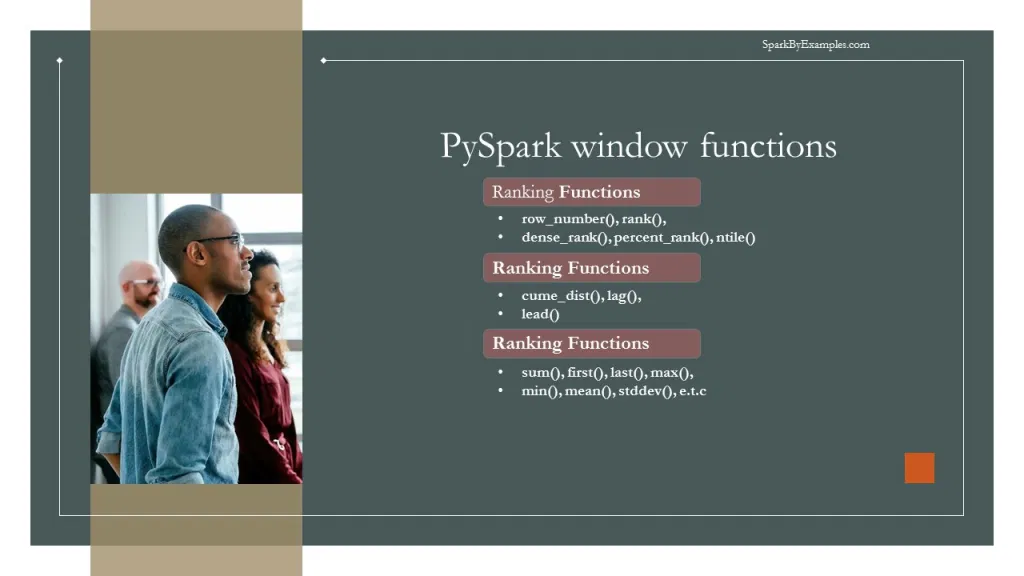
* To perform an operation on a group first, we need to partition the data using Window.partitionBy() , and for row number and rank function we need to additionally order by on partition data using orderBy clause.

In [383]:

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = (("James", "Sales", 3000), \
    ("Michael", "Sales", 4600),  \
    ("Robert", "Sales", 4100),   \
    ("Maria", "Finance", 3000),  \
    ("James", "Sales", 3000),    \
    ("Scott", "Finance", 3300),  \
    ("Jen", "Finance", 3900),    \
    ("Jeff", "Marketing", 3000), \
    ("Kumar", "Marketing", 2000),\
    ("Saif", "Sales", 4100) \
  )
 
columns= ["employee_name", "department", "salary"]
df = spark.createDataFrame(data = simpleData, schema = columns)
df.printSchema()
df.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+



# PySpark Window Ranking functions
## row_number Window Function
row_number() window function is used to give the sequential row number starting from 1 to the result of each window partition.

In [384]:

from pyspark.sql.window import Window
from pyspark.sql.functions import row_number
windowSpec  = Window.partitionBy("department").orderBy("salary")

df.withColumn("row_number",row_number().over(windowSpec)) \
    .show(truncate=False)


+-------------+----------+------+----------+
|employee_name|department|salary|row_number|
+-------------+----------+------+----------+
|Maria        |Finance   |3000  |1         |
|Scott        |Finance   |3300  |2         |
|Jen          |Finance   |3900  |3         |
|Kumar        |Marketing |2000  |1         |
|Jeff         |Marketing |3000  |2         |
|James        |Sales     |3000  |1         |
|James        |Sales     |3000  |2         |
|Robert       |Sales     |4100  |3         |
|Saif         |Sales     |4100  |4         |
|Michael      |Sales     |4600  |5         |
+-------------+----------+------+----------+



# rank Window Function
rank() window function is used to provide a rank to the result within a window partition. This function leaves gaps in rank when there are ties.

In [385]:

"""rank"""
from pyspark.sql.functions import rank
df.withColumn("rank",rank().over(windowSpec)) \
    .show()


+-------------+----------+------+----+
|employee_name|department|salary|rank|
+-------------+----------+------+----+
|        Maria|   Finance|  3000|   1|
|        Scott|   Finance|  3300|   2|
|          Jen|   Finance|  3900|   3|
|        Kumar| Marketing|  2000|   1|
|         Jeff| Marketing|  3000|   2|
|        James|     Sales|  3000|   1|
|        James|     Sales|  3000|   1|
|       Robert|     Sales|  4100|   3|
|         Saif|     Sales|  4100|   3|
|      Michael|     Sales|  4600|   5|
+-------------+----------+------+----+



# dense_rank Window Function
dense_rank() window function is used to get the result with rank of rows within a window partition without any gaps. This is similar to rank() function difference being rank function leaves gaps in rank when there are ties.

In [386]:

"""dens_rank"""
from pyspark.sql.functions import dense_rank
df.withColumn("dense_rank",dense_rank().over(windowSpec)) \
    .show()


+-------------+----------+------+----------+
|employee_name|department|salary|dense_rank|
+-------------+----------+------+----------+
|        Maria|   Finance|  3000|         1|
|        Scott|   Finance|  3300|         2|
|          Jen|   Finance|  3900|         3|
|        Kumar| Marketing|  2000|         1|
|         Jeff| Marketing|  3000|         2|
|        James|     Sales|  3000|         1|
|        James|     Sales|  3000|         1|
|       Robert|     Sales|  4100|         2|
|         Saif|     Sales|  4100|         2|
|      Michael|     Sales|  4600|         3|
+-------------+----------+------+----------+



# percent_rank Window Function

In [387]:

""" percent_rank """
from pyspark.sql.functions import percent_rank
df.withColumn("percent_rank",percent_rank().over(windowSpec)) \
    .show()


+-------------+----------+------+------------+
|employee_name|department|salary|percent_rank|
+-------------+----------+------+------------+
|        Maria|   Finance|  3000|         0.0|
|        Scott|   Finance|  3300|         0.5|
|          Jen|   Finance|  3900|         1.0|
|        Kumar| Marketing|  2000|         0.0|
|         Jeff| Marketing|  3000|         1.0|
|        James|     Sales|  3000|         0.0|
|        James|     Sales|  3000|         0.0|
|       Robert|     Sales|  4100|         0.5|
|         Saif|     Sales|  4100|         0.5|
|      Michael|     Sales|  4600|         1.0|
+-------------+----------+------+------------+



# ntile Window Function
ntile() window function returns the relative rank of result rows within a window partition. In below example we have used 2 as an argument to ntile hence it returns ranking between 2 values (1 and 2)

In [388]:

"""ntile"""
from pyspark.sql.functions import ntile
df.withColumn("ntile",ntile(2).over(windowSpec)) \
    .show()


+-------------+----------+------+-----+
|employee_name|department|salary|ntile|
+-------------+----------+------+-----+
|        Maria|   Finance|  3000|    1|
|        Scott|   Finance|  3300|    1|
|          Jen|   Finance|  3900|    2|
|        Kumar| Marketing|  2000|    1|
|         Jeff| Marketing|  3000|    2|
|        James|     Sales|  3000|    1|
|        James|     Sales|  3000|    1|
|       Robert|     Sales|  4100|    1|
|         Saif|     Sales|  4100|    2|
|      Michael|     Sales|  4600|    2|
+-------------+----------+------+-----+



# PySpark Window Analytic functions
### 3.1 cume_dist Window Function
cume_dist() window function is used to get the cumulative distribution of values within a window partition.

This is the same as the DENSE_RANK function in SQL.

In [389]:

""" cume_dist """
from pyspark.sql.functions import cume_dist    
df.withColumn("cume_dist",cume_dist().over(windowSpec)) \
   .show()


+-------------+----------+------+------------------+
|employee_name|department|salary|         cume_dist|
+-------------+----------+------+------------------+
|        Maria|   Finance|  3000|0.3333333333333333|
|        Scott|   Finance|  3300|0.6666666666666666|
|          Jen|   Finance|  3900|               1.0|
|        Kumar| Marketing|  2000|               0.5|
|         Jeff| Marketing|  3000|               1.0|
|        James|     Sales|  3000|               0.4|
|        James|     Sales|  3000|               0.4|
|       Robert|     Sales|  4100|               0.8|
|         Saif|     Sales|  4100|               0.8|
|      Michael|     Sales|  4600|               1.0|
+-------------+----------+------+------------------+



# lag Window Function
This is the same as the LAG function in SQL.

In [390]:

"""lag"""
from pyspark.sql.functions import lag    
df.withColumn("lag",lag("salary",2).over(windowSpec)) \
      .show()


+-------------+----------+------+----+
|employee_name|department|salary| lag|
+-------------+----------+------+----+
|        Maria|   Finance|  3000|null|
|        Scott|   Finance|  3300|null|
|          Jen|   Finance|  3900|3000|
|        Kumar| Marketing|  2000|null|
|         Jeff| Marketing|  3000|null|
|        James|     Sales|  3000|null|
|        James|     Sales|  3000|null|
|       Robert|     Sales|  4100|3000|
|         Saif|     Sales|  4100|3000|
|      Michael|     Sales|  4600|4100|
+-------------+----------+------+----+



# lead Window Function
This is the same as the LEAD function in SQL.

In [391]:

 """lead"""
from pyspark.sql.functions import lead    
df.withColumn("lead",lead("salary",2).over(windowSpec)) \
    .show()


+-------------+----------+------+----+
|employee_name|department|salary|lead|
+-------------+----------+------+----+
|        Maria|   Finance|  3000|3900|
|        Scott|   Finance|  3300|null|
|          Jen|   Finance|  3900|null|
|        Kumar| Marketing|  2000|null|
|         Jeff| Marketing|  3000|null|
|        James|     Sales|  3000|4100|
|        James|     Sales|  3000|4100|
|       Robert|     Sales|  4100|4600|
|         Saif|     Sales|  4100|null|
|      Michael|     Sales|  4600|null|
+-------------+----------+------+----+



# PySpark Window Aggregate Functions
In this section, I will explain how to calculate sum, min, max for each department using PySpark SQL Aggregate window functions and WindowSpec. When working with Aggregate functions, we don’t need to use order by clause.

In [392]:

windowSpecAgg  = Window.partitionBy("department")
from pyspark.sql.functions import col,avg,sum,min,max,row_number 
df.withColumn("row",row_number().over(windowSpec)) \
  .withColumn("avg", avg(col("salary")).over(windowSpecAgg)) \
  .withColumn("sum", sum(col("salary")).over(windowSpecAgg)) \
  .withColumn("min", min(col("salary")).over(windowSpecAgg)) \
  .withColumn("max", max(col("salary")).over(windowSpecAgg)) \
  .where(col("row")==1).select("department","avg","sum","min","max") \
  .show()


+----------+------+-----+----+----+
|department|   avg|  sum| min| max|
+----------+------+-----+----+----+
|   Finance|3400.0|10200|3000|3900|
| Marketing|2500.0| 5000|2000|3000|
|     Sales|3760.0|18800|3000|4600|
+----------+------+-----+----+----+



# Complete Source Code of Window Functions Example

In [393]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = (("James", "Sales", 3000), \
    ("Michael", "Sales", 4600),  \
    ("Robert", "Sales", 4100),   \
    ("Maria", "Finance", 3000),  \
    ("James", "Sales", 3000),    \
    ("Scott", "Finance", 3300),  \
    ("Jen", "Finance", 3900),    \
    ("Jeff", "Marketing", 3000), \
    ("Kumar", "Marketing", 2000),\
    ("Saif", "Sales", 4100) \
  )
 
columns= ["employee_name", "department", "salary"]

df = spark.createDataFrame(data = simpleData, schema = columns)

df.printSchema()
df.show(truncate=False)

from pyspark.sql.window import Window
from pyspark.sql.functions import row_number
windowSpec  = Window.partitionBy("department").orderBy("salary")

df.withColumn("row_number",row_number().over(windowSpec)) \
    .show(truncate=False)

from pyspark.sql.functions import rank
df.withColumn("rank",rank().over(windowSpec)) \
    .show()

from pyspark.sql.functions import dense_rank
df.withColumn("dense_rank",dense_rank().over(windowSpec)) \
    .show()

from pyspark.sql.functions import percent_rank
df.withColumn("percent_rank",percent_rank().over(windowSpec)) \
    .show()
    
from pyspark.sql.functions import ntile
df.withColumn("ntile",ntile(2).over(windowSpec)) \
    .show()

from pyspark.sql.functions import cume_dist    
df.withColumn("cume_dist",cume_dist().over(windowSpec)) \
   .show()

from pyspark.sql.functions import lag    
df.withColumn("lag",lag("salary",2).over(windowSpec)) \
      .show()

from pyspark.sql.functions import lead    
df.withColumn("lead",lead("salary",2).over(windowSpec)) \
    .show()
    
windowSpecAgg  = Window.partitionBy("department")
from pyspark.sql.functions import col,avg,sum,min,max,row_number 
df.withColumn("row",row_number().over(windowSpec)) \
  .withColumn("avg", avg(col("salary")).over(windowSpecAgg)) \
  .withColumn("sum", sum(col("salary")).over(windowSpecAgg)) \
  .withColumn("min", min(col("salary")).over(windowSpecAgg)) \
  .withColumn("max", max(col("salary")).over(windowSpecAgg)) \
  .where(col("row")==1).select("department","avg","sum","min","max") \
  .show()


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+

+-------------+----------+------+----------+
|employee_name|department|salary|row_number|
+-------------+----------+------+----------+
|Maria        |Finance   |3000  |1         |
|Scott        |Finance   |3300  |2         |
|Jen          |Finance   |3900  |3         |
|Kumar        |Marketing |2000  |1         |
|Jeff         |Marketing |3000  |2         |
|James        |Sales     |3000  |1

# ========================================================
# PySpark SQL Date and Timestamp Functions
PySpark Date and Timestamp Functions are supported on DataFrame and SQL queries and they work similarly to traditional SQL, Date and Time are very important if you are using PySpark for ETL. Most of all these functions accept input as, Date type, Timestamp type, or String. If a String used, it should be in a default format that can be cast to date.

DateType default format is yyyy-MM-dd 
TimestampType default format is yyyy-MM-dd HH:mm:ss.SSSS
Returns null if the input is a string that can not be cast to Date or Timestamp.
PySpark SQL provides several Date & Timestamp functions hence keep an eye on and understand these. Always you should choose these functions instead of writing your own functions (UDF) as these functions are compile-time safe, handles null, and perform better when compared to PySpark UDF. If your PySpark application is critical on performance try to avoid using custom UDF at all costs as these are not guarantee performance.

For readable purposes, I’ve grouped these functions into the following groups.

Date Functions
Timestamp Functions
Date and Timestamp Window Functions

In [394]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import *

# Create SparkSession
spark = SparkSession.builder \
            .appName('SparkByExamples.com') \
            .getOrCreate()
data=[["1","2020-02-01"],["2","2019-03-01"],["3","2021-03-01"]]
df=spark.createDataFrame(data,["id","input"])
df.show()

# #Result
# +---+----------+
# | id|input     |
# +---+----------+
# |  1|2020-02-01|
# |  2|2019-03-01|
# |  3|2021-03-01|
# +---+----------+


+---+----------+
| id|     input|
+---+----------+
|  1|2020-02-01|
|  2|2019-03-01|
|  3|2021-03-01|
+---+----------+



# current_date()
Use current_date() to get the current system date. By default, the data will be returned in yyyy-dd-mm format.

In [395]:

#current_date()
df.select(current_date().alias("current_date")
  ).show(1)

# #Result
# +------------+
# |current_date|
# +------------+
# |  2021-02-22|
# +------------+


+------------+
|current_date|
+------------+
|  2022-01-21|
+------------+
only showing top 1 row



# date_format()
The below example uses date_format() to parses the date and converts from yyyy-dd-mm to MM-dd-yyyy format.

In [396]:

#date_format()
df.select(col("input"), 
    date_format(col("input"), "MM-dd-yyyy").alias("date_format") 
  ).show()

# #Result
# +----------+-----------+
# |input     |date_format|
# +----------+-----------+
# |2020-02-01| 02-01-2020|
# |2019-03-01| 03-01-2019|
# |2021-03-01| 03-01-2021|
# +----------+-----------+


+----------+-----------+
|     input|date_format|
+----------+-----------+
|2020-02-01| 02-01-2020|
|2019-03-01| 03-01-2019|
|2021-03-01| 03-01-2021|
+----------+-----------+



# to_date()
Below example converts string in date format yyyy-MM-dd to a DateType yyyy-MM-dd using to_date(). You can also use this to convert into any specific format. PySpark supports all patterns supports on Java DateTimeFormatter.

In [397]:

#to_date()
df.select(col("input"), 
    to_date(col("input"), "yyy-MM-dd").alias("to_date") 
  ).show()

# #Result
# +----------+----------+
# |     input|   to_date|
# +----------+----------+
# |2020-02-01|2020-02-01|
# |2019-03-01|2019-03-01|
# |2021-03-01|2021-03-01|
# +----------+----------+


+----------+----------+
|     input|   to_date|
+----------+----------+
|2020-02-01|2020-02-01|
|2019-03-01|2019-03-01|
|2021-03-01|2021-03-01|
+----------+----------+



# datediff()
The below example returns the difference between two dates using datediff()

In [398]:

#datediff()
df.select(col("input"), 
    datediff(current_date(),col("input")).alias("datediff")  
  ).show()

# #Result
# +----------+--------+
# |     input|datediff|
# +----------+--------+
# |2020-02-01|     387|
# |2019-03-01|     724|
# |2021-03-01|      -7|
# +----------+--------+


+----------+--------+
|     input|datediff|
+----------+--------+
|2020-02-01|     720|
|2019-03-01|    1057|
|2021-03-01|     326|
+----------+--------+



# months_between()
The below example returns the months between two dates using months_between().

In [399]:

#months_between()
df.select(col("input"), 
    months_between(current_date(),col("input")).alias("months_between")  
  ).show()

# #Result
# +----------+--------------+
# |     input|months_between|
# +----------+--------------+
# |2020-02-01|   12.67741935|
# |2019-03-01|   23.67741935|
# |2021-03-01|   -0.32258065|
# +----------+--------------+


+----------+--------------+
|     input|months_between|
+----------+--------------+
|2020-02-01|   23.64516129|
|2019-03-01|   34.64516129|
|2021-03-01|   10.64516129|
+----------+--------------+



# trunc()
The below example truncates the date at a specified unit using trunc().



In [400]:

#trunc()
df.select(col("input"), 
    trunc(col("input"),"Month").alias("Month_Trunc"), 
    trunc(col("input"),"Year").alias("Month_Year"), 
    trunc(col("input"),"Month").alias("Month_Trunc")
   ).show()

# #Result
# +----------+-----------+----------+-----------+
# |     input|Month_Trunc|Month_Year|Month_Trunc|
# +----------+-----------+----------+-----------+
# |2020-02-01| 2020-02-01|2020-01-01| 2020-02-01|
# |2019-03-01| 2019-03-01|2019-01-01| 2019-03-01|
# |2021-03-01| 2021-03-01|2021-01-01| 2021-03-01|
# +----------+-----------+----------+-----------+


+----------+-----------+----------+-----------+
|     input|Month_Trunc|Month_Year|Month_Trunc|
+----------+-----------+----------+-----------+
|2020-02-01| 2020-02-01|2020-01-01| 2020-02-01|
|2019-03-01| 2019-03-01|2019-01-01| 2019-03-01|
|2021-03-01| 2021-03-01|2021-01-01| 2021-03-01|
+----------+-----------+----------+-----------+



# add_months() , date_add(), date_sub()
Here we are adding and subtracting date and month from a given input.

In [401]:

#add_months() , date_add(), date_sub()
df.select(col("input"), 
    add_months(col("input"),3).alias("add_months"), 
    add_months(col("input"),-3).alias("sub_months"), 
    date_add(col("input"),4).alias("date_add"), 
    date_sub(col("input"),4).alias("date_sub") 
  ).show()

# #Result
# +----------+----------+----------+----------+----------+
# |     input|add_months|sub_months|  date_add|  date_sub|
# +----------+----------+----------+----------+----------+
# |2020-02-01|2020-05-01|2019-11-01|2020-02-05|2020-01-28|
# |2019-03-01|2019-06-01|2018-12-01|2019-03-05|2019-02-25|
# |2021-03-01|2021-06-01|2020-12-01|2021-03-05|2021-02-25|
# +----------+----------+----------+----------+----------+


+----------+----------+----------+----------+----------+
|     input|add_months|sub_months|  date_add|  date_sub|
+----------+----------+----------+----------+----------+
|2020-02-01|2020-05-01|2019-11-01|2020-02-05|2020-01-28|
|2019-03-01|2019-06-01|2018-12-01|2019-03-05|2019-02-25|
|2021-03-01|2021-06-01|2020-12-01|2021-03-05|2021-02-25|
+----------+----------+----------+----------+----------+



# year(), month(), month(),next_day(), weekofyear()


In [402]:

df.select(col("input"), 
     year(col("input")).alias("year"), 
     month(col("input")).alias("month"), 
     next_day(col("input"),"Sunday").alias("next_day"), 
     weekofyear(col("input")).alias("weekofyear") 
  ).show()

# #Result
# +----------+----+-----+----------+----------+
# |     input|year|month|  next_day|weekofyear|
# +----------+----+-----+----------+----------+
# |2020-02-01|2020|    2|2020-02-02|         5|
# |2019-03-01|2019|    3|2019-03-03|         9|
# |2021-03-01|2021|    3|2021-03-07|         9|
# +----------+----+-----+----------+----------+


+----------+----+-----+----------+----------+
|     input|year|month|  next_day|weekofyear|
+----------+----+-----+----------+----------+
|2020-02-01|2020|    2|2020-02-02|         5|
|2019-03-01|2019|    3|2019-03-03|         9|
|2021-03-01|2021|    3|2021-03-07|         9|
+----------+----+-----+----------+----------+



# dayofweek(), dayofmonth(), dayofyear()

In [403]:

df.select(col("input"),  
     dayofweek(col("input")).alias("dayofweek"), 
     dayofmonth(col("input")).alias("dayofmonth"), 
     dayofyear(col("input")).alias("dayofyear"), 
  ).show()

# #Result
# +----------+---------+----------+---------+
# |     input|dayofweek|dayofmonth|dayofyear|
# +----------+---------+----------+---------+
# |2020-02-01|        7|         1|       32|
# |2019-03-01|        6|         1|       60|
# |2021-03-01|        2|         1|       60|
# +----------+---------+----------+---------+


+----------+---------+----------+---------+
|     input|dayofweek|dayofmonth|dayofyear|
+----------+---------+----------+---------+
|2020-02-01|        7|         1|       32|
|2019-03-01|        6|         1|       60|
|2021-03-01|        2|         1|       60|
+----------+---------+----------+---------+



# current_timestamp()
Following are the Timestamp Functions that you can use on SQL and on DataFrame. Let’s learn these with examples.

Let’s create a test data.

In [404]:

data=[["1","02-01-2020 11 01 19 06"],["2","03-01-2019 12 01 19 406"],["3","03-01-2021 12 01 19 406"]]
df2=spark.createDataFrame(data,["id","input"])
df2.show(truncate=False)

# #Result
# +---+-----------------------+
# |id |input                  |
# +---+-----------------------+
# |1  |02-01-2020 11 01 19 06 |
# |2  |03-01-2019 12 01 19 406|
# |3  |03-01-2021 12 01 19 406|
# +---+-----------------------+


+---+-----------------------+
|id |input                  |
+---+-----------------------+
|1  |02-01-2020 11 01 19 06 |
|2  |03-01-2019 12 01 19 406|
|3  |03-01-2021 12 01 19 406|
+---+-----------------------+



# to_timestamp()
Converts string timestamp to Timestamp type format.



In [408]:

#to_timestamp()
df2.select(col("input"), 
    to_timestamp(col("input"), "MM-dd-yyyy HH mm ss SSS").alias("to_timestamp") 
  ).show(truncate=False)

# #Result
# +-----------------------+-----------------------+
# |input                  |to_timestamp           |
# +-----------------------+-----------------------+
# |02-01-2020 11 01 19 06 |2020-02-01 11:01:19.06 |
# |03-01-2019 12 01 19 406|2019-03-01 12:01:19.406|
# |03-01-2021 12 01 19 406|2021-03-01 12:01:19.406|
# +-----------------------+-----------------------+


+-----------------------+-----------------------+
|input                  |to_timestamp           |
+-----------------------+-----------------------+
|02-01-2020 11 01 19 06 |2020-02-01 11:01:19.06 |
|03-01-2019 12 01 19 406|2019-03-01 12:01:19.406|
|03-01-2021 12 01 19 406|2021-03-01 12:01:19.406|
+-----------------------+-----------------------+



# hour(), Minute() and second()

In [409]:

#hour, minute,second
data=[["1","2020-02-01 11:01:19.06"],["2","2019-03-01 12:01:19.406"],["3","2021-03-01 12:01:19.406"]]
df3=spark.createDataFrame(data,["id","input"])

df3.select(col("input"), 
    hour(col("input")).alias("hour"), 
    minute(col("input")).alias("minute"),
    second(col("input")).alias("second") 
  ).show(truncate=False)

# #Result
# +-----------------------+----+------+------+
# |input                  |hour|minute|second|
# +-----------------------+----+------+------+
# |2020-02-01 11:01:19.06 |11  |1     |19    |
# |2019-03-01 12:01:19.406|12  |1     |19    |
# |2021-03-01 12:01:19.406|12  |1     |19    |
# +-----------------------+----+------+------+


+-----------------------+----+------+------+
|input                  |hour|minute|second|
+-----------------------+----+------+------+
|2020-02-01 11:01:19.06 |11  |1     |19    |
|2019-03-01 12:01:19.406|12  |1     |19    |
|2021-03-01 12:01:19.406|12  |1     |19    |
+-----------------------+----+------+------+



# ========================================================
# PySpark JSON Functions with Examples

PySpark JSON functions are used to query or extract the elements from JSON string of DataFrame column by path, convert it to struct, mapt type e.t.c, In this article, I will explain the most used JSON SQL functions with Python examples.

# 1. PySpark JSON Functions
from_json() – Converts JSON string into Struct type or Map type.

to_json() – Converts MapType or Struct type to JSON string.

json_tuple() – Extract the Data from JSON and create them as a new columns.

get_json_object() – Extracts JSON element from a JSON string based on json path specified.

schema_of_json() – Create schema string from JSON string

In [410]:

from pyspark.sql import SparkSession,Row
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

jsonString="""{"Zipcode":704,"ZipCodeType":"STANDARD","City":"PARC PARQUE","State":"PR"}"""
df=spark.createDataFrame([(1, jsonString)],["id","value"])
df.show(truncate=False)

# //+---+--------------------------------------------------------------------------+
# //|id |value                                                                     |
# //+---+--------------------------------------------------------------------------+
# //|1  |{"Zipcode":704,"ZipCodeType":"STANDARD","City":"PARC PARQUE","State":"PR"}|
# //+---+--------------------------------------------------------------------------+


+---+--------------------------------------------------------------------------+
|id |value                                                                     |
+---+--------------------------------------------------------------------------+
|1  |{"Zipcode":704,"ZipCodeType":"STANDARD","City":"PARC PARQUE","State":"PR"}|
+---+--------------------------------------------------------------------------+



# PySpark JSON Functions Examples
## 2.1. from_json()
PySpark from_json() function is used to convert JSON string into Struct type or Map type. The below example converts JSON string to Map key-value pair. I will leave it to you to convert to struct type. Refer, Convert JSON string to Struct type column.

In [411]:

#Convert JSON string column to Map type
from pyspark.sql.types import MapType,StringType
from pyspark.sql.functions import from_json
df2=df.withColumn("value",from_json(df.value,MapType(StringType(),StringType())))
df2.printSchema()
df2.show(truncate=False)

# //root
# // |-- id: integer (nullable = false)
# // |-- value: map (nullable = true)
# // |    |-- key: string
# // |    |-- value: string (valueContainsNull = true)

# //+---+---------------------------------------------------------------------------+
# //|id |value                                                                      |
# //+---+---------------------------------------------------------------------------+
# //|1  |[Zipcode -> 704, ZipCodeType -> STANDARD, City -> PARC PARQUE, State -> PR]|
# //+---+---------------------------------------------------------------------------+


root
 |-- id: long (nullable = true)
 |-- value: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)

+---+---------------------------------------------------------------------------+
|id |value                                                                      |
+---+---------------------------------------------------------------------------+
|1  |[Zipcode -> 704, ZipCodeType -> STANDARD, City -> PARC PARQUE, State -> PR]|
+---+---------------------------------------------------------------------------+



# to_json()
to_json() function is used to convert DataFrame columns MapType or Struct type to JSON string. Here, I am using df2 that created from above from_json() example.

In [412]:

from pyspark.sql.functions import to_json,col
df2.withColumn("value",to_json(col("value"))) \
   .show(truncate=False)

# //+---+----------------------------------------------------------------------------+
# //|id |value                                                                       |
# //+---+----------------------------------------------------------------------------+
# //|1  |{"Zipcode":"704","ZipCodeType":"STANDARD","City":"PARC PARQUE","State":"PR"}|
# //+---+----------------------------------------------------------------------------+


+---+----------------------------------------------------------------------------+
|id |value                                                                       |
+---+----------------------------------------------------------------------------+
|1  |{"Zipcode":"704","ZipCodeType":"STANDARD","City":"PARC PARQUE","State":"PR"}|
+---+----------------------------------------------------------------------------+



# json_tuple()
Function json_tuple() is used the query or extract the elements from JSON column and create the result as a new columns.

In [413]:

from pyspark.sql.functions import json_tuple
df.select(col("id"),json_tuple(col("value"),"Zipcode","ZipCodeType","City")) \
    .toDF("id","Zipcode","ZipCodeType","City") \
    .show(truncate=False)

# //+---+-------+-----------+-----------+
# //|id |Zipcode|ZipCodeType|City       |
# //+---+-------+-----------+-----------+
# //|1  |704    |STANDARD   |PARC PARQUE|
# //+---+-------+-----------+-----------+


+---+-------+-----------+-----------+
|id |Zipcode|ZipCodeType|City       |
+---+-------+-----------+-----------+
|1  |704    |STANDARD   |PARC PARQUE|
+---+-------+-----------+-----------+



# get_json_object()
get_json_object() is used to extract the JSON string based on path from the JSON column.

In [414]:

from pyspark.sql.functions import get_json_object
df.select(col("id"),get_json_object(col("value"),"$.ZipCodeType").alias("ZipCodeType")) \
    .show(truncate=False)

# //+---+-----------+
# //|id |ZipCodeType|
# //+---+-----------+
# //|1  |STANDARD   |
# //+---+-----------+


+---+-----------+
|id |ZipCodeType|
+---+-----------+
|1  |STANDARD   |
+---+-----------+



# schema_of_json()
Use schema_of_json() to create schema string from JSON string column.

In [415]:

from pyspark.sql.functions import schema_of_json,lit
schemaStr=spark.range(1) \
    .select(schema_of_json(lit("""{"Zipcode":704,"ZipCodeType":"STANDARD","City":"PARC PARQUE","State":"PR"}"""))) \
    .collect()[0][0]
print(schemaStr)

# //struct<City:string,State:string,ZipCodeType:string,Zipcode:bigint>


struct<City:string,State:string,ZipCodeType:string,Zipcode:bigint>


# Complete Example of PySpark JSON Functions

In [416]:

from pyspark.sql import SparkSession,Row
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

jsonString="""{"Zipcode":704,"ZipCodeType":"STANDARD","City":"PARC PARQUE","State":"PR"}"""
df=spark.createDataFrame([(1, jsonString)],["id","value"])
df.show(truncate=False)

#Convert JSON string column to Map type
from pyspark.sql.types import MapType,StringType
from pyspark.sql.functions import from_json
df2=df.withColumn("value",from_json(df.value,MapType(StringType(),StringType())))
df2.printSchema()
df2.show(truncate=False)

from pyspark.sql.functions import to_json,col
df2.withColumn("value",to_json(col("value"))) \
   .show(truncate=False)

from pyspark.sql.functions import json_tuple
df.select(col("id"),json_tuple(col("value"),"Zipcode","ZipCodeType","City")) \
    .toDF("id","Zipcode","ZipCodeType","City") \
    .show(truncate=False)

from pyspark.sql.functions import get_json_object
df.select(col("id"),get_json_object(col("value"),"$.ZipCodeType").alias("ZipCodeType")) \
    .show(truncate=False)

from pyspark.sql.functions import schema_of_json,lit
schemaStr=spark.range(1) \
    .select(schema_of_json(lit("""{"Zipcode":704,"ZipCodeType":"STANDARD","City":"PARC PARQUE","State":"PR"}"""))) \
    .collect()[0][0]
print(schemaStr)


+---+--------------------------------------------------------------------------+
|id |value                                                                     |
+---+--------------------------------------------------------------------------+
|1  |{"Zipcode":704,"ZipCodeType":"STANDARD","City":"PARC PARQUE","State":"PR"}|
+---+--------------------------------------------------------------------------+

root
 |-- id: long (nullable = true)
 |-- value: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)

+---+---------------------------------------------------------------------------+
|id |value                                                                      |
+---+---------------------------------------------------------------------------+
|1  |[Zipcode -> 704, ZipCodeType -> STANDARD, City -> PARC PARQUE, State -> PR]|
+---+---------------------------------------------------------------------------+

+---+---------------------------------

# ==================================================
# PySpark When Otherwise | SQL Case When Usage

PySpark When Otherwise and SQL Case When on DataFrame with Examples – Similar to SQL and programming languages, PySpark supports a way to check multiple conditions in sequence and returns a value when the first condition met by using SQL like case when and when().otherwise() expressions, these works similar to `“Switch"` and `"if then else"` statements.

PySpark When Otherwise – `when()` is a SQL function that returns a `Column` type and otherwise() is a function of Column, if otherwise() is not used, it returns a None/NULL value.

PySpark SQL Case When – This is similar to SQL expression, Usage: `CASE WHEN cond1 THEN result WHEN cond2 THEN result... ELSE result END`.

In [7]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
data = [("James","M",60000),("Michael","M",70000),
        ("Robert",None,400000),("Maria","F",500000),
        ("Jen","",None)]

columns = ["name","gender","salary"]
df = spark.createDataFrame(data = data, schema = columns)
df.show()
# +-------+------+------+
# |   name|gender|salary|
# +-------+------+------+
# |  James|     M| 60000|
# |Michael|     M| 70000|
# | Robert|  null|400000|
# |  Maria|     F|500000|
# |    Jen|      |  null|
# +-------+------+------+


+-------+------+------+
|   name|gender|salary|
+-------+------+------+
|  James|     M| 60000|
|Michael|     M| 70000|
| Robert|  null|400000|
|  Maria|     F|500000|
|    Jen|      |  null|
+-------+------+------+



# Using when() otherwise() on PySpark DataFrame.
PySpark `when()` is SQL function, in order to use this first you should import and this returns a Column type, `otherwise()` is a function of `Column`, when otherwise() not used and none of the conditions met it assigns None (Null) value. Usage would be like `when(condition).otherwise(default)`.

when() function take 2 parameters, first param takes a condition and second takes a literal value or Column, if condition evaluates to true then it returns a value from second param.

In [8]:

from pyspark.sql.functions import when
df2 = df.withColumn("new_gender", when(df.gender == "M","Male")
                                 .when(df.gender == "F","Female")
                                 .when(df.gender.isNull() ,"")
                                 .otherwise(df.gender))
df2.show()
# +-------+------+------+----------+
# |   name|gender|salary|new_gender|
# +-------+------+------+----------+
# |  James|     M| 60000|      Male|
# |Michael|     M| 70000|      Male|
# | Robert|  null|400000|          |
# |  Maria|     F|500000|    Female|
# |    Jen|      |  null|          |
# +-------+------+------+----------+


+-------+------+------+----------+
|   name|gender|salary|new_gender|
+-------+------+------+----------+
|  James|     M| 60000|      Male|
|Michael|     M| 70000|      Male|
| Robert|  null|400000|          |
|  Maria|     F|500000|    Female|
|    Jen|      |  null|          |
+-------+------+------+----------+



In [11]:

df2=df.select(when(df.gender == "M","Male")
                  .when(df.gender == "F","Female")
                  .when(df.gender.isNull() ,"")
                  .otherwise(df.gender).alias("new_gender"))
df2.show()

+----------+
|new_gender|
+----------+
|      Male|
|      Male|
|          |
|    Female|
|          |
+----------+



Using with select(), same output as above

* `CASE` is the start of the expression
* Clause`WHEN` takes a condition, if condition true it returns a value from `THEN`
* If the condition is false it goes to the next condition and so on.
* If none of the condition matches, it returns a value from the `ELSE` clause.
* `END` is to end the expression

# Using Case When Else on DataFrame using withColumn() & select()

In [13]:

from pyspark.sql.functions import expr, col

#Using Case When on withColumn()
df3 = df.withColumn("new_gender", expr("CASE WHEN gender = 'M' THEN 'Male' " + 
               "WHEN gender = 'F' THEN 'Female' WHEN gender IS NULL THEN ''" +
               "ELSE gender END"))
df3.show(truncate=False)
# +-------+------+------+----------+
# |name   |gender|salary|new_gender|
# +-------+------+------+----------+
# |James  |M     |60000 |Male      |
# |Michael|M     |70000 |Male      |
# |Robert |null  |400000|          |
# |Maria  |F     |500000|Female    |
# |Jen    |      |null  |          |
# +-------+------+------+----------+

#Using Case When on select()
df4 = df.select(expr("CASE WHEN gender = 'M' THEN 'Male' " +
           "WHEN gender = 'F' THEN 'Female' WHEN gender IS NULL THEN ''" +
           "ELSE gender END").alias("new_gender"))
df4.show(truncate=False)

+-------+------+------+----------+
|name   |gender|salary|new_gender|
+-------+------+------+----------+
|James  |M     |60000 |Male      |
|Michael|M     |70000 |Male      |
|Robert |null  |400000|          |
|Maria  |F     |500000|Female    |
|Jen    |      |null  |          |
+-------+------+------+----------+

+----------+
|new_gender|
+----------+
|Male      |
|Male      |
|          |
|Female    |
|          |
+----------+



# Using Case When on SQL Expression

In [14]:

df.createOrReplaceTempView("EMP")
spark.sql("select name, CASE WHEN gender = 'M' THEN 'Male' " + 
               "WHEN gender = 'F' THEN 'Female' WHEN gender IS NULL THEN ''" +
              "ELSE gender END as new_gender from EMP").show()


+-------+----------+
|   name|new_gender|
+-------+----------+
|  James|      Male|
|Michael|      Male|
| Robert|          |
|  Maria|    Female|
|    Jen|          |
+-------+----------+



# Complete Example – PySpark When Otherwise | SQL Case When
* how to use Pyspark SQL `“case when”` and `“when otherwise”` on Dataframe by leveraging example like checking with NUll/None, applying with multiple conditions using AND (&), OR (|) logical operators.

In [17]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
data = [("James","M",60000), ("Michael","M",70000),
        ("Robert",None,400000), ("Maria","F",500000),
        ("Jen","",None)]

columns = ["name","gender","salary"]
df = spark.createDataFrame(data = data, schema = columns)
df.show()

#Using When otherwise
from pyspark.sql.functions import when,col
df2 = df.withColumn("new_gender", when(df.gender == "M","Male")
                                 .when(df.gender == "F","Female")
                                 .when(df.gender.isNull() ,"")
                                 .otherwise(df.gender))
df2.show()

df2=df.select(col("*"),when(df.gender == "M","Male")
                  .when(df.gender == "F","Female")
                  .when(df.gender.isNull() ,"")
                  .otherwise(df.gender).alias("new_gender"))
df2.show()
# Using SQL Case When
from pyspark.sql.functions import expr
df3 = df.withColumn("new_gender", expr("CASE WHEN gender = 'M' THEN 'Male' " + 
           "WHEN gender = 'F' THEN 'Female' WHEN gender IS NULL THEN ''" +
          "ELSE gender END"))
df3.show()

df4 = df.select(col("*"), expr("CASE WHEN gender = 'M' THEN 'Male' " +
           "WHEN gender = 'F' THEN 'Female' WHEN gender IS NULL THEN ''" +
           "ELSE gender END").alias("new_gender"))

df.createOrReplaceTempView("EMP")
spark.sql("select name, CASE WHEN gender = 'M' THEN 'Male' " + 
               "WHEN gender = 'F' THEN 'Female' WHEN gender IS NULL THEN ''" +
              "ELSE gender END as new_gender from EMP").show()


+-------+------+------+
|   name|gender|salary|
+-------+------+------+
|  James|     M| 60000|
|Michael|     M| 70000|
| Robert|  null|400000|
|  Maria|     F|500000|
|    Jen|      |  null|
+-------+------+------+

+-------+------+------+----------+
|   name|gender|salary|new_gender|
+-------+------+------+----------+
|  James|     M| 60000|      Male|
|Michael|     M| 70000|      Male|
| Robert|  null|400000|          |
|  Maria|     F|500000|    Female|
|    Jen|      |  null|          |
+-------+------+------+----------+

+-------+------+------+----------+
|   name|gender|salary|new_gender|
+-------+------+------+----------+
|  James|     M| 60000|      Male|
|Michael|     M| 70000|      Male|
| Robert|  null|400000|          |
|  Maria|     F|500000|    Female|
|    Jen|      |  null|          |
+-------+------+------+----------+

+-------+------+------+----------+
|   name|gender|salary|new_gender|
+-------+------+------+----------+
|  James|     M| 60000|      Male|
|Michael|  

# =======================================================
# PySpark SQL expr() (Expression ) Function
* PySpark `expr()` is a SQL function to execute SQL-like expressions and to use an existing DataFrame column value as an expression argument to Pyspark built-in functions. Most of the commonly used SQL functions are either part of the PySpark Column class or built-in `pyspark.sql.functions` API, besides these PySpark also supports many other SQL functions, so in order to use these, you have to use `expr()` function.

Below are 2 use cases of PySpark expr() funcion.

First, allowing to use of SQL-like functions that are not present in `PySpark Column` type & `pyspark.sql.functions` API. for example `CASE WHEN`, `regr_count()`.
Second, it extends the PySpark SQL Functions by allowing to use DataFrame columns in functions for expression. for example, if you wanted to add a month value from a column to a Date column. I will explain this in the example below.
#  Concatenate Columns using || (similar to SQL)

In [18]:

#Concatenate columns using || (sql like)
data=[("James","Bond"),("Scott","Varsa")] 
df=spark.createDataFrame(data).toDF("col1","col2") 
df.withColumn("Name",expr(" col1 ||','|| col2")).show()

# +-----+-----+-----------+
# | col1| col2|       Name|
# +-----+-----+-----------+
# |James| Bond| James,Bond|
# |Scott|Varsa|Scott,Varsa|
# +-----+-----+-----------+


+-----+-----+-----------+
| col1| col2|       Name|
+-----+-----+-----------+
|James| Bond| James,Bond|
|Scott|Varsa|Scott,Varsa|
+-----+-----+-----------+



# Using SQL CASE WHEN with expr()
Here, I have used `CASE WHEN` expression on `withColumn()` by using `expr()`, this example updates an existing column gender with the derived values, M for male, F for Female, and unknown for others

In [19]:

from pyspark.sql.functions import expr
data = [("James","M"),("Michael","F"),("Jen","")]
columns = ["name","gender"]
df = spark.createDataFrame(data = data, schema = columns)

#Using CASE WHEN similar to SQL.
from pyspark.sql.functions import expr
df2=df.withColumn("gender", expr("CASE WHEN gender = 'M' THEN 'Male' " +
           "WHEN gender = 'F' THEN 'Female' ELSE 'unknown' END"))
df2.show()
# +-------+-------+
# |   name| gender|
# +-------+-------+
# |  James|   Male|
# |Michael| Female|
# |    Jen|unknown|
# +-------+-------+


+-------+-------+
|   name| gender|
+-------+-------+
|  James|   Male|
|Michael| Female|
|    Jen|unknown|
+-------+-------+



#  Using an Existing Column Value for Expression

In [20]:

from pyspark.sql.functions import expr
data=[("2019-01-23",1),("2019-06-24",2),("2019-09-20",3)] 
df=spark.createDataFrame(data).toDF("date","increment") 

#Add Month value from another column
df.select(df.date,df.increment,
     expr("add_months(date,increment)")
  .alias("inc_date")).show()

# +----------+---------+----------+
# |      date|increment|  inc_date|
# +----------+---------+----------+
# |2019-01-23|        1|2019-02-23|
# |2019-06-24|        2|2019-08-24|
# |2019-09-20|        3|2019-12-20|
# +----------+---------+----------+


+----------+---------+----------+
|      date|increment|  inc_date|
+----------+---------+----------+
|2019-01-23|        1|2019-02-23|
|2019-06-24|        2|2019-08-24|
|2019-09-20|        3|2019-12-20|
+----------+---------+----------+



# Giving Column Alias along with expr()

In [21]:

# Providing alias using 'as'
from pyspark.sql.functions import expr
df.select(df.date,df.increment,
     expr("""add_months(date,increment) as inc_date""")
  ).show()
# This yields same output as above


+----------+---------+----------+
|      date|increment|  inc_date|
+----------+---------+----------+
|2019-01-23|        1|2019-02-23|
|2019-06-24|        2|2019-08-24|
|2019-09-20|        3|2019-12-20|
+----------+---------+----------+



# Case Function with expr()

In [23]:

# Using Cast() Function
df.select("increment",expr("cast(increment as string) as str_increment")) \
  .printSchema()

# root
#  |-- increment: long (nullable = true)
#  |-- str_increment: string (nullable = true)


root
 |-- increment: long (nullable = true)
 |-- str_increment: string (nullable = true)



# Arithmetic operations
expr() is also used to provide arithmetic operations, below examples add value 5 to `increment` and creates a new column `new_increment`

In [24]:

# Arthemetic operations
df.select(df.date,df.increment,
     expr("increment + 5 as new_increment")
  ).show()

# +----------+---------+-------------+
# |      date|increment|new_increment|
# +----------+---------+-------------+
# |2019-01-23|        1|            6|
# |2019-06-24|        2|            7|
# |2019-09-20|        3|            8|
# +----------+---------+-------------+


+----------+---------+-------------+
|      date|increment|new_increment|
+----------+---------+-------------+
|2019-01-23|        1|            6|
|2019-06-24|        2|            7|
|2019-09-20|        3|            8|
+----------+---------+-------------+



# Using Filter with expr()

In [25]:

#Use expr()  to filter the rows
from pyspark.sql.functions import expr
data=[(100,2),(200,3000),(500,500)] 
df=spark.createDataFrame(data).toDF("col1","col2") 
df.filter(expr("col1 == col2")).show()

# +----+----+
# |col1|col2|
# +----+----+
# | 500| 500|
# +----+----+


+----+----+
|col1|col2|
+----+----+
| 500| 500|
+----+----+



# Complete Example of PySpark SQL expr() Function

In [26]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

from pyspark.sql.functions import expr
#Concatenate columns
data=[("James","Bond"),("Scott","Varsa")] 
df=spark.createDataFrame(data).toDF("col1","col2") 
df.withColumn("Name",expr(" col1 ||','|| col2")).show()

#Using CASE WHEN sql expression
data = [("James","M"),("Michael","F"),("Jen","")]
columns = ["name","gender"]
df = spark.createDataFrame(data = data, schema = columns)
df2 = df.withColumn("gender", expr("CASE WHEN gender = 'M' THEN 'Male' " +
           "WHEN gender = 'F' THEN 'Female' ELSE 'unknown' END"))
df2.show()

#Add months from a value of another column
data=[("2019-01-23",1),("2019-06-24",2),("2019-09-20",3)] 
df=spark.createDataFrame(data).toDF("date","increment") 
df.select(df.date,df.increment,
     expr("add_months(date,increment)")
  .alias("inc_date")).show()

# Providing alias using 'as'
df.select(df.date,df.increment,
     expr("""add_months(date,increment) as inc_date""")
  ).show()

# Add
df.select(df.date,df.increment,
     expr("increment + 5 as new_increment")
  ).show()

# Using cast to convert data types
df.select("increment",expr("cast(increment as string) as str_increment")) \
  .printSchema()

#Use expr()  to filter the rows
data=[(100,2),(200,3000),(500,500)] 
df=spark.createDataFrame(data).toDF("col1","col2") 
df.filter(expr("col1 == col2")).show()


+-----+-----+-----------+
| col1| col2|       Name|
+-----+-----+-----------+
|James| Bond| James,Bond|
|Scott|Varsa|Scott,Varsa|
+-----+-----+-----------+

+-------+-------+
|   name| gender|
+-------+-------+
|  James|   Male|
|Michael| Female|
|    Jen|unknown|
+-------+-------+

+----------+---------+----------+
|      date|increment|  inc_date|
+----------+---------+----------+
|2019-01-23|        1|2019-02-23|
|2019-06-24|        2|2019-08-24|
|2019-09-20|        3|2019-12-20|
+----------+---------+----------+

+----------+---------+----------+
|      date|increment|  inc_date|
+----------+---------+----------+
|2019-01-23|        1|2019-02-23|
|2019-06-24|        2|2019-08-24|
|2019-09-20|        3|2019-12-20|
+----------+---------+----------+

+----------+---------+-------------+
|      date|increment|new_increment|
+----------+---------+-------------+
|2019-01-23|        1|            6|
|2019-06-24|        2|            7|
|2019-09-20|        3|            8|
+----------+----

# ====================================================
# PySpark lit() – Add Literal or Constant to DataFrame

PySpark SQL functions lit() and typedLit() are used to add a new column to DataFrame by assigning a literal or constant value. Both these functions return Column type as return type.

Both of these are available in PySpark by importing `pyspark.sql.functions`

In [27]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
data = [("111",50000),("222",60000),("333",40000)]
columns= ["EmpId","Salary"]
df = spark.createDataFrame(data = data, schema = columns)


# lit() Function to Add Constant Column
PySpark lit() function is used to add constant or literal value as a new column to the DataFrame.

Creates a [[Column]] of literal value. The passed in object is returned directly if it is already a [[Column]]. If the object is a Scala Symbol, it is converted into a [[Column]] also. Otherwise, a new [[Column]] is created to represent the literal value
### Simple usage of lit() function

In [28]:

from pyspark.sql.functions import col,lit
df2 = df.select(col("EmpId"),col("Salary"),lit("1").alias("lit_value1"))
df2.show(truncate=False)


+-----+------+----------+
|EmpId|Salary|lit_value1|
+-----+------+----------+
|111  |50000 |1         |
|222  |60000 |1         |
|333  |40000 |1         |
+-----+------+----------+



### typedLit() Function – Syntax
Difference between `lit()` and `typedLit()` is that, typedLit function can `handle collection types` e.g.: Array, Dictionary(map) e.t.c
### Complete Example of How to Add Constant Column

In [32]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
data = [("111",50000),("222",60000),("333",40000)]
columns= ["EmpId","Salary"]
df = spark.createDataFrame(data = data, schema = columns)
df.printSchema()
df.show(truncate=False)

from pyspark.sql.functions import col,lit
df2 = df.select(col("EmpId"),col("Salary"),lit("1").alias("lit_value1"))
df2.show(truncate=False)
from pyspark.sql.functions import when
df3 = df2.withColumn("lit_value2", when(col("Salary") >=40000 & col("Salary") <= 50000,lit("100")).otherwise(lit("200")))
df3.show(truncate=False)


root
 |-- EmpId: string (nullable = true)
 |-- Salary: long (nullable = true)

+-----+------+
|EmpId|Salary|
+-----+------+
|111  |50000 |
|222  |60000 |
|333  |40000 |
+-----+------+

+-----+------+----------+
|EmpId|Salary|lit_value1|
+-----+------+----------+
|111  |50000 |1         |
|222  |60000 |1         |
|333  |40000 |1         |
+-----+------+----------+



Py4JError: An error occurred while calling o470.and. Trace:
py4j.Py4JException: Method and([class java.lang.Integer]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:318)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:326)
	at py4j.Gateway.invoke(Gateway.java:274)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)



# =======================================================
# PySpark Convert String to Array Column

PySpark SQL provides `split()` function to convert delimiter separated String to an Array (`StringType to ArrayType`) column on DataFrame. This can be done by splitting a string column based on a delimiter like space, comma, pipe e.t.c, and converting it into ArrayType.

In [33]:

from pyspark.sql import SparkSession
spark = SparkSession.builder \
         .appName('SparkByExamples.com') \
         .getOrCreate()

data = [("James, A, Smith","2018","M",3000),
            ("Michael, Rose, Jones","2010","M",4000),
            ("Robert,K,Williams","2010","M",4000),
            ("Maria,Anne,Jones","2005","F",4000),
            ("Jen,Mary,Brown","2010","",-1)
            ]

columns=["name","dob_year","gender","salary"]
df=spark.createDataFrame(data,columns)
df.printSchema()



root
 |-- name: string (nullable = true)
 |-- dob_year: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)



# PySpark Convert String to Array Column
Below PySpark example snippet splits the String column `name` on comma delimiter and convert it to an Array. If you do not need the original column, use drop() to remove the column

In [34]:

from pyspark.sql.functions import split, col
df2 = df.select(split(col("name"),",").alias("NameArray")) \
    .drop("name")
df2.printSchema()
df2.show()


root
 |-- NameArray: array (nullable = true)
 |    |-- element: string (containsNull = true)

+--------------------+
|           NameArray|
+--------------------+
| [James,  A,  Smith]|
|[Michael,  Rose, ...|
|[Robert, K, Willi...|
|[Maria, Anne, Jones]|
|  [Jen, Mary, Brown]|
+--------------------+



# Convert String to Array Column using SQL Query
Since PySpark provides a way to execute the raw SQL, let’s learn how to write the same example using Spark SQL expression.

In order to use raw SQL, first, you need to create a table using `createOrReplaceTempView()`. This creates a temporary view from the Dataframe and this view is available lifetime of the current Spark context


In [35]:

df.createOrReplaceTempView("PERSON")
spark.sql("select SPLIT(name,',') as NameArray from PERSON") \
    .show()


+--------------------+
|           NameArray|
+--------------------+
| [James,  A,  Smith]|
|[Michael,  Rose, ...|
|[Robert, K, Willi...|
|[Maria, Anne, Jones]|
|  [Jen, Mary, Brown]|
+--------------------+



# Complete Example

In [36]:

from pyspark.sql import SparkSession
spark = SparkSession.builder \
         .appName('SparkByExamples.com') \
         .getOrCreate()

data = [("James, A, Smith","2018","M",3000),
            ("Michael, Rose, Jones","2010","M",4000),
            ("Robert,K,Williams","2010","M",4000),
            ("Maria,Anne,Jones","2005","F",4000),
            ("Jen,Mary,Brown","2010","",-1)
            ]

columns=["name","dob_year","gender","salary"]
df=spark.createDataFrame(data,columns)
df.printSchema()
df.show(truncate=False)

from pyspark.sql.functions import split, col
df2 = df.select(split(col("name"),",").alias("NameArray")) \
    .drop("name")
df2.printSchema()
df2.show()

df.createOrReplaceTempView("PERSON")
spark.sql("select SPLIT(name,',') as NameArray from PERSON") \
    .show()


root
 |-- name: string (nullable = true)
 |-- dob_year: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+--------------------+--------+------+------+
|name                |dob_year|gender|salary|
+--------------------+--------+------+------+
|James, A, Smith     |2018    |M     |3000  |
|Michael, Rose, Jones|2010    |M     |4000  |
|Robert,K,Williams   |2010    |M     |4000  |
|Maria,Anne,Jones    |2005    |F     |4000  |
|Jen,Mary,Brown      |2010    |      |-1    |
+--------------------+--------+------+------+

root
 |-- NameArray: array (nullable = true)
 |    |-- element: string (containsNull = true)

+--------------------+
|           NameArray|
+--------------------+
| [James,  A,  Smith]|
|[Michael,  Rose, ...|
|[Robert, K, Willi...|
|[Maria, Anne, Jones]|
|  [Jen, Mary, Brown]|
+--------------------+

+--------------------+
|           NameArray|
+--------------------+
| [James,  A,  Smith]|
|[Michael,  Rose, ...|
|[Robert, K,

# PySpark – Convert array column to a String

In this PySpark article, I will explain how to convert an array of String column on DataFrame to a String column (separated or concatenated with a comma, space, or any delimiter character) using PySpark function `concat_ws()` (translates to concat with separator), and with SQL expression using Scala example.

When curating data on DataFrame we may want to convert the Dataframe with complex struct datatypes, arrays and maps to a flat structure. here we will see how to convert array type to string type.

In [37]:

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

columns = ["name","languagesAtSchool","currentState"]
data = [("James,,Smith",["Java","Scala","C++"],"CA"), \
    ("Michael,Rose,",["Spark","Java","C++"],"NJ"), \
    ("Robert,,Williams",["CSharp","VB"],"NV")]

df = spark.createDataFrame(data=data,schema=columns)
df.printSchema()
df.show(truncate=False)


root
 |-- name: string (nullable = true)
 |-- languagesAtSchool: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- currentState: string (nullable = true)

+----------------+------------------+------------+
|name            |languagesAtSchool |currentState|
+----------------+------------------+------------+
|James,,Smith    |[Java, Scala, C++]|CA          |
|Michael,Rose,   |[Spark, Java, C++]|NJ          |
|Robert,,Williams|[CSharp, VB]      |NV          |
+----------------+------------------+------------+



### Convert an array of String to String column using concat_ws()
* In order to use `concat_ws()` function, you need to import it using `pyspark.sql.functions.concat_ws` . Since this function takes the Column type as a second argument, you need to use `col()`.

In [38]:

from pyspark.sql.functions import col, concat_ws
df2 = df.withColumn("languagesAtSchool",
   concat_ws(",",col("languagesAtSchool")))
df2.printSchema()
df2.show(truncate=False)


root
 |-- name: string (nullable = true)
 |-- languagesAtSchool: string (nullable = false)
 |-- currentState: string (nullable = true)

+----------------+-----------------+------------+
|name            |languagesAtSchool|currentState|
+----------------+-----------------+------------+
|James,,Smith    |Java,Scala,C++   |CA          |
|Michael,Rose,   |Spark,Java,C++   |NJ          |
|Robert,,Williams|CSharp,VB        |NV          |
+----------------+-----------------+------------+



# Convert an array of String to String column using concat_ws()
In order to convert array to a string, PySpark SQL provides a built-in function `concat_ws()` which takes delimiter of your choice as a first argument and array column (type Column) as the second argument.
* In order to use `concat_ws()` function, you need to import it using `pyspark.sql.functions.concat_ws` . Since this function takes the Column type as a second argument, you need to use `col()`.

In [39]:

from pyspark.sql.functions import col, concat_ws
df2 = df.withColumn("languagesAtSchool",
   concat_ws(",",col("languagesAtSchool")))
df2.printSchema()
df2.show(truncate=False)


root
 |-- name: string (nullable = true)
 |-- languagesAtSchool: string (nullable = false)
 |-- currentState: string (nullable = true)

+----------------+-----------------+------------+
|name            |languagesAtSchool|currentState|
+----------------+-----------------+------------+
|James,,Smith    |Java,Scala,C++   |CA          |
|Michael,Rose,   |Spark,Java,C++   |NJ          |
|Robert,,Williams|CSharp,VB        |NV          |
+----------------+-----------------+------------+



# Using PySpark SQL expression

In [40]:

df.createOrReplaceTempView("ARRAY_STRING")
spark.sql("select name, concat_ws(',',languagesAtSchool) as languagesAtSchool," + \
    " currentState from ARRAY_STRING") \
    .show(truncate=False)


+----------------+-----------------+------------+
|name            |languagesAtSchool|currentState|
+----------------+-----------------+------------+
|James,,Smith    |Java,Scala,C++   |CA          |
|Michael,Rose,   |Spark,Java,C++   |NJ          |
|Robert,,Williams|CSharp,VB        |NV          |
+----------------+-----------------+------------+



# Complete Example

In [41]:

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

columns = ["name","languagesAtSchool","currentState"]
data = [("James,,Smith",["Java","Scala","C++"],"CA"), \
    ("Michael,Rose,",["Spark","Java","C++"],"NJ"), \
    ("Robert,,Williams",["CSharp","VB"],"NV")]

df = spark.createDataFrame(data=data,schema=columns)
df.printSchema()
df.show(truncate=False)

from pyspark.sql.functions import col, concat_ws
df2 = df.withColumn("languagesAtSchool",
   concat_ws(",",col("languagesAtSchool")))
df2.printSchema()
df2.show(truncate=False)

df.createOrReplaceTempView("ARRAY_STRING")
spark.sql("select name, concat_ws(',',languagesAtSchool) as languagesAtSchool," + \
    " currentState from ARRAY_STRING") \
    .show(truncate=False)


root
 |-- name: string (nullable = true)
 |-- languagesAtSchool: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- currentState: string (nullable = true)

+----------------+------------------+------------+
|name            |languagesAtSchool |currentState|
+----------------+------------------+------------+
|James,,Smith    |[Java, Scala, C++]|CA          |
|Michael,Rose,   |[Spark, Java, C++]|NJ          |
|Robert,,Williams|[CSharp, VB]      |NV          |
+----------------+------------------+------------+

root
 |-- name: string (nullable = true)
 |-- languagesAtSchool: string (nullable = false)
 |-- currentState: string (nullable = true)

+----------------+-----------------+------------+
|name            |languagesAtSchool|currentState|
+----------------+-----------------+------------+
|James,,Smith    |Java,Scala,C++   |CA          |
|Michael,Rose,   |Spark,Java,C++   |NJ          |
|Robert,,Williams|CSharp,VB        |NV          |
+----------------+------

# Pyspark – Get substring() from a column
In PySpark, the `substring()` function is used to extract the substring from a DataFrame string column by providing the position and length of the string you wanted to extract.

In this tutorial, I have explained with an example of getting substring of a column using `substring()` from pyspark.sql.functions and using `substr()` from `pyspark.sql.Column` type
## Using SQL function substring()

In [45]:
from pyspark.sql.functions import col, substring

data = [(1,"20200828"),(2,"20180525")]
columns=["id","date"]
df=spark.createDataFrame(data,columns)
df.withColumn('year', substring('date', 1,4))\
    .withColumn('month', substring('date', 5,2))\
    .withColumn('day', substring('date', 7,2))
df.printSchema()
df.show(truncate=False)


root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)

+---+--------+
|id |date    |
+---+--------+
|1  |20200828|
|2  |20180525|
+---+--------+



### Using substring() with select()

In [46]:

df.select('date', substring('date', 1,4).alias('year'), \
                  substring('date', 5,2).alias('month'), \
                  substring('date', 7,2).alias('day'))  


DataFrame[date: string, year: string, month: string, day: string]

### Using substring() with selectExpr() 

In [47]:

df.selectExpr('date', 'substring(date, 1,4) as year', \
                  'substring(date, 5,2) as month', \
                 'substring(date, 7,2) as day')


DataFrame[date: string, year: string, month: string, day: string]

### Using substr() from Column type 

In [48]:

df3=df.withColumn('year', col('date').substr(1, 4))\
  .withColumn('month',col('date').substr(5, 2))\
  .withColumn('day', col('date').substr(7, 2))


# Complete Example of PySpark substring()

In [49]:

import pyspark
from pyspark.sql import SparkSession 
from pyspark.sql.functions import col, substring
spark=SparkSession.builder.appName("stringoperations").getOrCreate()
data = [(1,"20200828"),(2,"20180525")]
columns=["id","date"]
df=spark.createDataFrame(data,columns)

#Using SQL function substring()
df.withColumn('year', substring('date', 1,4))\
    .withColumn('month', substring('date', 5,2))\
    .withColumn('day', substring('date', 7,2))
df.printSchema()
df.show(truncate=False)

#Using select    
df1=df.select('date', substring('date', 1,4).alias('year'), \
                  substring('date', 5,2).alias('month'), \
                  substring('date', 7,2).alias('day'))
    
#Using with selectExpr
df2=df.selectExpr('date', 'substring(date, 1,4) as year', \
                  'substring(date, 5,2) as month', \
                  'substring(date, 7,2) as day')

#Using substr from Column type
df3=df.withColumn('year', col('date').substr(1, 4))\
  .withColumn('month',col('date').substr(5, 2))\
  .withColumn('day', col('date').substr(7, 2))

df3.show()


root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)

+---+--------+
|id |date    |
+---+--------+
|1  |20200828|
|2  |20180525|
+---+--------+

+---+--------+----+-----+---+
| id|    date|year|month|day|
+---+--------+----+-----+---+
|  1|20200828|2020|   08| 28|
|  2|20180525|2018|   05| 25|
+---+--------+----+-----+---+



# ===============================================
# PySpark Replace Column Values in DataFrame
You can replace column values of PySpark DataFrame by using SQL string functions regexp_replace(), translate(), and overlay() with Python examples.

In this article, I will cover examples of how to replace part of a string with another string, replace all columns, change values conditionally, replace values from a python dictionary, replace column value from another DataFrame column e.t.c

First, let’s create a PySpark DataFrame with some addresses and will use this DataFrame to explain how to replace column values.

In [51]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()
address = [(1,"14851 Jeffrey Rd","DE"),
    (2,"43421 Margarita St","NY"),
    (3,"13111 Siemon Ave","CA")]
df =spark.createDataFrame(address,["id","address","state"])
df.show()


+---+------------------+-----+
| id|           address|state|
+---+------------------+-----+
|  1|  14851 Jeffrey Rd|   DE|
|  2|43421 Margarita St|   NY|
|  3|  13111 Siemon Ave|   CA|
+---+------------------+-----+



### PySpark Replace String Column Values
By using PySpark SQL function `regexp_replace()` you can replace a column value with a string for another string/substring. regexp_replace() uses Java regex for matching, if the regex does not match it returns an empty string, the below example replace the street name Rd value with Road string on address column. 

In [52]:

#Replace part of string with another string
from pyspark.sql.functions import regexp_replace
df.withColumn('address', regexp_replace('address', 'Rd', 'Road')) \
  .show(truncate=False)

#+---+------------------+-----+
#|id |address           |state|
#+---+------------------+-----+
#|1  |14851 Jeffrey Road|DE   |
#|2  |43421 Margarita St|NY   |
#|3  |13111 Siemon Ave  |CA   |
#+---+------------------+-----+


+---+------------------+-----+
|id |address           |state|
+---+------------------+-----+
|1  |14851 Jeffrey Road|DE   |
|2  |43421 Margarita St|NY   |
|3  |13111 Siemon Ave  |CA   |
+---+------------------+-----+



### Replace Column Values Conditionally 


In [53]:

#Replace string column value conditionally
from pyspark.sql.functions import when
df.withColumn('address', 
    when(df.address.endswith('Rd'),regexp_replace(df.address,'Rd','Road')) \
   .when(df.address.endswith('St'),regexp_replace(df.address,'St','Street')) \
   .when(df.address.endswith('Ave'),regexp_replace(df.address,'Ave','Avenue')) \
   .otherwise(df.address)) \
   .show(truncate=False)

#+---+----------------------+-----+
#|id |address               |state|
#+---+----------------------+-----+
#|1  |14851 Jeffrey Road    |DE   |
#|2  |43421 Margarita Street|NY   |
#|3  |13111 Siemon Avenue   |CA   |
#+---+----------------------+-----+ 


+---+----------------------+-----+
|id |address               |state|
+---+----------------------+-----+
|1  |14851 Jeffrey Road    |DE   |
|2  |43421 Margarita Street|NY   |
|3  |13111 Siemon Avenue   |CA   |
+---+----------------------+-----+



### Replace Column Value with Dictionary (map) 

In [54]:

#Replace values from Dictionary
stateDic={'CA':'California','NY':'New York','DE':'Delaware'}
df2=df.rdd.map(lambda x: 
    (x.id,x.address,stateDic[x.state]) 
    ).toDF(["id","address","state"])
df2.show()

#+---+------------------+----------+
#| id|           address|     state|
#+---+------------------+----------+
#|  1|  14851 Jeffrey Rd|  Delaware|
#|  2|43421 Margarita St|  New York|
#|  3|  13111 Siemon Ave|California|
#+---+------------------+----------+


+---+------------------+----------+
| id|           address|     state|
+---+------------------+----------+
|  1|  14851 Jeffrey Rd|  Delaware|
|  2|43421 Margarita St|  New York|
|  3|  13111 Siemon Ave|California|
+---+------------------+----------+



### Replace Column Value Character by Character 

In [55]:

#Using translate to replace character by character
from pyspark.sql.functions import translate
df.withColumn('address', translate('address', '123', 'ABC')) \
  .show(truncate=False)

#+---+------------------+-----+
#|id |address           |state|
#+---+------------------+-----+
#|1  |A485A Jeffrey Rd  |DE   |
#|2  |4C4BA Margarita St|NY   |
#|3  |ACAAA Siemon Ave  |CA   |
#+---+------------------+-----+


+---+------------------+-----+
|id |address           |state|
+---+------------------+-----+
|1  |A485A Jeffrey Rd  |DE   |
|2  |4C4BA Margarita St|NY   |
|3  |ACAAA Siemon Ave  |CA   |
+---+------------------+-----+



### Replace Column with Another Column Value

In [56]:

#Replace column with another column
from pyspark.sql.functions import expr
df = spark.createDataFrame(
   [("ABCDE_XYZ", "XYZ","FGH")], 
    ("col1", "col2","col3")
  )
df.withColumn("new_column",
              expr("regexp_replace(col1, col2, col3)")
              .alias("replaced_value")
              ).show()

#+---------+----+----+----------+
#|     col1|col2|col3|new_column|
#+---------+----+----+----------+
#|ABCDE_XYZ| XYZ| FGH| ABCDE_FGH|
#+---------+----+----+----------+


+---------+----+----+----------+
|     col1|col2|col3|new_column|
+---------+----+----+----------+
|ABCDE_XYZ| XYZ| FGH| ABCDE_FGH|
+---------+----+----+----------+



### Using overlay() Function

In [57]:

#Overlay
from pyspark.sql.functions import overlay
df = spark.createDataFrame([("ABCDE_XYZ", "FGH")], ("col1", "col2"))
df.select(overlay("col1", "col2", 7).alias("overlayed")).show()

#+---------+
#|overlayed|
#+---------+
#|ABCDE_FGH|
#+---------+


+---------+
|overlayed|
+---------+
|ABCDE_FGH|
+---------+



### Complete Example

In [58]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName("SparkByExamples.com").getOrCreate()

address = [(1,"14851 Jeffrey Rd","DE"),
    (2,"43421 Margarita St","NY"),
    (3,"13111 Siemon Ave","CA")]

df =spark.createDataFrame(address,["id","address","state"])
df.show()

#Replace string
from pyspark.sql.functions import regexp_replace
df.withColumn('address', regexp_replace('address', 'Rd', 'Road')) \
  .show(truncate=False)

#Replace string
from pyspark.sql.functions import when
df.withColumn('address', 
      when(df.address.endswith('Rd'),regexp_replace(df.address,'Rd','Road')) \
     .when(df.address.endswith('St'),regexp_replace(df.address,'St','Street')) \
     .when(df.address.endswith('Ave'),regexp_replace(df.address,'Ave','Avenue')) \
     .otherwise(df.address)) \
     .show(truncate=False)   


#Replace values from Dictionary
stateDic={'CA':'California','NY':'New York','DE':'Delaware'}
df2=df.rdd.map(lambda x: 
    (x.id,x.address,stateDic[x.state]) 
    ).toDF(["id","address","state"])
df2.show()

#Using translate
from pyspark.sql.functions import translate
df.withColumn('address', translate('address', '123', 'ABC')) \
  .show(truncate=False)

#Replace column with another column
from pyspark.sql.functions import expr
df = spark.createDataFrame([("ABCDE_XYZ", "XYZ","FGH")], ("col1", "col2","col3"))
df.withColumn("new_column",
              expr("regexp_replace(col1, col2, col3)")
              .alias("replaced_value")
              ).show()
  
#Overlay
from pyspark.sql.functions import overlay
df = spark.createDataFrame([("ABCDE_XYZ", "FGH")], ("col1", "col2"))
df.select(overlay("col1", "col2", 7).alias("overlayed")).show()


+---+------------------+-----+
| id|           address|state|
+---+------------------+-----+
|  1|  14851 Jeffrey Rd|   DE|
|  2|43421 Margarita St|   NY|
|  3|  13111 Siemon Ave|   CA|
+---+------------------+-----+

+---+------------------+-----+
|id |address           |state|
+---+------------------+-----+
|1  |14851 Jeffrey Road|DE   |
|2  |43421 Margarita St|NY   |
|3  |13111 Siemon Ave  |CA   |
+---+------------------+-----+

+---+----------------------+-----+
|id |address               |state|
+---+----------------------+-----+
|1  |14851 Jeffrey Road    |DE   |
|2  |43421 Margarita Street|NY   |
|3  |13111 Siemon Avenue   |CA   |
+---+----------------------+-----+

+---+------------------+----------+
| id|           address|     state|
+---+------------------+----------+
|  1|  14851 Jeffrey Rd|  Delaware|
|  2|43421 Margarita St|  New York|
|  3|  13111 Siemon Ave|California|
+---+------------------+----------+

+---+------------------+-----+
|id |address           |state|
+--

* In conclusion `regexp_replace()` function is used to replace a string in a DataFrame column with another value, `translate()` function to replace character by character of column values, `overlay()` function to overlay string with another column string from start position and number of characters.

# PySpark to_timestamp() – Convert String to Timestamp type
## Complete Example for quick reference

In [60]:

from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder \
          .appName('SparkByExamples.com') \
          .getOrCreate()
# Convert String to PySpark Timestamp type
from pyspark.sql.functions import *

df=spark.createDataFrame(
        data = [ ("1","2019-06-24 12:01:19.000")],
        schema=["id","input_timestamp"])
df.printSchema()

#Timestamp String to DateType
df.withColumn("timestamp",to_timestamp("input_timestamp")) \
  .show(truncate=False)
  
# Using Cast to convert TimestampType to DateType
df.withColumn('timestamp', \
         to_timestamp('input_timestamp').cast('string')) \
  .show(truncate=False)
  

df.select(to_timestamp(lit('06-24-2019 12:01:19.000'),'MM-dd-yyyy HH:mm:ss.SSSS')) \
  .show(truncate=False)
  
#SQL string to TimestampType
spark.sql("select to_timestamp('2019-06-24 12:01:19.000') as timestamp")
#SQL CAST timestamp string to TimestampType
spark.sql("select timestamp('2019-06-24 12:01:19.000') as timestamp")
#SQL Custom string to TimestampType
spark.sql("select to_timestamp('06-24-2019 12:01:19.000','MM-dd-yyyy HH:mm:ss.SSSS') as timestamp")


root
 |-- id: string (nullable = true)
 |-- input_timestamp: string (nullable = true)

+---+-----------------------+-------------------+
|id |input_timestamp        |timestamp          |
+---+-----------------------+-------------------+
|1  |2019-06-24 12:01:19.000|2019-06-24 12:01:19|
+---+-----------------------+-------------------+

+---+-----------------------+-------------------+
|id |input_timestamp        |timestamp          |
+---+-----------------------+-------------------+
|1  |2019-06-24 12:01:19.000|2019-06-24 12:01:19|
+---+-----------------------+-------------------+

+-------------------------------------------------------------------+
|to_timestamp('06-24-2019 12:01:19.000', 'MM-dd-yyyy HH:mm:ss.SSSS')|
+-------------------------------------------------------------------+
|2019-06-24 12:01:19                                                |
+-------------------------------------------------------------------+



DataFrame[timestamp: timestamp]

# PySpark to_date() – Convert Timestamp to Date
PySpark timestamp (`TimestampType`) consists of value in the format `yyyy-MM-dd HH:mm:ss.SSSS` and Date (`DateType`) format would be `yyyy-MM-dd`. Use to_date() function to truncate time from Timestamp or to convert the timestamp to date on DataFrame column.
### Complete code

In [9]:

from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder \
          .appName('SparkByExamples.com') \
          .getOrCreate()

df=spark.createDataFrame(
        data = [ ("1","2019-06-24 12:01:19.000")],
        schema=["id","input_timestamp"])
df.printSchema()


from pyspark.sql.functions import *

# Using Column cast() Function
# Using Cast to convert Timestamp String to DateType
df.withColumn('date_type', col('input_timestamp').cast('date')) \
       .show(truncate=False)

# Using Cast to convert TimestampType to DateType
df.withColumn('date_type', to_timestamp('input_timestamp').cast('date')) \
  .show(truncate=False)

df.select(to_date(lit('06-24-2019 12:01:19.000'),'MM-dd-yyyy HH:mm:ss.SSSS')) \
  .show()
  
#Timestamp String to DateType
df.withColumn("date_type",to_date("input_timestamp")) \
  .show(truncate=False)

#Timestamp Type to DateType
df.withColumn("date_type",to_date(current_timestamp())) \
  .show(truncate=False) 

df.withColumn("ts",to_timestamp(col("input_timestamp"))) \
  .withColumn("datetype",to_date(col("ts"))) \
  .show(truncate=False)

# PySpark SQL – Convert Timestamp to Date
#SQL TimestampType to DateType
spark.sql("select to_date(current_timestamp) as date_type")
#SQL CAST TimestampType to DateType
spark.sql("select date(to_timestamp('2019-06-24 12:01:19.000')) as date_type")
#SQL CAST timestamp string to DateType
spark.sql("select date('2019-06-24 12:01:19.000') as date_type")
#SQL Timestamp String (default format) to DateType
spark.sql("select to_date('2019-06-24 12:01:19.000') as date_type")
#SQL Custom Timeformat to DateType
spark.sql("select to_date('06-24-2019 12:01:19.000','MM-dd-yyyy HH:mm:ss.SSSS') as date_type")


root
 |-- id: string (nullable = true)
 |-- input_timestamp: string (nullable = true)

+---+-----------------------+----------+
|id |input_timestamp        |date_type |
+---+-----------------------+----------+
|1  |2019-06-24 12:01:19.000|2019-06-24|
+---+-----------------------+----------+

+---+-----------------------+----------+
|id |input_timestamp        |date_type |
+---+-----------------------+----------+
|1  |2019-06-24 12:01:19.000|2019-06-24|
+---+-----------------------+----------+

+--------------------------------------------------------------+
|to_date('06-24-2019 12:01:19.000', 'MM-dd-yyyy HH:mm:ss.SSSS')|
+--------------------------------------------------------------+
|                                                    2019-06-24|
+--------------------------------------------------------------+

+---+-----------------------+----------+
|id |input_timestamp        |date_type |
+---+-----------------------+----------+
|1  |2019-06-24 12:01:19.000|2019-06-24|
+---+------

DataFrame[date_type: date]

# PySpark date_format() – Convert Date to String format
PySpark use `date_format()` function to convert the DataFrame column from Date to String format. In this tutorial, we will show you a Spark SQL example of how to convert Date to String format using  `date_format()` function on DataFrame.

date_format() – function formats Date to String format. This function supports all Java Date formats specified in DateTimeFormatter.
### Complete Example of Convert Date to String

In [10]:

from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder \
               .appName('SparkByExamples.com') \
               .getOrCreate()

from pyspark.sql.functions import *

df=spark.createDataFrame([["1"]],["id"])
df.select(current_date().alias("current_date"), \
      date_format(current_date(),"yyyy MM dd").alias("yyyy MM dd"), \
      date_format(current_timestamp(),"MM/dd/yyyy hh:mm").alias("MM/dd/yyyy"), \
      date_format(current_timestamp(),"yyyy MMM dd").alias("yyyy MMMM dd"), \
      date_format(current_timestamp(),"yyyy MMMM dd E").alias("yyyy MMMM dd E") \
   ).show()

#SQL

spark.sql("select current_date() as current_date, "+
      "date_format(current_timestamp(),'yyyy MM dd') as yyyy_MM_dd, "+
      "date_format(current_timestamp(),'MM/dd/yyyy hh:mm') as MM_dd_yyyy, "+
      "date_format(current_timestamp(),'yyyy MMM dd') as yyyy_MMMM_dd, "+
      "date_format(current_timestamp(),'yyyy MMMM dd E') as yyyy_MMMM_dd_E").show()


+------------+----------+----------------+------------+-------------------+
|current_date|yyyy MM dd|      MM/dd/yyyy|yyyy MMMM dd|     yyyy MMMM dd E|
+------------+----------+----------------+------------+-------------------+
|  2022-01-27|2022 01 27|01/27/2022 09:59| 2022 Jan 27|2022 January 27 Thu|
+------------+----------+----------------+------------+-------------------+

+------------+----------+----------------+------------+-------------------+
|current_date|yyyy_MM_dd|      MM_dd_yyyy|yyyy_MMMM_dd|     yyyy_MMMM_dd_E|
+------------+----------+----------------+------------+-------------------+
|  2022-01-27|2022 01 27|01/27/2022 09:59| 2022 Jan 27|2022 January 27 Thu|
+------------+----------+----------------+------------+-------------------+



# PySpark – Difference between two dates (days, months, years)
Using PySpark SQL functions `datediff()`, `months_between()` you can calculate the difference between two dates in days, months, and year, let’s see this by using a DataFrame example
### Complete Code:

In [11]:

from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder \
          .appName('SparkByExamples.com') \
          .getOrCreate()
data = [("1","2019-07-01"),("2","2019-06-24"),("3","2019-08-24")]

df=spark.createDataFrame(data=data,schema=["id","date"])

from pyspark.sql.functions import *
# datediff() Function
df.select(
      col("date"),
      current_date().alias("current_date"),
      datediff(current_date(),col("date")).alias("datediff")
    ).show()
# months_between() Function
df.withColumn("datesDiff", datediff(current_date(),col("date"))) \
      .withColumn("montsDiff", months_between(current_date(),col("date"))) \
      .withColumn("montsDiff_round",round(months_between(current_date(),col("date")),2)) \
      .withColumn("yearsDiff",months_between(current_date(),col("date"))/lit(12)) \
      .withColumn("yearsDiff_round",round(months_between(current_date(),col("date"))/lit(12),2)) \
      .show()

data2 = [("1","07-01-2019"),("2","06-24-2019"),("3","08-24-2019")]  
df2=spark.createDataFrame(data=data2,schema=["id","date"])
df2.select(
    to_date(col("date"),"MM-dd-yyyy").alias("date"),
    current_date().alias("endDate")
    )
# SQL Example
spark.sql("select round(months_between('2019-07-01',current_date())/12,2) as years_diff").show()


+----------+------------+--------+
|      date|current_date|datediff|
+----------+------------+--------+
|2019-07-01|  2022-01-27|     941|
|2019-06-24|  2022-01-27|     948|
|2019-08-24|  2022-01-27|     887|
+----------+------------+--------+

+---+----------+---------+-----------+---------------+------------------+---------------+
| id|      date|datesDiff|  montsDiff|montsDiff_round|         yearsDiff|yearsDiff_round|
+---+----------+---------+-----------+---------------+------------------+---------------+
|  1|2019-07-01|      941|30.83870968|          30.84|2.5698924733333333|           2.57|
|  2|2019-06-24|      948|31.09677419|           31.1| 2.591397849166667|           2.59|
|  3|2019-08-24|      887|29.09677419|           29.1|      2.4247311825|           2.42|
+---+----------+---------+-----------+---------------+------------------+---------------+

+----------+
|years_diff|
+----------+
|     -2.57|
+----------+



# PySpark – explode nested array into rows
Problem: How to explode & flatten nested array (Array of Array) DataFrame columns into rows using PySpark.

Solution: PySpark explode function can be used to explode an Array of Array (nested Array) `ArrayType(ArrayType(StringType))` columns to rows on PySpark DataFrame using python example.

In [12]:

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('pyspark-by-examples').getOrCreate()

arrayArrayData = [
  ("James",[["Java","Scala","C++"],["Spark","Java"]]),
  ("Michael",[["Spark","Java","C++"],["Spark","Java"]]),
  ("Robert",[["CSharp","VB"],["Spark","Python"]])
]

df = spark.createDataFrame(data=arrayArrayData, schema = ['name','subjects'])
df.printSchema()
df.show(truncate=False)


root
 |-- name: string (nullable = true)
 |-- subjects: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: string (containsNull = true)

+-------+-----------------------------------+
|name   |subjects                           |
+-------+-----------------------------------+
|James  |[[Java, Scala, C++], [Spark, Java]]|
|Michael|[[Spark, Java, C++], [Spark, Java]]|
|Robert |[[CSharp, VB], [Spark, Python]]    |
+-------+-----------------------------------+



In [13]:

from pyspark.sql.functions import explode
df.select(df.name,explode(df.subjects)).show(truncate=False)


+-------+------------------+
|name   |col               |
+-------+------------------+
|James  |[Java, Scala, C++]|
|James  |[Spark, Java]     |
|Michael|[Spark, Java, C++]|
|Michael|[Spark, Java]     |
|Robert |[CSharp, VB]      |
|Robert |[Spark, Python]   |
+-------+------------------+



In [14]:

from pyspark.sql.functions import flatten
df.select(df.name,flatten(df.subjects)).show(truncate=False)


+-------+-------------------------------+
|name   |flatten(subjects)              |
+-------+-------------------------------+
|James  |[Java, Scala, C++, Spark, Java]|
|Michael|[Spark, Java, C++, Spark, Java]|
|Robert |[CSharp, VB, Spark, Python]    |
+-------+-------------------------------+



# =====================================================
# PySpark Convert DataFrame Columns to MapType (Dict)
Problem: How to convert selected or all DataFrame columns to MapType similar to Python Dictionary (Dict) object

Solution: PySpark SQL function `create_map()` is used to convert selected DataFrame columns to `MapType`, create_map() takes a list of columns you wanted to convert as an argument and returns a MapType column.

In [15]:
# Let’s create a DataFrame
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
data = [ ("36636","Finance",3000,"USA"), 
    ("40288","Finance",5000,"IND"), 
    ("42114","Sales",3900,"USA"), 
    ("39192","Marketing",2500,"CAN"), 
    ("34534","Sales",6500,"USA") ]
schema = StructType([
     StructField('id', StringType(), True),
     StructField('dept', StringType(), True),
     StructField('salary', IntegerType(), True),
     StructField('location', StringType(), True)
     ])

df = spark.createDataFrame(data=data,schema=schema)
df.printSchema()
df.show(truncate=False)


root
 |-- id: string (nullable = true)
 |-- dept: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- location: string (nullable = true)

+-----+---------+------+--------+
|id   |dept     |salary|location|
+-----+---------+------+--------+
|36636|Finance  |3000  |USA     |
|40288|Finance  |5000  |IND     |
|42114|Sales    |3900  |USA     |
|39192|Marketing|2500  |CAN     |
|34534|Sales    |6500  |USA     |
+-----+---------+------+--------+



# Convert DataFrame Columns to MapType
Now, using create_map() SQL function let’s convert PySpark DataFrame columns `salary` and `location` to `MapType`.

In [16]:

#Convert columns to Map
from pyspark.sql.functions import col,lit,create_map
df = df.withColumn("propertiesMap",create_map(
        lit("salary"),col("salary"),
        lit("location"),col("location")
        )).drop("salary","location")
df.printSchema()
df.show(truncate=False)


root
 |-- id: string (nullable = true)
 |-- dept: string (nullable = true)
 |-- propertiesMap: map (nullable = false)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)

+-----+---------+---------------------------------+
|id   |dept     |propertiesMap                    |
+-----+---------+---------------------------------+
|36636|Finance  |[salary -> 3000, location -> USA]|
|40288|Finance  |[salary -> 5000, location -> IND]|
|42114|Sales    |[salary -> 3900, location -> USA]|
|39192|Marketing|[salary -> 2500, location -> CAN]|
|34534|Sales    |[salary -> 6500, location -> USA]|
+-----+---------+---------------------------------+



# PySpark Count Distinct from DataFrame
In PySpark, you can use `distinct().count()` of DataFrame or `countDistinct()` SQL function to get the count distinct.

`distinct()` eliminates duplicate records(matching all columns of a Row) from DataFrame, count() returns the count of records on DataFrame. By chaining these you can get the count distinct of PySpark DataFrame.

`countDistinct()` is a SQL function that could be used to get the count distinct of the selected columns.
### Source Code of PySpark Count Distinct Example

In [17]:

from pyspark.sql import SparkSession
spark = SparkSession.builder \
         .appName('SparkByExamples.com') \
         .getOrCreate()

data = [("James", "Sales", 3000),
    ("Michael", "Sales", 4600),
    ("Robert", "Sales", 4100),
    ("Maria", "Finance", 3000),
    ("James", "Sales", 3000),
    ("Scott", "Finance", 3300),
    ("Jen", "Finance", 3900),
    ("Jeff", "Marketing", 3000),
    ("Kumar", "Marketing", 2000),
    ("Saif", "Sales", 4100)
  ]
columns = ["Name","Dept","Salary"]
df = spark.createDataFrame(data=data,schema=columns)
df.distinct().show()
# Using DataFrame distinct() and count()
print("Distinct Count: " + str(df.distinct().count()))

# Using countDistrinct()
from pyspark.sql.functions import countDistinct
df2=df.select(countDistinct("Dept","Salary"))
df2.show()

print("Distinct Count of Department & Salary: "+ str(df2.collect()[0][0]))


+-------+---------+------+
|   Name|     Dept|Salary|
+-------+---------+------+
|    Jen|  Finance|  3900|
|Michael|    Sales|  4600|
|  Scott|  Finance|  3300|
|  Kumar|Marketing|  2000|
|  James|    Sales|  3000|
| Robert|    Sales|  4100|
|   Jeff|Marketing|  3000|
|   Saif|    Sales|  4100|
|  Maria|  Finance|  3000|
+-------+---------+------+

Distinct Count: 9
+----------------------------+
|count(DISTINCT Dept, Salary)|
+----------------------------+
|                           8|
+----------------------------+

Distinct Count of Department & Salary: 8


# PySpark DataFrame groupBy and Sort by Descending Order

In [27]:

simpleData = [("James","Sales","NY",90000,34,10000),
    ("Michael","Sales","NV",86000,56,20000),
    ("Robert","Sales","CA",81000,30,23000),
    ("Maria","Finance","CA",90000,24,23000),
    ("Raman","Finance","DE",99000,40,24000),
    ("Scott","Finance","NY",83000,36,19000),
    ("Jen","Finance","NY",79000,53,15000),
    ("Jeff","Marketing","NV",80000,25,18000),
    ("Kumar","Marketing","NJ",91000,50,21000)
  ]

schema = ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NV   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |DE   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |NV   |80000 |25 |18000|
|Kumar        |Marketing |NJ   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



## Using DataFrame groupBy(), filter() and sort() 

In [28]:

from pyspark.sql.functions import sum, col, desc
df.groupBy("state") \
  .agg(sum("salary").alias("sum_salary")) \
  .filter(col("sum_salary") > 100000)  \
  .sort(desc("sum_salary")) \
  .show()

#+-----+----------+
#|state|sum_salary|
#+-----+----------+
#|   NY|    252000|
#|   CA|    171000|
#|   NV|    166000|
#+-----+----------+


+-----+----------+
|state|sum_salary|
+-----+----------+
|   NY|    252000|
|   CA|    171000|
|   NV|    166000|
+-----+----------+



In [29]:
# Alternatively you can use the following SQL expression to achieve the same result.
df.createOrReplaceTempView("EMP")
spark.sql("select state, sum(salary) as sum_salary from EMP " +
          "group by state having sum_salary > 100000 " + 
          "order by sum_salary desc").show()


+-----+----------+
|state|sum_salary|
+-----+----------+
|   NY|    252000|
|   CA|    171000|
|   NV|    166000|
+-----+----------+



# Below is an Explanation of First DataFrame Example.
First, let’s do a PySpark groupBy() on Dataframe by using an aggregate function `sum("salary")`, groupBy() returns `GroupedData` object which contains aggregate functions like `sum()`, `max()`, `min()`, `avg()`, `mean()`, `count()`.

In [30]:

df.groupBy("state").sum("salary").show()
#+-----+-----------+
#|state|sum(salary)|
#+-----+-----------+
#|   NJ|      91000|
#|   NV|     166000|
#|   CA|     171000|
#|   DE|      99000|
#|   NY|     252000|
#+-----+-----------+


+-----+-----------+
|state|sum(salary)|
+-----+-----------+
|   NJ|      91000|
|   NV|     166000|
|   CA|     171000|
|   DE|      99000|
|   NY|     252000|
+-----+-----------+



In the above example, you cannot give an alias name to the aggregate column and the column name would be defaults to agg function name and column name `(sum("salary"))`. This default name is not user friendly hence let’s see how to provide an alias by using `agg()` function. Also, to do filter and sort it’s better if you know the exact column name.

In [31]:

# Group by using by giving alias name.
from pyspark.sql.functions import sum
dfGroup=df.groupBy("department") \
          .agg(sum("bonus").alias("sum_salary"))
dfGroup.show()
#+-----+----------+
#|state|sum_salary|
#+-----+----------+
#|NJ   |91000     |
#|NV   |166000    |
#|CA   |171000    |
#|DE   |99000     |
#|NY   |252000    |
#+-----+----------+


+----------+----------+
|department|sum_salary|
+----------+----------+
|     Sales|     53000|
|   Finance|     81000|
| Marketing|     39000|
+----------+----------+



Here, I have used the PySpark SQL function `sum()` that returns a Column type and uses `alias()` of this class. Now let’s see how to filter the group by data. The below example selects the data that has a total sum of a salary greater than 100,000.

In [32]:

# Filter after group by
dfFilter=dfGroup.filter(dfGroup.sum_salary > 100000)
dfFilter.show()

#+-----+----------+
#|state|sum_salary|
#+-----+----------+
#|   NV|    166000|
#|   CA|    171000|
#|   NY|    252000|
#+-----+----------+



+----------+----------+
|department|sum_salary|
+----------+----------+
+----------+----------+



In [33]:

# Sory by on group by column
from pyspark.sql.functions import asc
dfFilter.sort("sum_salary").show()

#+-----+----------+
#|state|sum_salary|
#+-----+----------+
#|   NV|    166000|
#|   CA|    171000|
#|   NY|    252000|
#+-----+----------+


+----------+----------+
|department|sum_salary|
+----------+----------+
+----------+----------+



In [34]:

# Sort by descending order.
from pyspark.sql.functions import desc
dfFilter.sort(desc("sum_salary")).show()

#+-----+----------+
#|state|sum_salary|
#+-----+----------+
#|   NY|    252000|
#|   CA|    171000|
#|   NV|    166000|
#+-----+----------+


+----------+----------+
|department|sum_salary|
+----------+----------+
+----------+----------+

